# ART-Reproduce-Main01
## 1. Preps
### 1.1 Imports

In [1]:
from __future__ import division
import math
from math import *
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns
import theano
import warnings
from numpy.random import binomial, randn, uniform
from sklearn.model_selection import train_test_split

from scipy.stats import norm
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
from hpd import *


Bad key "text.kerning_factor" on line 4 in
C:\Anaconda2\envs\rdkit-env-3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


### 1.2 Other Stuff

In [2]:
# %matplotlib inline
sns.set()
warnings.filterwarnings('ignore')
import sys
print("%s/%s" %(sys._getframe().f_code.co_filename, sys._getframe().f_code.co_name))

<ipython-input-2-b9eb80f85e32>/<module>


## 2. Create Synthetic Data

### 2.1

In [3]:
#--------------------------------------------------------------------------------#
#--------------------------------------------------------------------------------#
# Inputs to be changed
x_dimension=10 #<<<<<
x_mean, x_std, n_data = 5, 5, 50 #<<<<<
sd_test_y_noise = 2 #<<<<<
Function_test="easy"
#Function_test="medium"
#Function_test="dffclt"

#--------------------------------------------------------------------------------#
#--------------------------------------------------------------------------------#
#----------------------------------------#
# Basic parameters
#x_dimension=5 #<<<<<
#test_x_vec=np.array([1,2,3])
n_predictors=x_dimension
#----------------------------------------#
def F_easy(x_vec):
    dms=len(x_vec) # dms : dimension
    return 0 - ( np.linalg.norm(x_vec-np.ones(dms)*5) )**2 / dms + math.exp( 0-(np.linalg.norm(x_vec))**2 ) + 25

def F_medium(x_vec):
    dms=len(x_vec) # dms : dimension
    return  (np.linalg.norm(x_vec,4))**4 / dms - 16 * (np.linalg.norm(x_vec))**2 / dms + 5 * np.sum(x_vec) / dms

def F_dffclt(x_vec):
    dms=len(x_vec)
    return np.sum( [ (x_i**(1/2))*math.sin(x_i) for x_i in list(x_vec) ] )

#----------------------------------------#
if Function_test=="dffclt":
    # Random X values:
    np.random.seed(1)
    #x_mean, x_std, n_data = 5, 5, 54 #<<<<<
    #x_test_np_array = norm.rvs(x_mean, x_std, n_predictors*n_data).reshape(n_data, -1) # n_data was 100 here
    x_test_np_array = np.random.uniform(low=0.0, high=12.0, size=n_predictors*n_data).reshape(n_data, -1) # n_data was 100 here

    print("norm.rvs generated x_test_np_array: \n",x_test_np_array[0:5],"\n",x_test_np_array.shape,"\n......\n\n")
    x_test_df = pd.DataFrame(x_test_np_array, columns=['X%s' % i for i in range(0, n_predictors)])
    print("dataframe x_test_df: \n",x_test_df.head(5),"\n",x_test_df.shape,"\n......\n\n")

    # Random Y values generated from linear model with true parameter values:
    #sd_test_y_noise = 0.2 #<<<<<
    tau_test_y_noise = 1/sd_test_y_noise**2
    y_test_np_array = np.array( [ F_dffclt(x_n) + norm.rvs(0, sd_test_y_noise) for x_n in list(x_test_np_array) ] )
    #y_test_np_array = np.array( [ F_dffclt(x_n) for x_n in list(x_test_np_array) ] )
    print("y_test_np_array: \n",y_test_np_array,"\n",y_test_np_array.shape,"\n\n")

    n_vali=10
    #x_vali_np_array = norm.rvs(x_mean, x_std, n_predictors*n_vali).reshape(n_vali, -1)
    x_vali_np_array = np.random.uniform(low=0.0, high=12.0, size=n_predictors*n_vali).reshape(n_vali, -1)
    print(x_vali_np_array)
    y_vali_np_array = np.array( [ F_dffclt(x_n) + norm.rvs(0, sd_test_y_noise) for x_n in list(x_vali_np_array) ] )

if Function_test=="medium":
    # Random X values:
    np.random.seed(1)
    #x_mean, x_std, n_data = 5, 5, 54 #<<<<<
    #x_test_np_array = norm.rvs(x_mean, x_std, n_predictors*n_data).reshape(n_data, -1) # n_data was 100 here
    x_test_np_array = np.random.uniform(low=-4.0, high=4.0, size=n_predictors*n_data).reshape(n_data, -1) # n_data was 100 here

    print("norm.rvs generated x_test_np_array: \n",x_test_np_array[0:5],"\n",x_test_np_array.shape,"\n......\n\n")
    x_test_df = pd.DataFrame(x_test_np_array, columns=['X%s' % i for i in range(0, n_predictors)])
    print("dataframe x_test_df: \n",x_test_df.head(5),"\n",x_test_df.shape,"\n......\n\n")

    # Random Y values generated from linear model with true parameter values:
    #sd_test_y_noise = 0.2 #<<<<<
    tau_test_y_noise = 1/sd_test_y_noise**2
    y_test_np_array = np.array( [ F_medium(x_n) + norm.rvs(0, sd_test_y_noise) for x_n in list(x_test_np_array) ] )
    #y_test_np_array = np.array( [ F_medium(x_n) for x_n in list(x_test_np_array) ] )
    print("y_test_np_array: \n",y_test_np_array,"\n",y_test_np_array.shape,"\n\n")

    n_vali=10
    #x_vali_np_array = norm.rvs(x_mean, x_std, n_predictors*n_vali).reshape(n_vali, -1)
    x_vali_np_array = np.random.uniform(low=-4.0, high=4.0, size=n_predictors*n_vali).reshape(n_vali, -1)
    print(x_vali_np_array)
    y_vali_np_array = np.array( [ F_medium(x_n) + norm.rvs(0, sd_test_y_noise) for x_n in list(x_vali_np_array) ] )
    
if Function_test=="easy":
    # Random X values:
    np.random.seed(1)
    #x_mean, x_std, n_data = 5, 5, 54 #<<<<<
    #x_test_np_array = norm.rvs(x_mean, x_std, n_predictors*n_data).reshape(n_data, -1) # n_data was 100 here
    x_test_np_array = np.random.uniform(low=-5.0, high=10.0, size=n_predictors*n_data).reshape(n_data, -1) # n_data was 100 here

    print("norm.rvs generated x_test_np_array: \n",x_test_np_array[0:5],"\n",x_test_np_array.shape,"\n......\n\n")
    x_test_df = pd.DataFrame(x_test_np_array, columns=['X%s' % i for i in range(0, n_predictors)])
    print("dataframe x_test_df: \n",x_test_df.head(5),"\n",x_test_df.shape,"\n......\n\n")

    # Random Y values generated from linear model with true parameter values:
    #sd_test_y_noise = 0.2 #<<<<<
    tau_test_y_noise = 1/sd_test_y_noise**2
    y_test_np_array = np.array( [ F_easy(x_n) + norm.rvs(0, sd_test_y_noise) for x_n in list(x_test_np_array) ] )
    #y_test_np_array = np.array( [ F_easy(x_n) for x_n in list(x_test_np_array) ] )
    print("y_test_np_array: \n",y_test_np_array,"\n",y_test_np_array.shape,"\n\n")

    n_vali=10
    #x_vali_np_array = norm.rvs(x_mean, x_std, n_predictors*n_vali).reshape(n_vali, -1)
    x_vali_np_array = np.random.uniform(low=-5.0, high=10.0, size=n_predictors*n_vali).reshape(n_vali, -1)
    print(x_vali_np_array)
    y_vali_np_array = np.array( [ F_easy(x_n) + norm.rvs(0, sd_test_y_noise) for x_n in list(x_vali_np_array) ] )

norm.rvs generated x_test_np_array: 
 [[ 1.25533007  5.8048674  -4.99828438 -0.46501141 -2.79866164 -3.61492108
  -2.20609683  0.18341091  0.95151211  3.08225101]
 [ 1.28791772  5.27829251 -1.93321625  8.17176155 -4.5891861   5.05701265
   1.25957204  3.38034743 -2.89419592 -2.02847766]
 [ 7.01116853  9.52392364 -0.29863733  5.38483924  8.14583728  8.41909995
  -3.72433683 -4.41417825 -2.45254371  8.17213755]
 [-3.52479749  1.31661438  9.36834295  2.99747927  5.37815671 -0.26726553
   5.29751392  7.51938508 -4.72567584  6.25216472]
 [ 9.83291633  6.22248482 -0.79334012  6.83918993 -3.4516099   1.71840289
   8.62893255 -0.59578777 -0.68336992 -3.04957142]] 
 (50, 10) 
......


dataframe x_test_df: 
          X0        X1        X2        X3        X4        X5        X6  \
0  1.255330  5.804867 -4.998284 -0.465011 -2.798662 -3.614921 -2.206097   
1  1.287918  5.278293 -1.933216  8.171762 -4.589186  5.057013  1.259572   
2  7.011169  9.523924 -0.298637  5.384839  8.145837  8.419100 -3.72

### 2.2  Prepare for level 0 learning

In [4]:
#--------------------------------------------------------------------------------#
#--------------------------------------------------------------------------------#
# Obtain Train/CV set for ML models based on following variables
x_test_np_array
x_test_df
y_test_np_array
x_dimension
n_data
#--------------------------------------------------------------------------------#
#--------------------------------------------------------------------------------#
K_CV=5 #<<<<<
train_cv_dataset_list_x=[[] for i in range(K_CV)]
train_cv_dataset_list_y=[[] for i in range(K_CV)]
def get_train_cv_index(K_CV, n_data):
    dataset_len=int(n_data/K_CV)
    index_list=[[] for i in range(K_CV)]
    for i in range(K_CV):
        index_list[i]= list(range(n_data)[i*dataset_len:i*dataset_len+dataset_len])
    index_list[-1] = list(index_list[-1]) + list(range(n_data)[dataset_len*K_CV:])
    return index_list
index_list = get_train_cv_index(K_CV, n_data)


#----------------------------------------#
for i in range(K_CV):
    for j in range(n_data):
        if j not in index_list[i]:
            train_cv_dataset_list_x[i].append(x_test_np_array[j])
            train_cv_dataset_list_y[i].append(y_test_np_array[j])
    train_cv_dataset_list_x[i]=np.array(train_cv_dataset_list_x[i])
    train_cv_dataset_list_y[i]=np.array(train_cv_dataset_list_y[i])
#print(train_cv_dataset_list_y)

#----------------------------------------#
print(index_list)
print(train_cv_dataset_list_y)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], [30, 31, 32, 33, 34, 35, 36, 37, 38, 39], [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]]
[array([  3.43356083,  -4.84446297, -18.98757111,   5.66431276,
       -26.88595433,  -1.98271932,  -4.67827101,   3.99165549,
         0.77299322,  -5.6511043 ,  15.28449153, -19.05911936,
         3.05948501,   8.14644984,   3.94995037,   4.93120975,
        16.28550672,   8.26894973,  12.8850743 ,  -4.80673861,
         6.85535789,  -3.43717199,   4.54540316,  -0.98549179,
         4.13425022,  10.99812911,   2.45832933,  -9.62892038,
        -0.75983211,   3.99037672,  -6.26664656,  12.43328736,
       -25.52860945,   2.16144675, -11.58901564,   3.94083167,
        -4.18063588,  -1.76462355,   4.51095084,   6.15498126]), array([-12.49657409,  -4.26251223,  -5.65323783,   0.91223565,
        -3.8426945 ,  -7.94377037,   3.50867027,  -0.51033945,
        13.21572903,  -1.80882851,  15.2

### 2.3 Model Configuration 

In [5]:
#--------------------------------------------------------------------------------#
#--------------------------------------------------------------------------------#
# Obtain Train/CV set for ML models based on following variables
x_test_np_array
x_test_df
y_test_np_array
x_dimension
n_data

#--------------------------------------------------------------------------------#
# Prep for ML model training
ML_model_list=["RF","NN","SVM","KRR","KNN","GPR","GBR","TPOT"]

#----------------------------------------#
from sklearn.preprocessing import StandardScaler
ss1= StandardScaler()

#----------------------------------------#
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=10, max_depth=5, random_state=1)

#----------------------------------------#
from sklearn.neural_network import MLPRegressor
NN = MLPRegressor(solver='lbfgs', alpha=10, hidden_layer_sizes=(10, 4), max_iter=200, random_state=1)

#----------------------------------------#
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
steps = [		('scaler',StandardScaler()),
        		('svr',SVR())]
pipeline =Pipeline(steps)

#for grid search
c_gs =[10,100,1000,10000]
g_gs = [1e-2,1e-1,1e0]
#for random search
c_rs = np.linspace(10, 10000, num=40, endpoint=True)
g_rs = np.linspace(1e-2, 1e0, num=30, endpoint=True)
#set of parameters for grid search
parameters_gs = {'svr__C':c_gs, 'svr__gamma':g_gs, 'svr__kernel': ['rbf', 'poly']}
#set of parameters for random search
parameters_rs = {'svr__C':c_rs, 'svr__gamma':g_rs, 'svr__kernel': ['rbf', 'poly']}

from sklearn.metrics import SCORERS
#cvo = GridSearchCV(pipeline, parameters_gs, cv=7, scoring=None)
cvo = RandomizedSearchCV(pipeline, parameters_rs, cv=5, scoring=None, n_iter=50, random_state=1)

print("Start Grid Search")
#cvo.fit(x_test_np_array, y_test_np_array)
#best_C, best_kernel, best_gamma = cvo.best_params_['svr__C'], cvo.best_params_['svr__kernel'], cvo.best_params_['svr__gamma']
best_C, best_kernel, best_gamma = 522.3076923076923, "rbf", 0.01
print(best_C, best_kernel, best_gamma)
print("End Grid Search")

#SVM = SVR(C=best_C, kernel=best_kernel, gamma=best_gamma, epsilon=0.2)
SVM = SVR(C=1, kernel='poly', gamma='scale', epsilon=0.2)

#----------------------------------------#
from sklearn.kernel_ridge import KernelRidge
KRR = KernelRidge(alpha=1.0, kernel='poly')

#----------------------------------------#
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=2)

#----------------------------------------#
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, ConstantKernel, RBF
from sklearn.gaussian_process.kernels import Matern, RationalQuadratic, ExpSineSquared, DotProduct
kernels = [1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)),
           1.0 * RationalQuadratic(length_scale=1.0, alpha=0.1),
           1.0 * ExpSineSquared(length_scale=1.0, periodicity=3.0, length_scale_bounds=(0.1, 10.0),periodicity_bounds=(1.0, 10.0)), 
           ConstantKernel(0.1, (0.01, 10.0)) * (DotProduct(sigma_0=1.0, sigma_0_bounds=(0.1, 10.0)) ** 2),
           1.0 * Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0), nu=1.5),
           1.0 * DotProduct() + WhiteKernel(),
           1**2 + Matern(length_scale=2, nu=1.5) + WhiteKernel(noise_level=1)]

# 0.316**2 * DotProduct(sigma_0=1) ** 2
GPR = GaussianProcessRegressor(kernel=kernels[3], random_state=1)

#----------------------------------------#
from sklearn import ensemble
params = {'n_estimators': 500, 'max_depth': 8, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
GBR = ensemble.GradientBoostingRegressor(**params)

#----------------------------------------#
from tpot import TPOTRegressor
pipeline_optimizer = TPOTRegressor(generations=15, population_size=15, cv=K_CV, random_state=1, verbosity=2)
#pipeline_optimizer.fit(ss1.fit_transform(x_test_np_array), y_test_np_array)
#y_pred_vali=pipeline_optimizer.predict(ss1.transform(x_vali_np_array))
#pipeline_optimizer.export('tpot_exported_pipeline03.py')

Start Grid Search
522.3076923076923 rbf 0.01
End Grid Search


### 2.4 Train models for level 0 learning

In [6]:
#----------------------------------------#
ML_model_list=["RF","NN","SVM","KRR","KNN","GPR","GBR","pipeline_optimizer"]
y_predictions_list=[[] for i in y_test_np_array]
for current_model in ML_model_list:
    for i in range(len(index_list)):
        one_index_set=index_list[i]
        x_train=train_cv_dataset_list_x[i]
        y_train=train_cv_dataset_list_y[i]
        locals()[current_model].fit(ss1.fit_transform(x_train), y_train)
        for j in one_index_set:
            y_pred=locals()[current_model].predict(ss1.transform(x_test_np_array[j].reshape(1, -1)))
            y_predictions_list[j].append( y_pred[0] )
y_predictions_nparray=np.array(y_predictions_list)

Generation 1 - Current best internal CV score: -29.021478373288733
Generation 2 - Current best internal CV score: -29.021478373288733
Generation 3 - Current best internal CV score: -29.021478373288733
Generation 4 - Current best internal CV score: -29.021478373288733
Generation 5 - Current best internal CV score: -29.021478373288733
Generation 6 - Current best internal CV score: -29.021478373288733
Generation 7 - Current best internal CV score: -29.021478373288733
Generation 8 - Current best internal CV score: -29.021478373288733
Generation 9 - Current best internal CV score: -29.021478373288733
Generation 10 - Current best internal CV score: -29.021478373288733
Generation 11 - Current best internal CV score: -29.021478373288733
Generation 12 - Current best internal CV score: -23.36146466544181
Generation 13 - Current best internal CV score: -23.36146466544181
Generation 14 - Current best internal CV score: -23.36146466544181
Generation 15 - Current best internal CV score: -23.36146466

Generation 1 - Current best internal CV score: -39.87891684420549
Generation 2 - Current best internal CV score: -39.82386708173395
Generation 3 - Current best internal CV score: -39.31012109841683
Generation 4 - Current best internal CV score: -38.04600243913704
Generation 5 - Current best internal CV score: -34.80396207545215
Generation 6 - Current best internal CV score: -34.80396207545215
Generation 7 - Current best internal CV score: -34.80396207545215
Generation 8 - Current best internal CV score: -34.80396207545215
Generation 9 - Current best internal CV score: -33.50460579305955
Generation 10 - Current best internal CV score: -33.50460579305955
Generation 11 - Current best internal CV score: -32.27373941221896
Generation 12 - Current best internal CV score: -32.25326235851149
Generation 13 - Current best internal CV score: -32.18273630252196
Generation 14 - Current best internal CV score: -31.60233677456956
Generation 15 - Current best internal CV score: -31.60233677456956

Bes

Generation 1 - Current best internal CV score: -29.518208328723496
Generation 2 - Current best internal CV score: -29.518208328723496
Generation 3 - Current best internal CV score: -29.192893488925876
Generation 4 - Current best internal CV score: -28.638865952113328
Generation 5 - Current best internal CV score: -26.281603893136786
Generation 6 - Current best internal CV score: -26.208164259085276
Generation 7 - Current best internal CV score: -25.028376210049707
Generation 8 - Current best internal CV score: -25.028376210049707
Generation 9 - Current best internal CV score: -25.028376210049707
Generation 10 - Current best internal CV score: -23.803838534098094
Generation 11 - Current best internal CV score: -23.803838534098094
Generation 12 - Current best internal CV score: -23.803838534098094
Generation 13 - Current best internal CV score: -23.803838534098094
Generation 14 - Current best internal CV score: -23.803838534098094
Generation 15 - Current best internal CV score: -23.80383

Generation 1 - Current best internal CV score: -27.535534393642916
Generation 2 - Current best internal CV score: -27.535534393642916
Generation 3 - Current best internal CV score: -19.704244165504065
Generation 4 - Current best internal CV score: -19.704244165504065
Generation 5 - Current best internal CV score: -19.704244165504065
Generation 6 - Current best internal CV score: -19.704244165504065
Generation 7 - Current best internal CV score: -19.704244165504065
Generation 8 - Current best internal CV score: -19.704244165504065
Generation 9 - Current best internal CV score: -18.168663138793967
Generation 10 - Current best internal CV score: -16.662100724682258
Generation 11 - Current best internal CV score: -16.662100724682258
Generation 12 - Current best internal CV score: -16.662100724682258
Generation 13 - Current best internal CV score: -16.526433829633113
Generation 14 - Current best internal CV score: -16.415627438585958
Generation 15 - Current best internal CV score: -11.99330

Generation 1 - Current best internal CV score: -45.47557275214335
Generation 2 - Current best internal CV score: -41.306110257629136
Generation 3 - Current best internal CV score: -41.306110257629136
Generation 4 - Current best internal CV score: -41.10722208527592
Generation 5 - Current best internal CV score: -41.10722208527592
Generation 6 - Current best internal CV score: -40.58285447344149
Generation 7 - Current best internal CV score: -40.58285447344149
Generation 8 - Current best internal CV score: -37.701845609348176
Generation 9 - Current best internal CV score: -37.70184560934698
Generation 10 - Current best internal CV score: -37.70184560934698
Generation 11 - Current best internal CV score: -33.90510786938118
Generation 12 - Current best internal CV score: -33.90510786938118
Generation 13 - Current best internal CV score: -33.90510786938118
Generation 14 - Current best internal CV score: -33.90510786938118
Generation 15 - Current best internal CV score: -33.90510786938118



In [7]:
y_predictions_nparray

array([[-1.07740432e+01, -1.12812027e+01,  1.00152124e+00,
        -1.14820856e+01, -1.11702756e+01, -9.90368396e+00,
        -3.34598170e+00, -1.68211193e+01],
       [-2.37805527e+00, -8.34308176e+00,  9.33309164e-01,
        -6.23199773e+00, -6.67718404e-01, -8.23540769e+00,
        -3.08950468e+00, -4.83349705e+00],
       [ 3.81768783e+00,  4.36892462e+00,  2.25703076e+00,
         5.54335420e+00,  1.00115158e+00,  7.93058131e-02,
         8.17797218e-01,  6.52984619e-01],
       [ 5.87243789e+00,  7.99853743e+00,  1.86583034e+00,
         2.22362231e+00,  3.75455881e+00, -9.96143693e-01,
         9.20913214e-02,  4.03702927e+00],
       [ 1.80046460e+00, -7.09019298e+00,  9.49564734e-01,
        -3.97275688e+00,  5.49480405e+00, -1.22184498e+01,
         3.58715974e+00, -2.23454380e+00],
       [ 8.16171384e-01, -1.05020795e+01,  1.59883294e+00,
        -6.00141998e+00,  1.82383636e-01, -9.16948352e+00,
        -1.52938864e+00, -4.80644131e+00],
       [ 4.21694126e+00,  2.937850

## 3. Ensemble Model
### 3.1

,X0,X1,X2,X3,X4,X5,X6,X7,y
0,-10.774043,-11.281203,1.001521,-11.482086,-11.170276,-9.903684,-3.345982,-16.821119,-12.496574
1,-2.378055,-8.343082,0.933309,-6.231998,-0.667718,-8.235408,-3.089505,-4.833497,-4.262512
2,3.817688,4.368925,2.257031,5.543354,1.001152,0.079306,0.817797,0.652985,-5.653238
3,5.872438,7.998537,1.865830,2.223622,3.754559,-0.996144,0.092091,4.037029,0.912236
4,1.800465,-7.090193,0.949565,-3.972757,5.494804,-12.218450,3.587160,-2.234544,-3.842694
5,0.816171,-10.502079,1.598833,-6.001420,0.182384,-9.169484,-1.529389,-4.806441,-7.943770
6,4.216941,2.937850,2.144511,-0.761278,5.225284,5.730509,8.155573,1.484082,3.508670
7,-5.390009,-0.311237,1.459023,3.760910,0.684604,0.924233,-0.580923,-8.187019,-0.510339
8,8.461785,6.479072,2.718377,8.980577,6.829034,10.332108,-2.989685,12.668945,13.215729
9,3.417287,5.901123,2.080859,-0.083547,1.615912,-0.081392,2.733209,1.894466,-1.808829


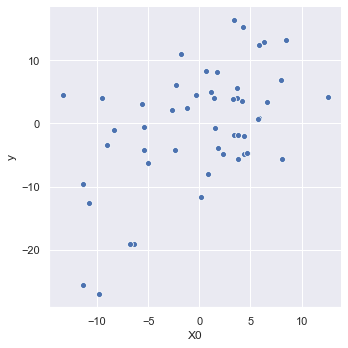

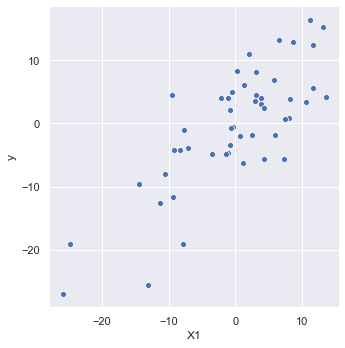

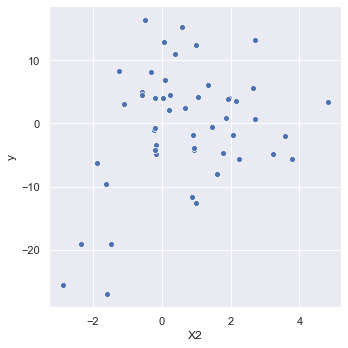

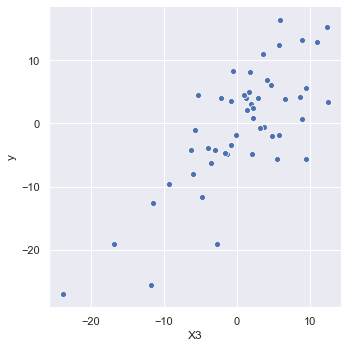

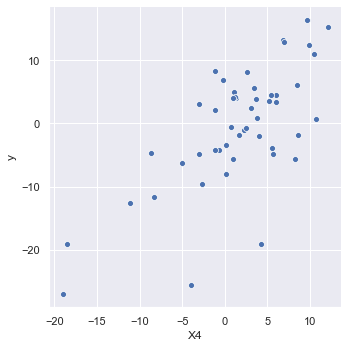

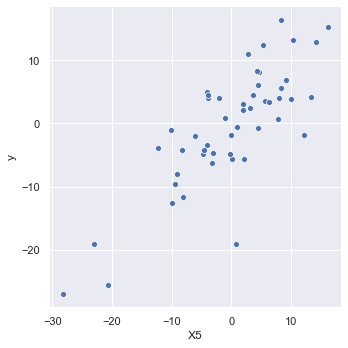

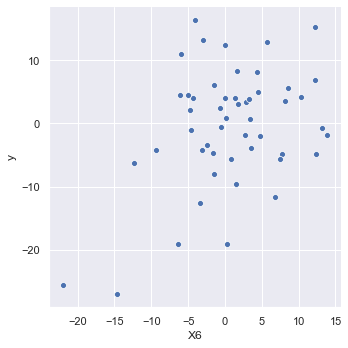

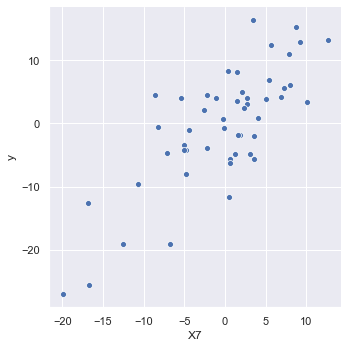

In [8]:
num_ML_models=len(ML_model_list)
z_level_1_learner = pd.DataFrame(y_predictions_nparray, columns=['X%s' % i for i in range(0, num_ML_models)])
y_level_1_learner = y_test_np_array

model_data=z_level_1_learner.copy()
df_y=pd.DataFrame(y_level_1_learner)
df_y.columns=["y"]
model_data["y"]=df_y

display(model_data.head(20))
_ = sns.relplot(x='X0', y='y', data=model_data)
_ = sns.relplot(x='X1', y='y', data=model_data)
_ = sns.relplot(x='X2', y='y', data=model_data)
_ = sns.relplot(x='X3', y='y', data=model_data)
_ = sns.relplot(x='X4', y='y', data=model_data)
_ = sns.relplot(x='X5', y='y', data=model_data)
_ = sns.relplot(x='X6', y='y', data=model_data)
_ = sns.relplot(x='X7', y='y', data=model_data)


In [9]:
x_train=model_data.drop(["y"],axis=1)

y_tensor = theano.shared(model_data.y.values.astype('float64'))
x_tensor = theano.shared(x_train.values.astype('float64'))
print(x_tensor)


<TensorType(float64, matrix)>


In [10]:
with pm.Model() as model:
    
    # define the priors
    beta1 = pm.Dirichlet('beta1', a=np.array([1]*num_ML_models), shape=num_ML_models)
    sd = pm.HalfNormal('sd', 10)

    # define the likelihood
    mu = pm.math.dot(beta1, x_tensor.T)
    yl = pm.Normal('yl', mu, sd, observed=y_tensor)

In [11]:
# Generate a MCMC chain
with model:
    hmc_trace = pm.sample(draws=5000, tune=1000, cores=6)
    #trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (6 chains in 6 jobs)
NUTS: [sd, beta1]
Sampling 6 chains, 0 divergences: 100%|██████████████████████████████████████| 36000/36000 [00:40<00:00, 888.22draws/s]


,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
beta1[0],0.050,0.047,0.000,0.135,0.000,0.000,37532.0,28452.0,27455.0,14860.0,1.0
beta1[1],0.179,0.128,0.000,0.406,0.001,0.001,30666.0,30666.0,24669.0,15628.0,1.0
beta1[2],0.051,0.046,0.000,0.135,0.000,0.000,36103.0,31266.0,24322.0,13561.0,1.0
beta1[3],0.096,0.086,0.000,0.257,0.000,0.000,37900.0,30785.0,28488.0,14764.0,1.0
beta1[4],0.125,0.091,0.000,0.287,0.000,0.000,37698.0,36452.0,29186.0,15964.0,1.0
beta1[5],0.275,0.142,0.001,0.505,0.001,0.001,29304.0,29304.0,26827.0,15698.0,1.0
beta1[6],0.040,0.038,0.000,0.109,0.000,0.000,36454.0,29664.0,32512.0,18951.0,1.0
beta1[7],0.185,0.125,0.000,0.403,0.001,0.001,31490.0,30467.0,28601.0,18853.0,1.0
sd,5.601,0.595,4.542,6.732,0.003,0.002,34695.0,33363.0,35769.0,22693.0,1.0


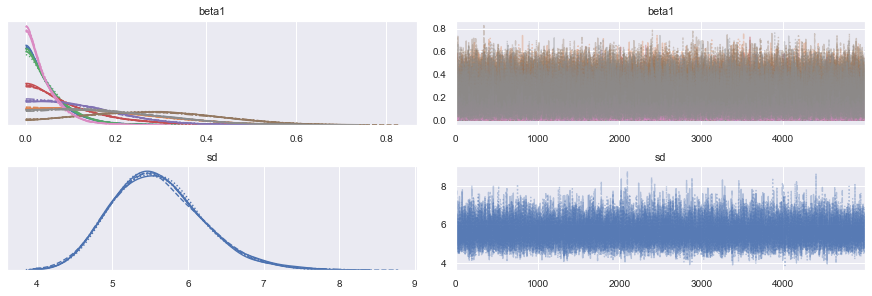

In [12]:
pm.traceplot(hmc_trace)
pm.summary(hmc_trace)

In [13]:
map_tensor_batch = {y_tensor: pm.Minibatch(model_data.y.values.astype('float64'), n_data),
                    x_tensor: pm.Minibatch(x_train.values.astype('float64'), n_data)}
with model:
    advi_fit = pm.fit(method=pm.ADVI(), n=30000,
                      more_replacements=map_tensor_batch)

Average Loss = 161.18: 100%|███████████████████████████████████████████████████| 30000/30000 [00:10<00:00, 2842.92it/s]
Finished [100%]: Average Loss = 161.14


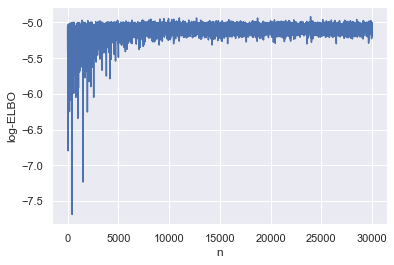

In [14]:
advi_elbo = pd.DataFrame(
    {'log-ELBO': -np.log(advi_fit.hist),
     'n': np.arange(advi_fit.hist.shape[0])})

_ = sns.lineplot(y='log-ELBO', x='n', data=advi_elbo)

arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNIN

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
beta1[0],0.060,0.073,0.001,0.188,0.001,0.001,10196.0,9794.0,9928.0,9971.0,NaN
beta1[1],0.201,0.146,0.006,0.479,0.001,0.001,10135.0,9845.0,10343.0,9575.0,NaN
beta1[2],0.061,0.072,0.000,0.188,0.001,0.001,9945.0,9945.0,9969.0,9715.0,NaN
beta1[3],0.108,0.111,0.001,0.324,0.001,0.001,9872.0,9872.0,9476.0,9596.0,NaN
beta1[4],0.127,0.110,0.002,0.336,0.001,0.001,9935.0,9431.0,9870.0,10046.0,NaN
beta1[5],0.246,0.140,0.025,0.503,0.001,0.001,9871.0,9871.0,9751.0,9245.0,NaN
beta1[6],0.050,0.064,0.000,0.168,0.001,0.000,9773.0,9739.0,9866.0,10087.0,NaN
beta1[7],0.147,0.111,0.000,0.351,0.001,0.001,10128.0,10128.0,10103.0,9838.0,NaN
sd,5.657,0.639,4.484,6.858,0.006,0.005,9919.0,9905.0,9937.0,9877.0,NaN


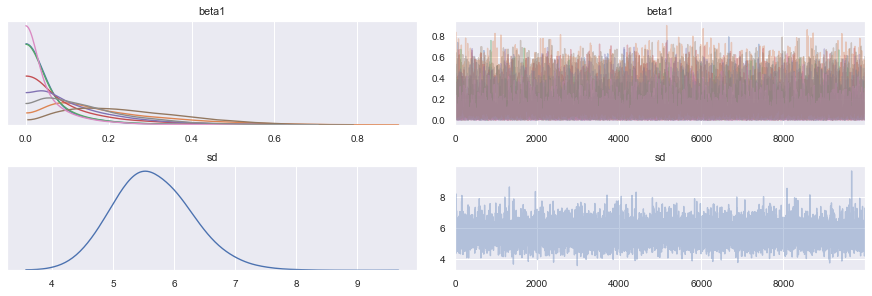

In [15]:
advi_trace = advi_fit.sample(10000)
pm.traceplot(advi_trace)
pm.summary(advi_trace)

In [16]:
y_pred_compare_with_real=[]
for i in range(n_data):
    #print(x_train[i:i+1])
    x_tensor.set_value(x_train[i:i+1].values)
    hmc_posterior_pred = pm.sample_posterior_predictive(hmc_trace, 50, model)
    #print(hmc_posterior_pred['yl'].shape)
    print(np.mean(hmc_posterior_pred['yl']), y_test_np_array[i])
    y_pred_compare_with_real.append(np.mean(hmc_posterior_pred['yl']))

 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.50it/s]

-10.91050986906343 -12.496574090282298


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.79it/s]

-5.587174029398794 -4.262512233546625


 38%|███████████████████████████████▏                                                  | 19/50 [00:00<00:00, 90.47it/s]

1.943728944810154 -5.653237831038162


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.43it/s]

2.7466354147279866 0.9122356540136974


 40%|████████████████████████████████▊                                                 | 20/50 [00:00<00:00, 96.64it/s]

-4.257164545710594 -3.8426944994881835


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.16it/s]

-5.658970018000399 -7.943770370280412


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.59it/s]

3.595009774367741 3.5086702663000997


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 81.29it/s]

-1.1478896491987773 -0.5103394540988091


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.33it/s]

8.32277530274139 13.215729026726809


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.79it/s]

1.9169524100005875 -1.808828505982047


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.40it/s]

8.00965549983327 3.4335608321774513


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.32it/s]

-1.4812577504301683 -4.844462969036711


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.47it/s]

-17.57826168385526 -18.987571106150078


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.79it/s]

7.731925015976194 5.664312756955441


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.79it/s]

-21.72989180734537 -26.885954328131128


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 98.29it/s]

0.854408337250606 -1.98271932161596


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.56it/s]

-3.31170055797378 -4.678271005497946


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.00it/s]

-1.049525713232975 3.9916554864715885


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.04it/s]

6.1842485735943 0.772993218495879


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

5.621385697956807 -5.651104295755193


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.42it/s]

12.087712815842533 15.284491533293767


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.34it/s]

-2.6317345138973662 -19.059119360382265


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.60it/s]

1.0265122376727176 3.0594850062045413


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.04it/s]

2.743860855426033 8.14644983506406


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

3.9861282986890423 3.94995036528552


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 81.66it/s]

-0.5030527818026423 4.931209753656684


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.04it/s]

6.568443857284002 16.28550671711019


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 81.29it/s]

1.1128319630431247 8.268949727982955


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.41it/s]

9.608537323880807 12.885074303104503


  4%|███▎                                                                               | 2/50 [00:00<00:03, 12.38it/s]

1.83974916075734 -4.806738610348177


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.80it/s]

5.812397196918508 6.855357889400353


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.04it/s]

-2.8062607193116453 -3.4371719927389193


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.05it/s]

-4.627279907192043 4.545403156606978


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.16it/s]

-5.5784244359962925 -0.9854917942696689


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.79it/s]

9.255894014673464 4.134250215658783


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.46it/s]

3.883027571510199 10.998129111008609


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.33it/s]

2.629348847485205 2.45832932718701


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.81it/s]

-8.707858106409077 -9.628920382289655


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.91it/s]

2.2590060278577124 -0.7598321057558344


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.33it/s]

-2.64097735385765 3.9903767186125463


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.94it/s]

-2.449808586592626 -6.266646561265405


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.33it/s]

6.9020143141595325 12.433287357569007


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.13it/s]

-13.921318893793819 -25.5286094532947


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.33it/s]

-0.3062483527820958 2.161446747557292


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.42it/s]

-4.969180038253026 -11.589015638667762


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.02it/s]

6.619015537365739 3.9408316670509898


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 79.01it/s]

-4.757678037939354 -4.18063588486107


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.40it/s]

6.471560332913608 -1.7646235529619614


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.36it/s]

1.7214597452188791 4.510950844987461


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 78.76it/s]

4.406360776008951 6.154981256493462


### 3.2 Make Predictions from raw x's ( x >>> z >>> y_hat )

In [17]:
np.random.seed(1)
x_new_np_array=np.random.uniform(low=-4.0, high=4.0, size=n_predictors).reshape(1, -1)

def y_hat_from_raw_x(x_new_np_array,RF,NN,SVM,KRR,KNN,GPR,GBR,pipeline_optimizer,ss1,hmc_trace):
    #print(x_new_np_array)
    ML_model_list=["RF","NN","SVM","KRR","KNN","GPR","GBR","pipeline_optimizer"]
    y_new_list=[]
    for current_model in ML_model_list:
        y_pred=locals()[current_model].predict(ss1.transform(x_new_np_array))
        y_new_list.append(y_pred[0])
    y_new_nparray=np.array([y_new_list])
    print(y_new_nparray)
    df_y_new=pd.DataFrame(y_new_nparray, columns=['X%s' % i for i in range(0, num_ML_models)])


    #print(df_y_new)
    #y_tensor.set_value(validate_data.y.values)
    x_tensor.set_value(df_y_new.values)
    hmc_posterior_pred = pm.sample_posterior_predictive(hmc_trace, 50, model)
    #print(hmc_posterior_pred['yl'].shape)
    print(np.mean(hmc_posterior_pred['yl']))
    return np.mean(hmc_posterior_pred['yl'])


y_samplings=y_hat_from_raw_x(x_new_np_array,RF,NN,SVM,KRR,KNN,GPR,GBR,pipeline_optimizer,ss1,hmc_trace)

#hmc_predictions = np.mean(y_samplings)
#hmc_predictions_std = np.std(y_samplings)

print(y_samplings)
#sns.distplot(hmc_posterior_pred['yl'])

 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.61it/s]

[[ -7.78826482 -17.49175011  -1.81359972 -15.29344692 -10.22017223
  -17.66861484 -21.13930652 -20.00558255]]


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 64.61it/s]

-15.427586038639664
-15.427586038639664


In [18]:
def BOUND(x,lb_x,ub_x):
    for i in range(len(x)):
        x[i,0]=max(min(ub_x[i,0],x[i,0]),lb_x[i,0])
    return x


In [19]:

def ASA(func_x,lb_x,ub_x,x_0,T0,num_steps,qf, RF,NN,SVM,KRR,KNN,GPR,GBR,pipeline_optimizer,ss1,hmc_trace):
    N=len(x_0)
    print(N, x_0)
    lk=5*N
    dx=ub_x-lb_x
    #c=2*num_steps**(1.0/N)
    c=2*exp(-qf+0.0/N)
    print ("c",c)
    x_old=x_0
    Tk=T0
    x_list=[]
    y_list=[]
    for k in range(num_steps+1)[1:]:
        for i in range(lk+1)[1:]:
            f_old=-func_x(x_old.reshape(1, -1), RF,NN,SVM,KRR,KNN,GPR,GBR,pipeline_optimizer,ss1,hmc_trace)
            u=np.random.rand(N).reshape(N,1)
            y1=np.sign(u-1.0/2)
            y2=Tk
            y3=(1+1.0/Tk)**abs(2*u-1)-1
            y=y1*y2*y3
            x=x_old+y*dx
            x=BOUND(x,lb_x,ub_x)
            f_new=-func_x(x.reshape(1, -1), RF,NN,SVM,KRR,KNN,GPR,GBR,pipeline_optimizer,ss1,hmc_trace)
            x_list.append(x.reshape(1, -1))
            y_list.append(-f_new)
            if f_new<f_old:
                x_old=x
            elif exp((f_old-f_new-0.0)/np.linalg.norm(Tk,2))>np.random.rand(1)[0]:
                x_old=x
        #print(x_old)
        #Tk=T0*exp(-c*(num_steps+1-k)**qf)
        Tk=T0*exp(-c*k**(qf+0.0/N))
        
        f_final=func_x(x_old.reshape(1, -1), RF,NN,SVM,KRR,KNN,GPR,GBR,pipeline_optimizer,ss1,hmc_trace)
        
    return x_old,f_final, x_list, y_list

x_0=np.random.uniform(low=-5.0, high=10.0, size=n_predictors).reshape(n_predictors, -1)

lb_x=np.array([-5]*n_predictors).reshape((n_predictors,1))
ub_x=np.array([10]*n_predictors).reshape((n_predictors,1))
T0=np.array([200]*n_predictors).reshape((n_predictors,1))
num_steps=10

x,f,x_list, y_list=ASA(y_hat_from_raw_x,lb_x,ub_x,x_0,T0,num_steps,0.90, RF,NN,SVM,KRR,KNN,GPR,GBR,pipeline_optimizer,ss1,hmc_trace)

 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.32it/s]

10 [[-0.03478349]
 [ 4.89564706]
 [ 1.99815237]
 [ 8.18847355]
 [-0.954946  ]
 [ 0.32229023]
 [-0.19468565]
 [ 3.27606956]
 [-2.17670877]
 [-2.40133593]]
c 0.8131393194811982
[[-2.30183926 -3.38151535 -0.28621425 -2.00183655 -4.47039162  0.12897354
  -4.66122511 -7.10626562]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.27it/s]

-2.800877369801826
[[-0.03877568  6.21836279  0.80524648 10.07949035  5.73938405  4.20007735
   6.14538785  5.43194345]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.04it/s]

4.972080545889031
[[-0.03877568  6.21836279  0.80524648 10.07949035  5.73938405  4.20007735
   6.14538785  5.43194345]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.06it/s]

5.352995055649898
[[-2.68504472 12.29114131  0.90043191 20.2395494  11.5704323   4.13445114
   2.5059157   6.04658734]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.94it/s]

7.890333990438079
[[-2.68504472 12.29114131  0.90043191 20.2395494  11.5704323   4.13445114
   2.5059157   6.04658734]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.79it/s]

7.657669116537128
[[ 4.3641664  12.96716139  2.61961907 13.64028825  9.37191802 10.04769832
  -0.27471206  8.73097798]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 81.64it/s]

9.566861409001632
[[ 4.3641664  12.96716139  2.61961907 13.64028825  9.37191802 10.04769832
  -0.27471206  8.73097798]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.61it/s]

9.371685208820217
[[-0.53393071 -0.11526036  1.3397436  -4.02087375 -1.59638748  0.84278514
   2.62732767  0.42294456]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 78.65it/s]

-0.2249043839832215
[[-0.53393071 -0.11526036  1.3397436  -4.02087375 -1.59638748  0.84278514
   2.62732767  0.42294456]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.44it/s]

-0.16013345449760358
[[ -1.59716782  -7.08150407   3.38790211 -11.72615527  -0.70545107
  -19.02247985   3.36086849   1.57323105]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-7.065276953135789
[[ -1.59716782  -7.08150407   3.38790211 -11.72615527  -0.70545107
  -19.02247985   3.36086849   1.57323105]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.61it/s]

-7.132284557144495
[[ 2.77269297 -3.91879253  0.73621542 -0.55431099  8.20769978 -0.41095715
   3.28966667  1.79315034]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.49it/s]

0.9149218401257465
[[ 2.77269297 -3.91879253  0.73621542 -0.55431099  8.20769978 -0.41095715
   3.28966667  1.79315034]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.77it/s]

1.129078609543195
[[  1.85501064  -2.79269061   1.6078719   -0.78714616   2.38168497
  -11.1098803    1.63470349   1.94001588]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.52it/s]

-2.5045458243168395
[[  1.85501064  -2.79269061   1.6078719   -0.78714616   2.38168497
  -11.1098803    1.63470349   1.94001588]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-2.820215816000584
[[ 2.67177799  1.18306681  0.20744125  5.54767151 10.1385811   5.57100336
   0.15320938 -2.02700411]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.81it/s]

3.293076675666184
[[ 2.67177799  1.18306681  0.20744125  5.54767151 10.1385811   5.57100336
   0.15320938 -2.02700411]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.02it/s]

3.2155242310628482
[[ 5.14086513  0.34962825  0.70261961  5.39045446  1.70909295  6.17617336
   1.70580394 -0.69681244]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.77it/s]

2.6105617130921965
[[ 5.14086513  0.34962825  0.70261961  5.39045446  1.70909295  6.17617336
   1.70580394 -0.69681244]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.49it/s]

2.6380281693154264
[[ 4.64092477  1.16890038 -0.41398836  1.97292855  3.04776289 -1.23249563
   9.05200959 -4.39652725]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

0.14255715772925215
[[ 4.64092477  1.16890038 -0.41398836  1.97292855  3.04776289 -1.23249563
   9.05200959 -4.39652725]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.96it/s]

0.21659364435185097
[[ -6.78089545  -4.50647054   0.611869    -1.66712602   4.24767676
   -7.13665501 -22.94094337  -1.05098112]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.99it/s]

-3.473521473645391
[[ -6.78089545  -4.50647054   0.611869    -1.66712602   4.24767676
   -7.13665501 -22.94094337  -1.05098112]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.49it/s]

-3.5097955641462817
[[-10.1210254   -9.61205285  -0.84101372  -7.97448581  -4.22705491
  -10.90928719  -9.59846346 -14.01628429]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.79it/s]

-9.434801314156928
[[-10.1210254   -9.61205285  -0.84101372  -7.97448581  -4.22705491
  -10.90928719  -9.59846346 -14.01628429]]


  6%|████▉                                                                              | 3/50 [00:00<00:02, 16.90it/s]

-9.551501483855134
[[-12.47770249 -15.11992059  -1.70828715 -13.89114032   2.65919819
  -28.58035031 -22.31852198 -17.31705846]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 80.55it/s]

-15.988706713140761
[[-12.47770249 -15.11992059  -1.70828715 -13.89114032   2.65919819
  -28.58035031 -22.31852198 -17.31705846]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.34it/s]

-16.06054854084827
[[ 7.2079907   4.29784583  0.88768181  4.17148039  8.20769978 -4.30990904
   2.02979717 -1.92736281]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.48it/s]

1.2353295598262464
[[ 7.2079907   4.29784583  0.88768181  4.17148039  8.20769978 -4.30990904
   2.02979717 -1.92736281]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.04it/s]

1.0371419158285773
[[ 6.45049273  0.37110077 -1.22476172  2.14718782  0.42878707  6.59459156
   1.85206352 -6.35257059]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.04it/s]

1.278133213768051
[[ 6.45049273  0.37110077 -1.22476172  2.14718782  0.42878707  6.59459156
   1.85206352 -6.35257059]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.71it/s]

1.1539744579830082
[[-12.88425717 -15.83299659  -4.38661102 -17.50644309  -2.65853903
  -16.7596949  -10.2862479  -16.6121553 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.04it/s]

-13.528838210066471
[[-12.88425717 -15.83299659  -4.38661102 -17.50644309  -2.65853903
  -16.7596949  -10.2862479  -16.6121553 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.25it/s]

-13.262256239984895
[[ -7.12342961 -27.94931897  -2.62776771 -23.46228928 -11.68864203
  -33.10249238   2.26827702 -22.09770487]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.38it/s]

-21.922851963643694
[[ -7.12342961 -27.94931897  -2.62776771 -23.46228928 -11.68864203
  -33.10249238   2.26827702 -22.09770487]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.79it/s]

-22.11747471365935
[[ -2.27079744 -21.96344606   2.44723728 -16.47382838  -7.77522455
  -42.74405275  -1.31441432  -7.28185545]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.78it/s]

-19.089589981562064
[[ -2.27079744 -21.96344606   2.44723728 -16.47382838  -7.77522455
  -42.74405275  -1.31441432  -7.28185545]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.48it/s]

-19.190153715089824
[[-19.16347415 -26.06723705   0.21547935 -14.94678628  -7.53437132
  -17.15123202 -21.02405346  -8.58856314]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.32it/s]

-14.725359769716283
[[-19.16347415 -26.06723705   0.21547935 -14.94678628  -7.53437132
  -17.15123202 -21.02405346  -8.58856314]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.41it/s]

-14.529132988314307
[[-13.76542738 -25.96837872  -4.00905352 -18.70658487 -15.84634647
  -16.09320503 -26.70945391 -12.28701585]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.58it/s]

-16.99775682777787
[[-13.76542738 -25.96837872  -4.00905352 -18.70658487 -15.84634647
  -16.09320503 -26.70945391 -12.28701585]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.46it/s]

-16.889848443568606
[[ 2.70372382 -1.75791882  1.11608475 -1.69454874  8.67498962  2.08719646
   9.33731857  0.68895827]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.40it/s]

1.8911427896536506
[[ 2.70372382 -1.75791882  1.11608475 -1.69454874  8.67498962  2.08719646
   9.33731857  0.68895827]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 98.27it/s]

1.8946722457548781
[[-3.31592935 -5.50739607 -1.70650505 -6.64088048 -7.23669168  0.21433775
  12.00462771 -2.31091887]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.58it/s]

-2.649801704529868
[[-3.31592935 -5.50739607 -1.70650505 -6.64088048 -7.23669168  0.21433775
  12.00462771 -2.31091887]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.94it/s]

-2.650481398247978
[[-0.15199463 -5.10253199  2.37577775  0.08395285  7.83702918 -2.37884457
  10.38728174  5.87816742]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.47it/s]

1.2396543306993728
[[-0.15199463 -5.10253199  2.37577775  0.08395285  7.83702918 -2.37884457
  10.38728174  5.87816742]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.78it/s]

1.3012189034442632
[[  4.4959581   -9.61404331   2.59244909  -1.17118475   4.18563303
  -10.17323726   9.76083545   3.16993003]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 81.30it/s]

-2.6245285347816507
[[  4.4959581   -9.61404331   2.59244909  -1.17118475   4.18563303
  -10.17323726   9.76083545   3.16993003]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.68it/s]

-2.6137374395829176
[[ 1.70719128 -6.13370684  1.64272957 -0.78022875  9.37191802  4.08174353
  12.0092158  -0.19926761]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.79it/s]

1.8812626083491497
[[ 1.70719128 -6.13370684  1.64272957 -0.78022875  9.37191802  4.08174353
  12.0092158  -0.19926761]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 89.54it/s]

1.7642087561134439
[[-8.11349201e-01 -5.13166823e+00  3.18163179e-03 -1.50697496e+00
   5.36363953e+00 -2.29715212e+00  1.09011898e+00 -1.07547431e+01]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.43it/s]

-2.959144527753765
[[-8.11349201e-01 -5.13166823e+00  3.18163179e-03 -1.50697496e+00
   5.36363953e+00 -2.29715212e+00  1.09011898e+00 -1.07547431e+01]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.77it/s]

-2.667275718788766
[[-5.66920994  0.04587129  1.89357947 -4.44549838  3.22499241 -4.899402
  -4.92451877 -3.24102065]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.80it/s]

-1.997573806768014
[[-5.66920994  0.04587129  1.89357947 -4.44549838  3.22499241 -4.899402
  -4.92451877 -3.24102065]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.19it/s]

-2.3158576261035115
[[ -5.2710539   -9.45594678  -3.04672044  -6.95627156  -0.13542837
    1.68230392   2.20692926 -14.92283831]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.38it/s]

-5.035899795912667
[[ -5.2710539   -9.45594678  -3.04672044  -6.95627156  -0.13542837
    1.68230392   2.20692926 -14.92283831]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 81.30it/s]

-4.816439157611675
[[ 1.72277882 -6.9795032  -1.31792665 -5.89980392 -5.16468765  0.39290925
   0.24967449 -9.99519551]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.87it/s]

-4.2260304934306
[[ 1.72277882 -6.9795032  -1.31792665 -5.89980392 -5.16468765  0.39290925
   0.24967449 -9.99519551]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 80.93it/s]

-4.270504654156954
[[ 4.36254892 13.62737237  4.13414228 12.55622222  9.37191802 12.39788707
   7.73813953 17.66569708]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.59it/s]

12.198218125027301
[[ 4.36254892 13.62737237  4.13414228 12.55622222  9.37191802 12.39788707
   7.73813953 17.66569708]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.16it/s]

11.998166067922593
[[ 5.9760754   1.0220367   0.14642247  5.20387932  9.37191802 11.24395271
   2.23246155 -4.67752174]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.33it/s]

4.510610695953671
[[ 5.9760754   1.0220367   0.14642247  5.20387932  9.37191802 11.24395271
   2.23246155 -4.67752174]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.39it/s]

4.4520170103173
[[ 8.25545668  0.40096404  0.83539152  6.71960698  0.07620177  2.01841445
  13.77177227  1.18336568]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.13it/s]

2.3340809800573936
[[ 8.25545668  0.40096404  0.83539152  6.71960698  0.07620177  2.01841445
  13.77177227  1.18336568]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.47it/s]

2.274972657190608
[[ 3.6442543   4.73771405 -0.821413    7.27325045  5.31613444 11.81245738
   2.20707969 -4.33164812]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.56it/s]

4.603041744736809
[[ 3.6442543   4.73771405 -0.821413    7.27325045  5.31613444 11.81245738
   2.20707969 -4.33164812]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.79it/s]

4.976763482247715
[[ -0.13052196  -6.84270143  -0.28349202  -0.36985584   3.69330886
  -12.51726266  -1.52399717  -7.46870045]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.33it/s]

-5.741628899102399
[[ -0.13052196  -6.84270143  -0.28349202  -0.36985584   3.69330886
  -12.51726266  -1.52399717  -7.46870045]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.94it/s]

-5.642989251854007
[[-1.48944822 -0.19354366 -0.82395667  0.4174619  -0.06413101 -1.37852638
  -4.7274252   0.85501421]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.04it/s]

-0.43416264776020935
[[-1.48944822 -0.19354366 -0.82395667  0.4174619  -0.06413101 -1.37852638
  -4.7274252   0.85501421]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.79it/s]

-0.3087136976775397
[[ -0.65065011  -2.49379066   1.50920471   1.97377621  -0.44829643
  -10.84126395   0.15664533   5.23367918]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.13it/s]

-2.032383755972945
[[ -0.65065011  -2.49379066   1.50920471   1.97377621  -0.44829643
  -10.84126395   0.15664533   5.23367918]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.94it/s]

-2.199150363126396
[[-2.11650861  4.47363126  3.36925276  8.66030652 10.97490974 -7.57807138
   9.05841172 12.29232769]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.94it/s]

3.6520180483329385
[[-2.11650861  4.47363126  3.36925276  8.66030652 10.97490974 -7.57807138
   9.05841172 12.29232769]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.05it/s]

3.7571082562417915
[[ 1.23827163 15.48923452  2.84979657 15.54462003  5.73938405 -3.73902694
   0.94155025 12.55005722]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.68it/s]

6.39148661777623
[[ 1.23827163 15.48923452  2.84979657 15.54462003  5.73938405 -3.73902694
   0.94155025 12.55005722]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.47it/s]

6.504278196224999
[[ 0.46881138 16.70214731  4.88017647 12.29280108  9.37191802 12.10073635
   9.84851634 16.79006167]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.04it/s]

12.403952852854374
[[ 0.46881138 16.70214731  4.88017647 12.29280108  9.37191802 12.10073635
   9.84851634 16.79006167]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 89.53it/s]

12.292974852133213
[[ 7.20528215  6.22851657  1.33550182  8.47457675  8.33122093  9.62122416
  11.64617783  8.09385426]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.79it/s]

7.753708912782546
[[ 7.20528215  6.22851657  1.33550182  8.47457675  8.33122093  9.62122416
  11.64617783  8.09385426]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.77it/s]

7.930296074776433
[[-3.66455084  4.99871433  1.16337449  9.92006144  5.24389483 10.71540364
  -0.38096747 10.15243147]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.94it/s]

7.093694251537285
[[-3.66455084  4.99871433  1.16337449  9.92006144  5.24389483 10.71540364
  -0.38096747 10.15243147]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.77it/s]

7.02919062398649
[[ -2.96578124 -25.20229854  -2.0369652  -21.1752185  -13.82289322
  -37.77596691   1.80505173 -18.14205737]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.04it/s]

-21.667179408086724
[[ -2.96578124 -25.20229854  -2.0369652  -21.1752185  -13.82289322
  -37.77596691   1.80505173 -18.14205737]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.87it/s]

-21.727772004512836
[[ -2.19651928  -6.01897188  -0.5053622   -5.81760609  -4.74250481
   -9.78607164  -0.90545519 -11.20756601]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.40it/s]

-7.0866891655719195
[[ -2.19651928  -6.01897188  -0.5053622   -5.81760609  -4.74250481
   -9.78607164  -0.90545519 -11.20756601]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.57it/s]

-7.301541908469141
[[ -4.72124787 -11.56449158   2.66977972  -2.12726406  -0.66789635
  -18.55136752  -0.95441914   3.79927167]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.91it/s]

-6.765007292147831
[[ -4.72124787 -11.56449158   2.66977972  -2.12726406  -0.66789635
  -18.55136752  -0.95441914   3.79927167]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 81.67it/s]

-6.858796374353158
[[ 0.58571298  4.55892342  1.51822199  5.46670289  3.28407764  5.80286549
  -1.71984872  7.35073695]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.99it/s]

4.697959806001878
[[ 0.58571298  4.55892342  1.51822199  5.46670289  3.28407764  5.80286549
  -1.71984872  7.35073695]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.13it/s]

4.8191064407087145
[[  1.82733283  -0.18303519   2.6860381    5.51920901  13.05040166
  -10.97305615  -1.49475748  10.82698691]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.34it/s]

1.0942518878403906
[[  1.82733283  -0.18303519   2.6860381    5.51920901  13.05040166
  -10.97305615  -1.49475748  10.82698691]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.38it/s]

1.335765861958886
[[ -0.51333504 -14.73326551  -1.74475999 -11.60728352  -1.96611366
  -18.50013482  -4.75712974  -6.80304855]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.79it/s]

-10.505338059708116
[[ -0.51333504 -14.73326551  -1.74475999 -11.60728352  -1.96611366
  -18.50013482  -4.75712974  -6.80304855]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.79it/s]

-10.651597764066766
[[  3.15557405  -0.60927876   1.27129869  -2.48350119   4.58649151
  -12.8229232   -1.27157167  -1.23261102]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 81.30it/s]

-3.237931443233944
[[  3.15557405  -0.60927876   1.27129869  -2.48350119   4.58649151
  -12.8229232   -1.27157167  -1.23261102]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.27it/s]

-3.065291554177995
[[  1.61715357  -4.08022433   1.35455147  -0.62934833   0.07620177
  -10.02956961   1.69311291   2.21942518]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.48it/s]

-2.87962099900225
[[  1.61715357  -4.08022433   1.35455147  -0.62934833   0.07620177
  -10.02956961   1.69311291   2.21942518]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 81.27it/s]

-2.8429994696425163
[[  2.73777781 -17.95790378   1.1350223  -10.85456124   0.07620177
  -33.43463158   1.983664    -5.3028921 ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 78.64it/s]

-13.875153467015675
[[  2.73777781 -17.95790378   1.1350223  -10.85456124   0.07620177
  -33.43463158   1.983664    -5.3028921 ]]


  2%|█▋                                                                                 | 1/50 [00:00<00:07,  6.39it/s]

-13.79595254031258
[[  2.73777781 -17.95790378   1.1350223  -10.85456124   0.07620177
  -33.43463158   1.983664    -5.3028921 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.70it/s]

-13.792382536849772
[[ 2.52415391 -4.17199392  0.43400206 -3.52324384  0.07620177 -9.76964284
   2.49220906  1.83660044]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 75.67it/s]

-3.303941175319325
[[ 2.52415391 -4.17199392  0.43400206 -3.52324384  0.07620177 -9.76964284
   2.49220906  1.83660044]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 75.31it/s]

-3.10515581495144
[[-14.11231906 -11.07375313  -0.90143466  -9.0633566    3.80244408
  -18.42332677 -20.30440631 -11.54224253]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.42it/s]

-10.84915174197896
[[-14.11231906 -11.07375313  -0.90143466  -9.0633566    3.80244408
  -18.42332677 -20.30440631 -11.54224253]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 81.29it/s]

-10.977284085122688
[[  4.99869259  -7.96743847  -0.83520912  -7.02479006  -3.97558547
  -10.4774764   -1.70172645  -8.74341369]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.27it/s]

-6.877285300491951
[[  4.99869259  -7.96743847  -0.83520912  -7.02479006  -3.97558547
  -10.4774764   -1.70172645  -8.74341369]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.29it/s]

-6.890469679912744
[[-11.43566596  -8.31313807  -2.01583835  -8.43594262   1.77995568
  -12.76636803 -20.92957558 -11.62871528]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.61it/s]

-9.00773405528633
[[-11.43566596  -8.31313807  -2.01583835  -8.43594262   1.77995568
  -12.76636803 -20.92957558 -11.62871528]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.90it/s]

-9.186981821430106
[[ -4.97023847  10.05081466   1.84447563   8.63448314   7.47403974
    7.24104521 -11.87687558   8.95085184]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.04it/s]

6.515343723952702
[[ -4.97023847  10.05081466   1.84447563   8.63448314   7.47403974
    7.24104521 -11.87687558   8.95085184]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.01it/s]

6.566339313093861
[[-14.72165962  -8.70362896  -1.22352462  -7.46673821  -6.74103294
  -11.94956962  -0.96194536  -2.35907007]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 79.16it/s]

-7.6530414294131655
[[-14.72165962  -8.70362896  -1.22352462  -7.46673821  -6.74103294
  -11.94956962  -0.96194536  -2.35907007]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.27it/s]

-7.455308632311198
[[  0.67270373  -6.56460398  -1.64114511  -2.10049421   0.14577786
  -10.39956317   4.10693291  -0.44105468]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 75.31it/s]

-4.2658632533272085
[[  0.67270373  -6.56460398  -1.64114511  -2.10049421   0.14577786
  -10.39956317   4.10693291  -0.44105468]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.68it/s]

-4.140075228710907
[[  2.42413654  -4.88165101   4.5737099   -0.38671536   5.49480405
  -11.69159945   4.10693291   8.15887181]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.78it/s]

-1.1449671435355746
[[  2.42413654  -4.88165101   4.5737099   -0.38671536   5.49480405
  -11.69159945   4.10693291   8.15887181]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.97it/s]

-1.0865999361499128
[[ 9.82717411 12.51266707  2.69518606 11.09931457  9.37191802 15.58178271
   1.07388336  9.50776006]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.81it/s]

11.136030748957614
[[ 9.82717411 12.51266707  2.69518606 11.09931457  9.37191802 15.58178271
   1.07388336  9.50776006]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 87.95it/s]

10.852572291233832
[[ 6.90451279 -7.26848373 -0.13581571 -2.48770074 -4.5534876  -0.25720406
  -4.69343068  2.562913  ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.39it/s]

-1.3627711603828396
[[ 6.90451279 -7.26848373 -0.13581571 -2.48770074 -4.5534876  -0.25720406
  -4.69343068  2.562913  ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.16it/s]

-1.5930296027456057
[[ 1.41933715 -1.0059409  -0.2431481   0.86273548  5.80361786 11.56623755
   9.76118133 -3.24086156]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.14it/s]

3.5825916373245885
[[ 1.41933715 -1.0059409  -0.2431481   0.86273548  5.80361786 11.56623755
   9.76118133 -3.24086156]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.23it/s]

3.8336507206762325
[[ 2.72816363  8.31435921  0.62744525 14.9687329  11.5704323  29.91405701
  -0.78368895 -0.32473613]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 78.25it/s]

12.359698328487438
[[ 2.72816363  8.31435921  0.62744525 14.9687329  11.5704323  29.91405701
  -0.78368895 -0.32473613]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 78.64it/s]

12.44154097899129
[[-2.2696763   2.34326211 -1.84323291  7.06190015 11.5704323  -3.3674162
   3.19580599 -3.2000825 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 81.12it/s]

1.1319973686937406
[[-2.2696763   2.34326211 -1.84323291  7.06190015 11.5704323  -3.3674162
   3.19580599 -3.2000825 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.12it/s]

0.9218620417945829
[[ -0.07160164   0.48068817   1.13244356   0.56434722   0.42878707
  -10.43999431   3.06976689   1.13977375]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.02it/s]

-1.946552607508266
[[ -0.07160164   0.48068817   1.13244356   0.56434722   0.42878707
  -10.43999431   3.06976689   1.13977375]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.09it/s]

-2.0868439454906897
[[-2.21668589 -1.64857913  0.7104686   7.74893641  7.76283731 -6.95904266
   9.04820157  3.83245976]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 80.57it/s]

0.6299016257558798
[[-2.21668589 -1.64857913  0.7104686   7.74893641  7.76283731 -6.95904266
   9.04820157  3.83245976]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.35it/s]

0.7923350286361418
[[ 4.76473417  8.14846365  1.40331574 13.11680975  6.06905266 14.97591803
   7.13977545  3.98304659]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.42it/s]

8.75254914945437
[[ 4.76473417  8.14846365  1.40331574 13.11680975  6.06905266 14.97591803
   7.13977545  3.98304659]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.49it/s]

8.846670250673059
[[ 1.64528542  3.37698896  0.85198491  2.14884624  4.80713156 -4.38905293
   2.23923899 -2.14908181]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.02it/s]

-0.06991788176322403
[[ 1.64528542  3.37698896  0.85198491  2.14884624  4.80713156 -4.38905293
   2.23923899 -2.14908181]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 70.99it/s]

-0.02589449187871976
[[ 2.57239942 -0.39983042  0.91255837 -4.77795693  0.98361552 -6.11423969
  -0.10822213 -2.78707774]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 75.98it/s]

-2.347070386629346
[[ 2.57239942 -0.39983042  0.91255837 -4.77795693  0.98361552 -6.11423969
  -0.10822213 -2.78707774]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 80.57it/s]

-2.466332775683726
[[ 7.52305458  7.98881873  0.61895403  7.35294064  5.30311026  8.47369376
  13.00830509  5.00062159]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.92it/s]

6.931947732797857
[[ 7.52305458  7.98881873  0.61895403  7.35294064  5.30311026  8.47369376
  13.00830509  5.00062159]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.42it/s]

6.684717433829053
[[ 1.6306304   0.16205279  0.13419608  0.91528166 -4.5534876  11.66969845
   9.75779806  2.49052417]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 79.86it/s]

3.39901730513472
[[ 1.6306304   0.16205279  0.13419608  0.91528166 -4.5534876  11.66969845
   9.75779806  2.49052417]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 75.67it/s]

3.396314135814103
[[-9.33483424  0.77648946  1.16992454  0.63342681  0.33434876 -1.283312
  -1.83702518  2.41560801]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.97it/s]

-0.18372431660101282
[[-9.33483424  0.77648946  1.16992454  0.63342681  0.33434876 -1.283312
  -1.83702518  2.41560801]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.75it/s]

-0.14674137173113422
[[ 2.73487434  1.02340976  1.24185887  6.39067074 -0.44829643 -2.19813539
   0.15664533  5.88198122]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.78it/s]

1.2364431562049962
[[ 2.73487434  1.02340976  1.24185887  6.39067074 -0.44829643 -2.19813539
   0.15664533  5.88198122]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.32it/s]

1.5088389425159432
[[-2.1714482  -3.48037616 -0.6570423  -0.02842791  7.23833911 -8.58673077
  -4.60940354 -4.95329014]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.31it/s]

-3.391970671232682
[[-2.1714482  -3.48037616 -0.6570423  -0.02842791  7.23833911 -8.58673077
  -4.60940354 -4.95329014]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.46it/s]

-3.110293518774667
[[ -8.77001186  -8.27834738  -2.38611596  -7.79655232   1.52717937
  -21.20742645 -21.14215336 -11.80108182]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.49it/s]

-11.309886674474823
[[ -8.77001186  -8.27834738  -2.38611596  -7.79655232   1.52717937
  -21.20742645 -21.14215336 -11.80108182]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.15it/s]

-11.144523838916566
[[ -6.66079165  -8.89708329  -3.3233741  -10.92576956  -4.87629944
  -27.11475611 -22.04014324  -7.95626099]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.59it/s]

-13.265917297282108
[[ -6.66079165  -8.89708329  -3.3233741  -10.92576956  -4.87629944
  -27.11475611 -22.04014324  -7.95626099]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.46it/s]

-13.499253496094747
[[ -7.74537941 -10.42251566  -0.65981136  -7.23632323  -1.97605744
  -14.19404841 -20.90384767  -6.01641413]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.11it/s]

-8.950906984316033
[[ -7.74537941 -10.42251566  -0.65981136  -7.23632323  -1.97605744
  -14.19404841 -20.90384767  -6.01641413]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.59it/s]

-8.652688797074868
[[-13.59317533 -10.01085643  -4.75037475 -11.20313404  -4.05260337
  -13.32366338  -1.86427374  -3.74096611]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.60it/s]

-8.669478359843948
[[-13.59317533 -10.01085643  -4.75037475 -11.20313404  -4.05260337
  -13.32366338  -1.86427374  -3.74096611]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.59it/s]

-8.253932637534529
[[ -9.19489614   0.18338459   1.71141697   5.26157675  -2.62300025
    9.21903042 -20.93143884   5.62870161]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.31it/s]

2.4944779527347505
[[ -9.19489614   0.18338459   1.71141697   5.26157675  -2.62300025
    9.21903042 -20.93143884   5.62870161]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.97it/s]

2.5801589999413026
[[-15.5921564   -5.16124562   2.27657464   0.91241424  -7.49859719
   -0.22243595 -21.82065459   5.14714618]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.75it/s]

-2.493255170166256
[[ -9.19489614   0.18338459   1.71141697   5.26157675  -2.62300025
    9.21903042 -20.93143884   5.62870161]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.92it/s]

2.5039579427420735
[[ -2.44478685 -11.05677279  -1.07232224  -7.39770511  -4.54520491
  -12.8124099   -4.17053066  -2.04530709]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.44it/s]

-7.378751061677336
[[ -2.44478685 -11.05677279  -1.07232224  -7.39770511  -4.54520491
  -12.8124099   -4.17053066  -2.04530709]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.42it/s]

-7.495925974164128
[[ 5.78931733 -1.78853789  1.87076956  0.75810719  6.99436112  0.62356103
   9.91577869 -4.07123397]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.39it/s]

0.8361175820539888
[[ 5.78931733 -1.78853789  1.87076956  0.75810719  6.99436112  0.62356103
   9.91577869 -4.07123397]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.54it/s]

0.797968429605766
[[-17.09290881 -14.51969308  -5.73739125 -16.6655222  -11.62504167
  -23.46809382 -10.8296658  -14.26886221]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.68it/s]

-16.195876845438654
[[-17.09290881 -14.51969308  -5.73739125 -16.6655222  -11.62504167
  -23.46809382 -10.8296658  -14.26886221]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.35it/s]

-16.09646663308297
[[ -7.78647426  -9.62356955  -1.19484866  -6.22174933   0.33434876
  -16.31675045  -0.32494913  -7.50473454]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.33it/s]

-8.384415327459825
[[ -7.78647426  -9.62356955  -1.19484866  -6.22174933   0.33434876
  -16.31675045  -0.32494913  -7.50473454]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 78.66it/s]

-8.446314454513978
[[ -8.6992275  -13.31084472  -4.68693528 -12.0926421   -4.05260337
  -18.32635504  -1.76413994 -16.6570329 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.21it/s]

-12.715995053836279
[[ -8.6992275  -13.31084472  -4.68693528 -12.0926421   -4.05260337
  -18.32635504  -1.76413994 -16.6570329 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.53it/s]

-12.615401201383897
[[ 1.36027565 -0.07530666 -0.39827544 -2.83171068 -0.44829643 -6.55766047
  -1.46242178 -6.4069447 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.33it/s]

-3.2922642546606804
[[ 1.36027565 -0.07530666 -0.39827544 -2.83171068 -0.44829643 -6.55766047
  -1.46242178 -6.4069447 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.14it/s]

-3.404143961097989
[[  1.61140852 -11.85806455   0.32254822  -8.59555473   3.69330886
  -25.37605457  -1.47602171  -9.85017317]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.44it/s]

-11.03446091268635
[[  1.61140852 -11.85806455   0.32254822  -8.59555473   3.69330886
  -25.37605457  -1.47602171  -9.85017317]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.44it/s]

-10.972819448901738
[[  0.7482779  -16.16835368  -3.62291709 -16.58342893 -10.22017223
  -29.56077456  -4.1829843  -19.21890217]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.44it/s]

-17.607044185325574
[[  0.7482779  -16.16835368  -3.62291709 -16.58342893 -10.22017223
  -29.56077456  -4.1829843  -19.21890217]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.82it/s]

-17.649100352464767
[[-10.67315378  -9.58645487  -4.40381179 -19.04644384 -10.22017223
  -31.94908097 -11.45449632 -14.81883186]]


 36%|█████████████████████████████▌                                                    | 18/50 [00:00<00:00, 88.44it/s]

-17.44908753556465
[[-10.67315378  -9.58645487  -4.40381179 -19.04644384 -10.22017223
  -31.94908097 -11.45449632 -14.81883186]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.61it/s]

-17.191576949316467
[[ 3.15847699  0.85322984 -0.40969378  1.50542353 -3.24354976 -2.81493848
  -0.12583441 -0.79372648]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.47it/s]

-0.9357183659246086
[[ 3.15847699  0.85322984 -0.40969378  1.50542353 -3.24354976 -2.81493848
  -0.12583441 -0.79372648]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.77it/s]

-1.1105708004872843
[[ 4.89969136  3.42421065 -0.06952453  7.18869348 -1.88301768 11.16609545
  -4.69126822  3.96433231]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.87it/s]

4.722656122219625
[[ 4.89969136  3.42421065 -0.06952453  7.18869348 -1.88301768 11.16609545
  -4.69126822  3.96433231]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.32it/s]

4.726579377421534
[[ -7.35461814  -5.46301363   0.31048121   0.3542551    0.33434876
  -10.3409622   -2.52913016  -0.26440426]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.83it/s]

-4.228920306410968
[[ -7.35461814  -5.46301363   0.31048121   0.3542551    0.33434876
  -10.3409622   -2.52913016  -0.26440426]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.87it/s]

-4.07539981744459
[[ -9.79583972  -4.01687432  -0.1776664   -3.26775945   1.03699661
  -11.98500781   0.3535306   -1.54237432]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.44it/s]

-4.888053741664649
[[ -9.79583972  -4.01687432  -0.1776664   -3.26775945   1.03699661
  -11.98500781   0.3535306   -1.54237432]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.95it/s]

-4.6714831478776215
[[  0.6437403    3.14203944   1.54785179   0.77718843   7.47403974
  -10.0560815   -5.24939218   8.43077719]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.36it/s]

0.38282668926915997
[[  0.6437403    3.14203944   1.54785179   0.77718843   7.47403974
  -10.0560815   -5.24939218   8.43077719]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.79it/s]

0.20777174942333285
[[ -0.28310516  -9.71642413  -1.95479205  -3.89179827   1.02430964
   -8.45482825   4.45035019 -11.67147735]]


 36%|█████████████████████████████▌                                                    | 18/50 [00:00<00:00, 87.63it/s]

-6.071804900652262
[[ -0.28310516  -9.71642413  -1.95479205  -3.89179827   1.02430964
   -8.45482825   4.45035019 -11.67147735]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.39it/s]

-6.251923411503693
[[ -2.16192108 -11.20352788   0.1807034    2.21315622   5.42350669
   -2.08639441   1.60548378 -11.64374309]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.62it/s]

-3.909576835221603
[[ -2.16192108 -11.20352788   0.1807034    2.21315622   5.42350669
   -2.08639441   1.60548378 -11.64374309]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.58it/s]

-3.6411694754542827
[[ -4.52540557  -7.79410995  -0.27472563  -6.47327207   3.78047856
   -8.58543277 -24.08332598  -2.73807981]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.32it/s]

-5.257427470362245
[[ -4.52540557  -7.79410995  -0.27472563  -6.47327207   3.78047856
   -8.58543277 -24.08332598  -2.73807981]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.80it/s]

-5.3656902942406
[[ 1.00006222 -2.62742358  1.33461307  3.66378113  5.42350669  5.32513143
   3.4481566  -2.81676616]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.64it/s]

1.5884335512912169
[[ 1.00006222 -2.62742358  1.33461307  3.66378113  5.42350669  5.32513143
   3.4481566  -2.81676616]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.60it/s]

1.71591032546075
[[ -2.84122709 -15.63304398  -2.69394623 -14.84091792  -7.53437132
  -18.351455     2.07213767 -13.93828247]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.68it/s]

-12.832639717509814
[[ -2.84122709 -15.63304398  -2.69394623 -14.84091792  -7.53437132
  -18.351455     2.07213767 -13.93828247]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.60it/s]

-12.655755261549071
[[ -4.59228581 -22.742695    -5.74687021 -23.15046304  -7.49859719
  -36.15562837   1.82180496 -18.05963047]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.37it/s]

-20.541983881840906
[[ -4.59228581 -22.742695    -5.74687021 -23.15046304  -7.49859719
  -36.15562837   1.82180496 -18.05963047]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.68it/s]

-20.712186561413063
[[-10.57092388 -16.76878791  -2.75099378 -13.94302437  -7.22108397
  -24.92370146 -10.74017746 -19.95960236]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.59it/s]

-16.764364851296598
[[-10.57092388 -16.76878791  -2.75099378 -13.94302437  -7.22108397
  -24.92370146 -10.74017746 -19.95960236]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.38it/s]

-16.578676690171346
[[-10.57092388 -16.76878791  -2.75099378 -13.94302437  -7.22108397
  -24.92370146 -10.74017746 -19.95960236]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.46it/s]

-16.599937888834734
[[ -7.05525976 -13.31554424  -5.28789134 -19.37969973  -8.58742255
  -28.59177406  -1.02789309 -19.86428309]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.60it/s]

-17.46268341062251
[[ -7.05525976 -13.31554424  -5.28789134 -19.37969973  -8.58742255
  -28.59177406  -1.02789309 -19.86428309]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.09it/s]

-17.298888958649542
[[ -5.99674146  -3.12742141  -1.49860692  -6.08044549  -5.06962992
  -10.94159006  -0.24644881  -8.16448981]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.79it/s]

-6.608174707014887
[[ -5.99674146  -3.12742141  -1.49860692  -6.08044549  -5.06962992
  -10.94159006  -0.24644881  -8.16448981]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.95it/s]

-6.601361846872123
[[ -2.04295985  -0.67139706   2.41424025  -2.3452479    4.46143262
  -12.35393732  -4.92552632   4.06771797]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.94it/s]

-2.448827867570196
[[ -2.04295985  -0.67139706   2.41424025  -2.3452479    4.46143262
  -12.35393732  -4.92552632   4.06771797]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.92it/s]

-2.426486353292014
[[ -8.46551322  -6.76978139  -0.91084156 -11.24674786   0.33434876
  -26.99840909  -1.81288394   0.65154801]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.45it/s]

-9.78915350062424
[[ -8.46551322  -6.76978139  -0.91084156 -11.24674786   0.33434876
  -26.99840909  -1.81288394   0.65154801]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.81it/s]

-9.992626771446277
[[-9.73766616 -6.82851247 -1.40735157 -6.19319499 -3.03567037 -9.28133639
  -2.01552707 -2.97243304]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.56it/s]

-5.715433894956023
[[-9.73766616 -6.82851247 -1.40735157 -6.19319499 -3.03567037 -9.28133639
  -2.01552707 -2.97243304]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.75it/s]

-5.9501191371223054
[[-13.60185508 -13.64142587  -0.99747772  -4.26574833  -5.30720609
  -13.93399981  -0.99467094   0.9796829 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.84it/s]

-7.940431186275373
[[-13.60185508 -13.64142587  -0.99747772  -4.26574833  -5.30720609
  -13.93399981  -0.99467094   0.9796829 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.49it/s]

-7.710171168536326
[[-0.43955681 -5.69318944 -2.3643129  -4.81126213 -7.23669168  0.07044267
   6.87851358  2.89915402]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.59it/s]

-1.8438292154361047
[[-0.43955681 -5.69318944 -2.3643129  -4.81126213 -7.23669168  0.07044267
   6.87851358  2.89915402]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-1.8054578560790104
[[ 5.02722611  0.33136256  5.11036669  5.26044125  8.32464493 -8.30425896
   3.93357468 21.94527228]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.12it/s]

4.088674527390473
[[ 5.02722611  0.33136256  5.11036669  5.26044125  8.32464493 -8.30425896
   3.93357468 21.94527228]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.35it/s]

4.282513869328648
[[-12.39418434  -3.45916      1.81009392  -0.24276625   3.52493086
   -6.65866088 -10.82476385   0.94061298]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.68it/s]

-2.5855587809862155
[[-12.39418434  -3.45916      1.81009392  -0.24276625   3.52493086
   -6.65866088 -10.82476385   0.94061298]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.89it/s]

-2.643595633620706
[[ -8.43614228  -2.63222881   0.72537711  -3.51267822  -0.60151361
  -17.28661496  -0.90228583   1.08580461]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-5.910576774888001
[[ -8.43614228  -2.63222881   0.72537711  -3.51267822  -0.60151361
  -17.28661496  -0.90228583   1.08580461]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.94it/s]

-5.719894891962605
[[-11.94470669  -1.99835421  -2.30166943  -4.42513298  -4.05260337
   -5.83994507  -0.95470027   3.5010312 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 81.66it/s]

-2.707011641394796
[[-11.94470669  -1.99835421  -2.30166943  -4.42513298  -4.05260337
   -5.83994507  -0.95470027   3.5010312 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 97.36it/s]

-2.508839999377327
[[ -6.07418043  -0.86264084   0.55515363  -1.44581473   0.60106003
   -6.32566587 -11.89979057   6.43354752]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 80.98it/s]

-1.4388612110020946
[[ -6.07418043  -0.86264084   0.55515363  -1.44581473   0.60106003
   -6.32566587 -11.89979057   6.43354752]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-1.3846794106290856
[[ -9.82891745   8.44927617   2.12668877  10.96524052   8.43772551
   11.32597198 -20.91848036  11.3655631 ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.26it/s]

7.499611276284349
[[ -9.82891745   8.44927617   2.12668877  10.96524052   8.43772551
   11.32597198 -20.91848036  11.3655631 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.01it/s]

7.651215277148604
[[ 2.72626289 -2.35535606  2.48137848  2.22948546 13.05040166 -3.16670937
  -1.36857188  3.72491716]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.31it/s]

1.6293088874742359
[[ 2.72626289 -2.35535606  2.48137848  2.22948546 13.05040166 -3.16670937
  -1.36857188  3.72491716]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.18it/s]

1.550110646665279
[[  1.91288293 -15.50871641  -0.67931029 -10.7350868    6.22794846
  -13.54696591   9.83446252  -7.45652416]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.73it/s]

-7.427901499154125
[[  1.91288293 -15.50871641  -0.67931029 -10.7350868    6.22794846
  -13.54696591   9.83446252  -7.45652416]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.29it/s]

-7.540985868976728
[[-1.67259785  5.05369444  0.81153233  2.85760102 -0.06413101  2.23093251
  -4.72796267  5.73459266]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.14it/s]

2.774132858337045
[[-1.67259785  5.05369444  0.81153233  2.85760102 -0.06413101  2.23093251
  -4.72796267  5.73459266]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.38it/s]

2.68267278330656
[[ -8.97203487  -3.51012254   0.43496034  -2.35336009  -3.28471769
  -13.32864604  -0.76496875  -0.18286926]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.44it/s]

-5.248934301276061
[[ -8.97203487  -3.51012254   0.43496034  -2.35336009  -3.28471769
  -13.32864604  -0.76496875  -0.18286926]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.17it/s]

-5.4048862666538
[[-8.74297993  1.56810241  4.42445394  1.67520089 -1.29580964 -6.65682592
   0.42565247 10.0363461 ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.40it/s]

0.26194968557801246
[[-8.74297993  1.56810241  4.42445394  1.67520089 -1.29580964 -6.65682592
   0.42565247 10.0363461 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.63it/s]

0.14729242349616492
[[ 2.88926948  3.19220921  2.83228749  7.89702879  8.13760702  1.97614942
  -4.71192744 12.12329557]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.57it/s]

5.204225691835315
[[ 2.88926948  3.19220921  2.83228749  7.89702879  8.13760702  1.97614942
  -4.71192744 12.12329557]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.84it/s]

5.136628799638444
[[-8.72813178 -2.9159665   1.41899601 -1.28410831  0.53838284 -4.88639799
  -0.40687289  2.86891755]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.77it/s]

-1.7144621636350945
[[-8.72813178 -2.9159665   1.41899601 -1.28410831  0.53838284 -4.88639799
  -0.40687289  2.86891755]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 88.71it/s]

-1.6858705715421995
[[ -8.23939278  -7.44089843  -4.08373727  -9.214011    -6.37525449
  -16.01057098  -1.04831714  -7.24334189]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.58it/s]

-9.217085232467582
[[ -8.23939278  -7.44089843  -4.08373727  -9.214011    -6.37525449
  -16.01057098  -1.04831714  -7.24334189]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.74it/s]

-9.261383724227803
[[-10.99878821 -20.35948282  -2.26529993 -16.36576257  -6.37525449
  -14.62139033 -23.45811535 -11.77817617]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.57it/s]

-13.483152948105795
[[ -8.23939278  -7.44089843  -4.08373727  -9.214011    -6.37525449
  -16.01057098  -1.04831714  -7.24334189]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.78it/s]

-9.302786491015057
[[-8.50318244 -4.92707963 -2.768419   -5.65628812 -4.05260337 -8.62010423
  -2.07965989 -5.70168472]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.33it/s]

-6.082351398592268
[[-8.50318244 -4.92707963 -2.768419   -5.65628812 -4.05260337 -8.62010423
  -2.07965989 -5.70168472]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.92it/s]

-5.899010089167114
[[ 2.2074558  -0.39555744 -0.06198124  0.61953115 12.27722822  4.36663021
  -4.91266963 -1.18437824]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.35it/s]

2.512410771748551
[[ 2.2074558  -0.39555744 -0.06198124  0.61953115 12.27722822  4.36663021
  -4.91266963 -1.18437824]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.12it/s]

2.526265318667372
[[ 7.7030128   7.37289251  1.2507843  11.35274719 12.27722822 17.73240136
   1.17079488 -0.44461033]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 81.61it/s]

9.107249267366353
[[ 7.7030128   7.37289251  1.2507843  11.35274719 12.27722822 17.73240136
   1.17079488 -0.44461033]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.42it/s]

9.03142751870536
[[ 1.3801617   9.05687399  3.4491064   8.13705213  7.23833911 -8.95046766
   0.14042764  4.65509958]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.92it/s]

1.83411938826715
[[ 1.3801617   9.05687399  3.4491064   8.13705213  7.23833911 -8.95046766
   0.14042764  4.65509958]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.11it/s]

1.9435525084592156
[[ 1.56572862 -0.2128459  -1.16034834  3.39189289  7.23833911 -5.00749786
   2.10030602 -2.6834426 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.47it/s]

-0.43969020610550924
[[ 1.56572862 -0.2128459  -1.16034834  3.39189289  7.23833911 -5.00749786
   2.10030602 -2.6834426 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.56it/s]

-0.7329331834846791
[[  1.81307123 -10.38069101   0.90371577  -7.18664247  -2.3012633
   -3.29007161   2.10306279  -7.45688007]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-4.890178195301782
[[  1.81307123 -10.38069101   0.90371577  -7.18664247  -2.3012633
   -3.29007161   2.10306279  -7.45688007]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.31it/s]

-4.986911264171786
[[ -1.40918247  -5.28174917  -2.30883672  -4.97136287   1.29642283
    4.59446662   1.15473043 -10.40471982]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.33it/s]

-2.03169867274926
[[ -1.40918247  -5.28174917  -2.30883672  -4.97136287   1.29642283
    4.59446662   1.15473043 -10.40471982]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.99it/s]

-2.0680882922632127
[[-0.75346891 -9.99522342 -0.07478362 -9.7251343  -8.26462089 -8.84720213
   3.34460072 -1.90218433]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.94it/s]

-6.562127806535762
[[-0.75346891 -9.99522342 -0.07478362 -9.7251343  -8.26462089 -8.84720213
   3.34460072 -1.90218433]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.70it/s]

-6.431974837629599
[[-7.34035154  5.16283735  0.86725674 -3.62473511  0.97399494 -7.47937672
  -0.38551918  2.1604034 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.61it/s]

-1.1802774132467029
[[-7.34035154  5.16283735  0.86725674 -3.62473511  0.97399494 -7.47937672
  -0.38551918  2.1604034 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 80.17it/s]

-1.0748846195255304
[[-6.55307964  7.97277358  2.64122151  6.13220636  1.27457278  5.98802132
   0.41181439 12.66517529]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.79it/s]

6.03161757608715
[[-6.55307964  7.97277358  2.64122151  6.13220636  1.27457278  5.98802132
   0.41181439 12.66517529]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.44it/s]

5.997704879274019
[[-10.9642936    0.9748288   -0.0352781    0.16739413  -5.06962992
    4.22466201  -0.03176265   5.27919131]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.11it/s]

1.0406754576323671
[[-10.9642936    0.9748288   -0.0352781    0.16739413  -5.06962992
    4.22466201  -0.03176265   5.27919131]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.78it/s]

1.2973695495137576
[[ -8.46441352  -7.90743076  -2.86287415  -9.26012517  -5.06962992
  -10.84122107  -0.95620987  -4.21020522]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 78.66it/s]

-7.151403215824088
[[ -8.46441352  -7.90743076  -2.86287415  -9.26012517  -5.06962992
  -10.84122107  -0.95620987  -4.21020522]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.99it/s]

-7.05351896329593
[[  5.48193662  -3.60005582  -2.29550614  -2.45943439   5.30311026
  -10.19114748   8.79008223  -0.95200261]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 80.33it/s]

-2.6606817211081433
[[  5.48193662  -3.60005582  -2.29550614  -2.45943439   5.30311026
  -10.19114748   8.79008223  -0.95200261]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.99it/s]

-2.6072836907602337
[[ 9.95226378 -0.07136403 -0.23210803  0.90746915  5.30311026 -2.02229811
   8.89016694  0.93646232]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 81.26it/s]

1.232763338937752
[[ 9.95226378 -0.07136403 -0.23210803  0.90746915  5.30311026 -2.02229811
   8.89016694  0.93646232]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 80.57it/s]

1.219348413258599
[[-0.06859144 -0.42066853  0.47016654 -1.00617989  1.49916541 -9.01796163
  -0.40719669 -3.71935243]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.35it/s]

-3.1790758449517575
[[-0.06859144 -0.42066853  0.47016654 -1.00617989  1.49916541 -9.01796163
  -0.40719669 -3.71935243]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.11it/s]

-2.9717999638824333
[[ 0.71455591  1.00070998  0.86834464 -1.11005635 -1.19306682  1.52620699
   3.62871639  3.49835181]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.82it/s]

1.1345278905913592
[[ 0.71455591  1.00070998  0.86834464 -1.11005635 -1.19306682  1.52620699
   3.62871639  3.49835181]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 81.11it/s]

1.1779707317120516
[[ 2.15249978 -4.6673648  -0.73160788 -0.37610446 -4.47039162  7.04087171
   2.13608823 -9.52536936]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.52it/s]

-1.1761812071793498
[[ 2.15249978 -4.6673648  -0.73160788 -0.37610446 -4.47039162  7.04087171
   2.13608823 -9.52536936]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.33it/s]

-1.1221961872235013
[[  4.68701834 -17.94322185  -1.44679015 -14.55525024   1.73408941
  -36.21797116   1.71245695 -16.90512538]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.73it/s]

-17.076924541057593
[[  4.68701834 -17.94322185  -1.44679015 -14.55525024   1.73408941
  -36.21797116   1.71245695 -16.90512538]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.01it/s]

-16.86213691318405
[[  1.71148062 -20.39239381  -0.69379886 -14.32838773  -9.03766773
  -28.2960589    1.57396042 -11.78648359]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.34it/s]

-15.708001693913515
[[  1.71148062 -20.39239381  -0.69379886 -14.32838773  -9.03766773
  -28.2960589    1.57396042 -11.78648359]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.57it/s]

-15.810512007353198
[[-13.22251991  -3.43997125  -2.11320592  -7.53736988  -5.35931069
   -2.37994373 -23.26734286  -8.1987583 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.36it/s]

-5.6465696893831225
[[-13.22251991  -3.43997125  -2.11320592  -7.53736988  -5.35931069
   -2.37994373 -23.26734286  -8.1987583 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.47it/s]

-5.714848261791513
[[-18.43696736  -6.34977509   1.11403779  -0.9721049   -7.53437132
   -2.15931326 -23.05622028   5.08489476]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 78.22it/s]

-3.6416407383313825
[[-18.43696736  -6.34977509   1.11403779  -0.9721049   -7.53437132
   -2.15931326 -23.05622028   5.08489476]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.04it/s]

-3.4320441408716995
[[-10.18007353   7.53116182   2.70478093  11.349339    12.10692907
   15.17850855 -21.82961528  10.06749428]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.89it/s]

8.9465452188339
[[-10.18007353   7.53116182   2.70478093  11.349339    12.10692907
   15.17850855 -21.82961528  10.06749428]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.79it/s]

8.707603644231678
[[ 4.07272929 -5.16796396 -1.6233155  -5.01719644 -5.06962992 -2.52999877
  11.00615486 -2.04194727]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.68it/s]

-2.763314059512064
[[ 4.07272929 -5.16796396 -1.6233155  -5.01719644 -5.06962992 -2.52999877
  11.00615486 -2.04194727]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 80.52it/s]

-2.4356199240281855
[[-13.76963886 -21.76548173  -8.01171374 -24.97051773  -4.47039162
  -38.17369902  -2.72886487 -26.36631581]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.61it/s]

-22.9625182083161
[[-13.76963886 -21.76548173  -8.01171374 -24.97051773  -4.47039162
  -38.17369902  -2.72886487 -26.36631581]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.83it/s]

-23.05486166237178
[[ -8.32568278 -19.578564    -6.79052551 -24.06666573  -8.58742255
  -37.77877209  -2.05884511 -27.163806  ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.75it/s]

-22.629016271234775
[[ -8.32568278 -19.578564    -6.79052551 -24.06666573  -8.58742255
  -37.77877209  -2.05884511 -27.163806  ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.77it/s]

-22.82587846818729
[[ -9.26350468 -13.60143701  -3.96126822 -17.68448652 -10.22017223
  -29.18832842  -9.65600275 -17.09135047]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.66it/s]

-17.31759372358644
[[ -9.26350468 -13.60143701  -3.96126822 -17.68448652 -10.22017223
  -29.18832842  -9.65600275 -17.09135047]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.45it/s]

-17.426198190166872
[[ 1.0721965  -3.32562766  0.27237663 -1.00070568  4.45972153 -5.2358913
  -1.1530159  -4.09928603]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.68it/s]

-2.022311561139116
[[ 1.0721965  -3.32562766  0.27237663 -1.00070568  4.45972153 -5.2358913
  -1.1530159  -4.09928603]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.74it/s]

-2.267984186513752
[[ -8.65812234  10.78948901   2.195225    14.08607199   8.33122093
   22.12545949 -21.83464308  10.01490212]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.92it/s]

10.91405127694508
[[ -8.65812234  10.78948901   2.195225    14.08607199   8.33122093
   22.12545949 -21.83464308  10.01490212]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.83it/s]

10.941986452362688
[[ -8.65812234  10.78948901   2.195225    14.08607199   8.33122093
   22.12545949 -21.83464308  10.01490212]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.78it/s]

10.949301184975024
[[10.57666896 16.89755809  2.86232191 20.85140439 15.78499913 12.24880836
   8.17330922 17.26823496]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.68it/s]

14.477179680079653
[[10.57666896 16.89755809  2.86232191 20.85140439 15.78499913 12.24880836
   8.17330922 17.26823496]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.11it/s]

14.292514924397686
[[ 4.40748578  3.0636997   2.49538511  5.22724335 11.06992471 -2.55806979
   0.80182021  8.23292014]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.04it/s]

3.721096805503762
[[ 4.40748578  3.0636997   2.49538511  5.22724335 11.06992471 -2.55806979
   0.80182021  8.23292014]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.97it/s]

3.9086976250609826
[[ 1.50601697  9.04118706  2.24427731  8.05437969 10.1385811   2.77652706
  -0.2338864   5.90303684]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.25it/s]

5.759707048284507
[[ 1.50601697  9.04118706  2.24427731  8.05437969 10.1385811   2.77652706
  -0.2338864   5.90303684]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.73it/s]

5.872769614023206
[[-2.36495609  8.51188495  2.83636765  7.30007592  4.46143262  2.83670761
   2.25814167  4.26067903]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.47it/s]

4.480516395783318
[[-2.36495609  8.51188495  2.83636765  7.30007592  4.46143262  2.83670761
   2.25814167  4.26067903]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.49it/s]

4.292499715115885
[[ 0.95183251 -5.12357165  1.83039016  1.531578    5.89328382  0.69892046
  -0.21746308  2.10725815]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.71it/s]

0.7661031378968183
[[ 0.95183251 -5.12357165  1.83039016  1.531578    5.89328382  0.69892046
  -0.21746308  2.10725815]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

0.849812146481044
[[-4.50081615 -4.38435871  0.22434868  0.83036675  1.08854344 -0.39353495
  -0.78783033 -2.26004212]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.81it/s]

-1.4388297327819999
[[-4.50081615 -4.38435871  0.22434868  0.83036675  1.08854344 -0.39353495
  -0.78783033 -2.26004212]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.00it/s]

-1.2272427601952616
[[-16.99460075 -18.57408466  -1.93687049 -17.85800773  -2.8318814
  -29.34367007  -0.68903084 -11.43745878]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.61it/s]

-16.1577851717089
[[-16.99460075 -18.57408466  -1.93687049 -17.85800773  -2.8318814
  -29.34367007  -0.68903084 -11.43745878]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.85it/s]

-16.074761157369696
[[ -1.26209339  -6.37980409  -1.39465362  -6.90347276  -2.8318814
   -8.95283725  -0.15468809 -11.32783332]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-6.798183653239659
[[ -1.26209339  -6.37980409  -1.39465362  -6.90347276  -2.8318814
   -8.95283725  -0.15468809 -11.32783332]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.33it/s]

-6.919685112279476
[[ -7.54694244 -14.51892252  -3.63048302 -13.62278727 -15.84634647
  -10.60578073  -4.69666534 -16.11047806]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.89it/s]

-12.288227626174217
[[ -7.54694244 -14.51892252  -3.63048302 -13.62278727 -15.84634647
  -10.60578073  -4.69666534 -16.11047806]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.69it/s]

-12.473160966796103
[[-12.19820293  -1.72370813   0.62767904  -3.80264508   6.40717644
    3.88033849 -24.16828681  -7.60612261]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.11it/s]

-1.4416512777571433
[[-12.19820293  -1.72370813   0.62767904  -3.80264508   6.40717644
    3.88033849 -24.16828681  -7.60612261]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.05it/s]

-1.586595086751584
[[  1.2447052   -3.59636089  -1.46530782  -1.71406659   1.02430964
   11.38891548   1.62551213 -11.82224493]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.81it/s]

0.4335014068566524
[[  1.2447052   -3.59636089  -1.46530782  -1.71406659   1.02430964
   11.38891548   1.62551213 -11.82224493]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.13it/s]

0.3171155572080208
[[ -3.19134581 -26.51450634  -0.19237807 -14.73831344   1.37441908
  -31.89051492   2.48621167 -15.88712148]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.12it/s]

-17.48097030145303
[[ -3.19134581 -26.51450634  -0.19237807 -14.73831344   1.37441908
  -31.89051492   2.48621167 -15.88712148]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.49it/s]

-17.39195218037616
[[ -2.37227525 -21.3063735    0.98183145 -13.87299167  -8.26462089
  -31.51345144  -0.05820836 -11.39870837]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.01it/s]

-16.703277626240297
[[ -2.37227525 -21.3063735    0.98183145 -13.87299167  -8.26462089
  -31.51345144  -0.05820836 -11.39870837]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.14it/s]

-16.817443425287273
[[  1.41016639 -11.19231374  -0.50601728  -7.19196916   0.07620177
  -20.94581318   0.34956314 -12.43091751]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.99it/s]

-10.551159647704683
[[  1.41016639 -11.19231374  -0.50601728  -7.19196916   0.07620177
  -20.94581318   0.34956314 -12.43091751]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.15it/s]

-10.713446439254252
[[ -4.51788823 -11.77805662  -3.37760899 -12.60020422  -4.74250481
  -15.71788464  -4.74611321 -16.08707996]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.15it/s]

-11.627426560517787
[[ -4.51788823 -11.77805662  -3.37760899 -12.60020422  -4.74250481
  -15.71788464  -4.74611321 -16.08707996]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.94it/s]

-11.682868027570148
[[-1.4356923   0.06198531 -1.54544741 -4.50986377 -1.59638748  5.59037017
  -3.20418129 -5.67505056]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.32it/s]

-0.4108659274633601
[[-1.4356923   0.06198531 -1.54544741 -4.50986377 -1.59638748  5.59037017
  -3.20418129 -5.67505056]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.01it/s]

-0.5900440871687984
[[-2.15989429e+00  3.82619236e-01  7.47097506e-01  4.39082680e+00
   3.22499241e+00  1.48818099e+01 -4.56695916e-03 -4.56562021e+00]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.91it/s]

3.906665678243972
[[-2.15989429e+00  3.82619236e-01  7.47097506e-01  4.39082680e+00
   3.22499241e+00  1.48818099e+01 -4.56695916e-03 -4.56562021e+00]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.59it/s]

4.002108772362964
[[-4.54174535 -4.93055987 -1.25910773 -0.13298246 -3.03567037 -4.53190101
  -4.70069749 -6.54705599]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-4.117805863373339
[[-4.54174535 -4.93055987 -1.25910773 -0.13298246 -3.03567037 -4.53190101
  -4.70069749 -6.54705599]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.31it/s]

-4.433657374233006
[[ -1.56152465  -3.46199489  -0.38701987  -7.98099888  -3.41359115
  -20.07227665  -4.78007167   2.50677839]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.50it/s]

-7.2073457115422705
[[ -1.56152465  -3.46199489  -0.38701987  -7.98099888  -3.41359115
  -20.07227665  -4.78007167   2.50677839]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.85it/s]

-7.028269953651699
[[ -2.05057295  -9.64441297   0.1189022  -12.39896292  -0.35510638
  -28.64225243  -4.76232963   1.41609198]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.39it/s]

-10.416501986513994
[[ -2.05057295  -9.64441297   0.1189022  -12.39896292  -0.35510638
  -28.64225243  -4.76232963   1.41609198]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.98it/s]

-10.727632757131326
[[ -6.8191916   -6.01728464  -1.20138499  -5.32582886   1.02430964
  -13.57514427  -4.76066995  -7.49994427]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.56it/s]

-6.834579063788027
[[ -6.8191916   -6.01728464  -1.20138499  -5.32582886   1.02430964
  -13.57514427  -4.76066995  -7.49994427]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.49it/s]

-7.0243878101915325
[[  1.41205171 -28.26235209   0.86723462 -18.24046155  -1.28433031
  -32.19489297  -1.52502588 -13.7083343 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.58it/s]

-17.941534366179177
[[  1.41205171 -28.26235209   0.86723462 -18.24046155  -1.28433031
  -32.19489297  -1.52502588 -13.7083343 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.33it/s]

-18.159868413098327
[[  2.49885984 -17.46527884   2.28633624 -11.03564135  -1.28433031
  -20.33811043  -1.35969273  -6.59086668]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.31it/s]

-10.667922767256977
[[  2.49885984 -17.46527884   2.28633624 -11.03564135  -1.28433031
  -20.33811043  -1.35969273  -6.59086668]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.17it/s]

-10.803464294058742
[[-10.24934894 -16.48798182  -0.55998117 -10.05659183 -15.77784673
   -7.11666582 -22.05529514  -6.97718487]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.75it/s]

-10.514002386438527
[[-10.24934894 -16.48798182  -0.55998117 -10.05659183 -15.77784673
   -7.11666582 -22.05529514  -6.97718487]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 89.52it/s]

-10.634074761655752
[[ -7.87641377  -5.16022711  -3.02582238  -6.06779771  -6.37525449
  -12.29728094  -9.26246673  -6.08460515]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.31it/s]

-7.528865630379296
[[ -7.87641377  -5.16022711  -3.02582238  -6.06779771  -6.37525449
  -12.29728094  -9.26246673  -6.08460515]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.88it/s]

-7.759458774729693
[[ 4.91891266  6.02340882  4.37269708  3.20174469  8.33122093 -8.59405898
  -0.09505351  8.31484148]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 81.30it/s]

2.2360255238833124
[[ 4.91891266  6.02340882  4.37269708  3.20174469  8.33122093 -8.59405898
  -0.09505351  8.31484148]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.04it/s]

2.1764567812066615
[[ -0.62582146  -3.95681401   3.17328352  -0.61275893   0.73641877
  -15.26657617  -0.05820836   0.93740835]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.46it/s]

-4.529467374223674
[[ -0.62582146  -3.95681401   3.17328352  -0.61275893   0.73641877
  -15.26657617  -0.05820836   0.93740835]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.14it/s]

-4.455453016522339
[[ -0.55428692  -1.74265217   2.28098838  -2.50117248  -1.13972881
  -24.74522163  -1.51737168  -4.13157433]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.97it/s]

-7.978126558044681
[[ -0.55428692  -1.74265217   2.28098838  -2.50117248  -1.13972881
  -24.74522163  -1.51737168  -4.13157433]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.23it/s]

-8.156620876953578
[[ -2.01117591  -5.21650222   0.33078543  -5.76786596  -2.21755005
  -23.61685865  -0.33514829  -8.3276805 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 81.63it/s]

-9.804353765529392
[[ -2.01117591  -5.21650222   0.33078543  -5.76786596  -2.21755005
  -23.61685865  -0.33514829  -8.3276805 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.32it/s]

-9.90117162707483
[[ -6.06941922 -15.54439336  -3.31302912 -11.43500662 -13.46567074
  -30.4594566  -20.90135799 -11.64121293]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.92it/s]

-17.391319067597564
[[ -6.06941922 -15.54439336  -3.31302912 -11.43500662 -13.46567074
  -30.4594566  -20.90135799 -11.64121293]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.92it/s]

-17.259697234249394
[[  0.0221278  -10.15059529   1.59977097  -2.47317114   1.61591169
   -8.46383852   2.23903515  -7.47269927]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 81.30it/s]

-5.220911443154052
[[  0.0221278  -10.15059529   1.59977097  -2.47317114   1.61591169
   -8.46383852   2.23903515  -7.47269927]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.13it/s]

-5.304052169669389
[[ 0.32558695 -6.65822304  1.43382271  1.15482104  3.75016288 -4.48060041
   2.22031629 -1.67523986]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.87it/s]

-1.8624108480851544
[[ 0.32558695 -6.65822304  1.43382271  1.15482104  3.75016288 -4.48060041
   2.22031629 -1.67523986]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.92it/s]

-2.026490888170751
[[-15.68484087  -8.2487943    1.09108097   1.25052487   1.0038287
    8.40395558 -21.20422303   0.78120126]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 80.57it/s]

-0.30393164820169416
[[-15.68484087  -8.2487943    1.09108097   1.25052487   1.0038287
    8.40395558 -21.20422303   0.78120126]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-0.42127656448405615
[[ 7.47526046  4.0632439   2.75387297  6.21558662 13.05040166  4.49445367
  10.99023991  3.22811822]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.54it/s]

5.697922049198945
[[ 7.47526046  4.0632439   2.75387297  6.21558662 13.05040166  4.49445367
  10.99023991  3.22811822]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.12it/s]

5.87755638462745
[[-20.11152348 -11.36130144  -1.12722093 -10.45655959 -22.97253684
   -3.67790528 -24.46325624  -5.22326276]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.99it/s]

-9.850808225562945
[[-20.11152348 -11.36130144  -1.12722093 -10.45655959 -22.97253684
   -3.67790528 -24.46325624  -5.22326276]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.35it/s]

-9.801094050834605
[[-11.01814956 -11.38728651  -0.95790751  -8.85160166   1.70909295
   -7.36656749 -25.58040049 -11.66036273]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-8.471776574654166
[[-11.01814956 -11.38728651  -0.95790751  -8.85160166   1.70909295
   -7.36656749 -25.58040049 -11.66036273]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.91it/s]

-8.273276695532637
[[-10.61886194 -17.29631792  -3.03372091 -14.96452452  -8.37954316
  -17.27848151 -11.07341638 -21.72291907]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.68it/s]

-15.096801944576589
[[-10.61886194 -17.29631792  -3.03372091 -14.96452452  -8.37954316
  -17.27848151 -11.07341638 -21.72291907]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.38it/s]

-15.247371942112613
[[-14.15604353 -10.13100235  -0.71876952 -13.46023539 -10.01529822
   -7.11948275 -25.57808858 -15.17308479]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.70it/s]

-10.721079518525087
[[-14.15604353 -10.13100235  -0.71876952 -13.46023539 -10.01529822
   -7.11948275 -25.57808858 -15.17308479]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-10.689945795695513
[[-11.19373943   0.90877649  -1.45694827  -1.01881172 -11.17027559
    8.69866027 -22.96093227  -5.39113361]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.68it/s]

-1.510490146808881
[[-11.19373943   0.90877649  -1.45694827  -1.01881172 -11.17027559
    8.69866027 -22.96093227  -5.39113361]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.99it/s]

-1.620891781530755
[[-11.40859409  -8.34018159   0.63885805  -6.68481142  -1.33208939
  -12.25011327 -22.94066008  -4.75874197]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.92it/s]

-7.99242603065453
[[-11.40859409  -8.34018159   0.63885805  -6.68481142  -1.33208939
  -12.25011327 -22.94066008  -4.75874197]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 80.80it/s]

-7.590199134261784
[[ -2.20747492 -14.30366362   0.14508702  -8.06660064   1.61591169
   -9.7126358    2.02537537 -16.33376495]]


  4%|███▎                                                                               | 2/50 [00:00<00:04, 11.02it/s]

-8.618011981685305
[[ -2.20747492 -14.30366362   0.14508702  -8.06660064   1.61591169
   -9.7126358    2.02537537 -16.33376495]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.72it/s]

-8.734083859949786
[[ -9.51639073 -26.72672622  -3.53423223 -23.31743335 -19.69126421
  -32.23264155 -25.48653816 -22.84431883]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.36it/s]

-23.862980635484973
[[ -9.51639073 -26.72672622  -3.53423223 -23.31743335 -19.69126421
  -32.23264155 -25.48653816 -22.84431883]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.93it/s]

-23.999983157426616
[[-11.00340874 -13.30908101  -1.90858251  -9.66885158  -2.21755005
  -15.01691649 -22.31997921 -18.57949116]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 80.57it/s]

-12.475105961585744
[[-11.00340874 -13.30908101  -1.90858251  -9.66885158  -2.21755005
  -15.01691649 -22.31997921 -18.57949116]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.81it/s]

-12.260757298411965
[[-2.97584725  2.19033549 -0.4629126  -5.11375875 -2.21755005 -9.6137709
  -4.54617942 -4.33842348]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 78.64it/s]

-4.195735719426786
[[-2.97584725  2.19033549 -0.4629126  -5.11375875 -2.21755005 -9.6137709
  -4.54617942 -4.33842348]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.37it/s]

-3.9643541104434075
[[ 1.66631422 -2.59077733  0.90044164  2.19653113  1.61591169 -0.28216156
   2.0541491  -3.71184397]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 81.30it/s]

-0.657942674757441
[[ 1.66631422 -2.59077733  0.90044164  2.19653113  1.61591169 -0.28216156
   2.0541491  -3.71184397]]


 36%|█████████████████████████████▌                                                    | 18/50 [00:00<00:00, 88.76it/s]

-0.5586146814310963
[[ 2.27699249 13.89169541  0.20074218 17.78924563 12.21597828 26.85798544
  13.31199596  3.59742835]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.00it/s]

14.225480697775733
[[ 2.27699249 13.89169541  0.20074218 17.78924563 12.21597828 26.85798544
  13.31199596  3.59742835]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.99it/s]

14.267146160943414
[[ 4.53659725 -0.06499449  1.20665693  3.91535505  5.49480405  0.24629384
   7.10971094 -0.61328388]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.78it/s]

1.4370287286124759
[[ 4.53659725 -0.06499449  1.20665693  3.91535505  5.49480405  0.24629384
   7.10971094 -0.61328388]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.02it/s]

1.5809613948385983
[[-1.93973427 -1.86109399 -1.97194786  7.57520546  7.76283731 -2.350849
   4.07188251  0.66662477]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.56it/s]

0.7501295822589176
[[-1.93973427 -1.86109399 -1.97194786  7.57520546  7.76283731 -2.350849
   4.07188251  0.66662477]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.60it/s]

0.8176136351780584
[[ 4.49440935 10.88334844  1.01625663 13.38660543  6.22140611  4.26847962
   2.24441687  7.08270778]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

6.740847418872849
[[ 4.49440935 10.88334844  1.01625663 13.38660543  6.22140611  4.26847962
   2.24441687  7.08270778]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.27it/s]

6.658185560998374
[[ -4.50711123   5.95836563  -0.82034048   1.44992376   5.73938405
  -14.84911099  -2.66245311   2.57205553]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.56it/s]

-1.848939099443257
[[ -4.50711123   5.95836563  -0.82034048   1.44992376   5.73938405
  -14.84911099  -2.66245311   2.57205553]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.32it/s]

-2.0543072547045207
[[ -4.50711123   5.95836563  -0.82034048   1.44992376   5.73938405
  -14.84911099  -2.66245311   2.57205553]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.26it/s]

-1.976090982994092
[[ -8.49623367 -13.07508688  -2.67883334 -10.93089548  -4.74250481
  -25.26005255  -1.94389192  -9.90934149]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-13.12523971152504
[[ -8.49623367 -13.07508688  -2.67883334 -10.93089548  -4.74250481
  -25.26005255  -1.94389192  -9.90934149]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.47it/s]

-13.270387990139456
[[ -5.12000626 -14.45934511  -3.99052244 -12.98115826 -11.62504167
  -13.03182748   3.83520761  -8.63456141]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.59it/s]

-10.52666826040188
[[ -5.12000626 -14.45934511  -3.99052244 -12.98115826 -11.62504167
  -13.03182748   3.83520761  -8.63456141]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.49it/s]

-10.508987400300954
[[-14.74283995  -6.56399056  -1.88845049  -4.58503402   0.33434876
   -7.77483311  -2.6954159   -5.33780573]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.38it/s]

-5.461200694985977
[[-14.74283995  -6.56399056  -1.88845049  -4.58503402   0.33434876
   -7.77483311  -2.6954159   -5.33780573]]


  6%|████▉                                                                              | 3/50 [00:00<00:02, 17.09it/s]

-5.448207984040196
[[ 0.34290053  9.77889623  2.99374334  6.91007455 -0.35510638  2.96244438
  -4.73167815 14.12491921]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.56it/s]

5.807822429269798
[[ 0.34290053  9.77889623  2.99374334  6.91007455 -0.35510638  2.96244438
  -4.73167815 14.12491921]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.35it/s]

5.723872589583561
[[-13.09071629  -5.58773131  -0.05929592  -2.45356176   6.01149724
   -1.58860383  -2.00039397   0.52697623]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.45it/s]

-1.1899267806772515
[[-13.09071629  -5.58773131  -0.05929592  -2.45356176   6.01149724
   -1.58860383  -2.00039397   0.52697623]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.29it/s]

-1.3686982989268501
[[ 9.99047139  6.58217276  3.50393919  8.60489969  4.52097147 13.20591357
  14.0961585   6.36386781]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.36it/s]

8.587378711027446
[[ 9.99047139  6.58217276  3.50393919  8.60489969  4.52097147 13.20591357
  14.0961585   6.36386781]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.84it/s]

8.491371863032535
[[-10.47988384  -2.88006092   0.27967784  -1.64296612  -5.35931069
    1.43333733 -21.82785561  -0.48283089]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.20it/s]

-2.4070712205396263
[[-10.47988384  -2.88006092   0.27967784  -1.64296612  -5.35931069
    1.43333733 -21.82785561  -0.48283089]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.04it/s]

-2.344088482273275
[[-1.17644981 -1.25379568  0.15432946 -6.48440215 -7.53437132 -9.44382721
  -1.37767587  0.10334371]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.69it/s]

-4.233145507690937
[[-1.17644981 -1.25379568  0.15432946 -6.48440215 -7.53437132 -9.44382721
  -1.37767587  0.10334371]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.76it/s]

-4.453997968816929
[[2.85445339 6.24155179 2.41205555 7.91385011 8.60305287 6.42273197
  6.27893392 9.69436005]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.06it/s]

6.914647941362715
[[2.85445339 6.24155179 2.41205555 7.91385011 8.60305287 6.42273197
  6.27893392 9.69436005]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.99it/s]

7.079653960769607
[[ 5.04406005  0.5085249   2.24465533  3.38776651  4.52097147 -9.14665806
   7.71656243  7.36563214]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.57it/s]

0.4970743683228084
[[ 5.04406005  0.5085249   2.24465533  3.38776651  4.52097147 -9.14665806
   7.71656243  7.36563214]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.32it/s]

0.5252095162867069
[[  1.42412928  -4.60309117  -0.14708055  -4.23223565  -2.21755005
  -18.55031146   0.45674235  -9.82488956]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.56it/s]

-8.34701384969057
[[  1.42412928  -4.60309117  -0.14708055  -4.23223565  -2.21755005
  -18.55031146   0.45674235  -9.82488956]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.56it/s]

-8.339408384176902
[[ -9.87029896  -1.09308377  -1.32565891  -0.28905572   1.77995568
   -4.1541938  -20.01809072  -4.34608543]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.47it/s]

-3.049686889903716
[[ -9.87029896  -1.09308377  -1.32565891  -0.28905572   1.77995568
   -4.1541938  -20.01809072  -4.34608543]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.62it/s]

-2.9926868754288334
[[ 3.10759686  9.73053504  3.68783107  5.80131478  8.33122093 -5.16540578
  -4.53728411  5.62162258]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.73it/s]

3.007261899934935
[[ 3.10759686  9.73053504  3.68783107  5.80131478  8.33122093 -5.16540578
  -4.53728411  5.62162258]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.26it/s]

3.1136857900145265
[[ 4.18006121 14.35839355  2.73307814 13.02904683  5.24389483  0.1034415
  -3.95192596 12.03542987]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.42it/s]

6.809859895440689
[[ 4.18006121 14.35839355  2.73307814 13.02904683  5.24389483  0.1034415
  -3.95192596 12.03542987]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.55it/s]

6.9003114994261265
[[ 9.92277134 10.71313712  6.25854225 14.65135889  9.17198827  6.17190604
  10.79718349 23.6750335 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.39it/s]

11.71291697276951
[[ 9.92277134 10.71313712  6.25854225 14.65135889  9.17198827  6.17190604
  10.79718349 23.6750335 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.35it/s]

11.735113915278683
[[ -8.92266195  10.88521688   4.29537469  14.12382236   7.02880706
   10.26500458 -10.49916204  15.93512514]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.68it/s]

9.23944468370488
[[ -8.92266195  10.88521688   4.29537469  14.12382236   7.02880706
   10.26500458 -10.49916204  15.93512514]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.35it/s]

9.161138862879676
[[ -3.99627041  -2.15576125   1.65283537  -5.4242278   -1.29580964
  -14.83381337   0.03715638   7.11151879]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.84it/s]

-3.7021672419593634
[[ -3.99627041  -2.15576125   1.65283537  -5.4242278   -1.29580964
  -14.83381337   0.03715638   7.11151879]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.98it/s]

-3.889894313837122
[[-10.75473693  -7.09302011  -0.08227204 -10.21248752   0.33434876
  -12.1330586   -1.71490409  -7.54359247]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.75it/s]

-7.139403861858712
[[-10.75473693  -7.09302011  -0.08227204 -10.21248752   0.33434876
  -12.1330586   -1.71490409  -7.54359247]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.96it/s]

-7.2781773776365535
[[-0.57432064 -2.29669155  2.31000642 -0.96937012  0.98361552 -8.40863862
  -5.17590553  7.52128804]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.64it/s]

-1.1521528883474104
[[-0.57432064 -2.29669155  2.31000642 -0.96937012  0.98361552 -8.40863862
  -5.17590553  7.52128804]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.68it/s]

-1.3820827591531248
[[ -7.70546898  -2.44613079   0.97683164  -5.04190916  -7.96404305
  -16.71515875 -10.03925152   3.01355183]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.18it/s]

-6.543084400222274
[[ -7.70546898  -2.44613079   0.97683164  -5.04190916  -7.96404305
  -16.71515875 -10.03925152   3.01355183]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.94it/s]

-6.593382919477353
[[-12.85974392 -20.03140606  -0.50991328 -14.39857194  -7.49859719
  -21.99407441 -21.82625297  -7.89503717]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.58it/s]

-14.735856446569189
[[-12.85974392 -20.03140606  -0.50991328 -14.39857194  -7.49859719
  -21.99407441 -21.82625297  -7.89503717]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-14.6493501764639
[[-14.12179991 -19.29071138  -5.58521686 -15.93069557 -15.7420726
  -19.2369961  -22.36811696 -22.51519385]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.84it/s]

-18.485356089194685
[[-14.12179991 -19.29071138  -5.58521686 -15.93069557 -15.7420726
  -19.2369961  -22.36811696 -22.51519385]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.25it/s]

-18.404049464099746
[[  4.9392461  -13.00320821  -1.98577802 -14.51823651  -2.09850205
  -25.83339869  -3.89935142 -11.92777975]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.34it/s]

-13.227551623510793
[[  4.9392461  -13.00320821  -1.98577802 -14.51823651  -2.09850205
  -25.83339869  -3.89935142 -11.92777975]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 87.93it/s]

-13.039459866492653
[[10.00926891 -3.10698789  1.02411953 -0.05217684  0.07620177 -4.45197388
  11.77153882  3.90312833]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.59it/s]

-0.06458021039924329
[[10.00926891 -3.10698789  1.02411953 -0.05217684  0.07620177 -4.45197388
  11.77153882  3.90312833]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.97it/s]

0.012640859384534645
[[  2.6979358  -11.07083445  -2.14254468 -12.75524742  -5.86179044
  -27.95262098  -4.52023609 -17.60739201]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 89.52it/s]

-14.930476562894322
[[10.00926891 -3.10698789  1.02411953 -0.05217684  0.07620177 -4.45197388
  11.77153882  3.90312833]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.74it/s]

-0.13630028850112452
[[ 5.03881507  8.76509664  3.38027164 10.47624426 13.05040166  3.88353601
  13.7592525  13.76855247]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 89.53it/s]

8.550411921250186
[[ 5.03881507  8.76509664  3.38027164 10.47624426 13.05040166  3.88353601
  13.7592525  13.76855247]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.70it/s]

8.631909972543605
[[ 1.0766801  -1.5354694   2.83711831  4.88391449 13.05040166  5.17489931
  10.19691113  7.95116987]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.56it/s]

5.398402441011956
[[ 1.0766801  -1.5354694   2.83711831  4.88391449 13.05040166  5.17489931
  10.19691113  7.95116987]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.55it/s]

5.513746000234316
[[-4.38904216  3.65992776  1.30616958  1.96886954 -0.36101404 -9.91286579
  -0.27943539 12.11184605]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 59.49it/s]

0.13737372217659768
[[-4.38904216  3.65992776  1.30616958  1.96886954 -0.36101404 -9.91286579
  -0.27943539 12.11184605]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.47it/s]

0.11246790458886825
[[ -5.08021344  -1.35485093  -4.00830072 -15.53513873  -3.63993325
  -34.86691432  -2.00216737  -2.63892926]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-12.778817131966163
[[ -5.08021344  -1.35485093  -4.00830072 -15.53513873  -3.63993325
  -34.86691432  -2.00216737  -2.63892926]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.35it/s]

-12.687561592967832
[[ -6.63581935  -5.57805446  -3.10895506 -15.09525051  -2.8206081
  -35.91015598  -2.81117381  -4.74899447]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.31it/s]

-13.907461778339021
[[ -6.63581935  -5.57805446  -3.10895506 -15.09525051  -2.8206081
  -35.91015598  -2.81117381  -4.74899447]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.32it/s]

-13.847028678156144
[[ -4.68364511  -0.08155748   1.3396104   -2.67361009   3.78047856
  -10.77120225 -23.17898401  -3.39957574]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.81it/s]

-4.458851739775897
[[ -4.68364511  -0.08155748   1.3396104   -2.67361009   3.78047856
  -10.77120225 -23.17898401  -3.39957574]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-4.270615481274065
[[ -4.53012463   2.78869284   1.77851503  -1.39532464   3.78047856
  -10.55584384 -23.17556571  -2.34484447]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.77it/s]

-3.574826231762323
[[ -4.53012463   2.78869284   1.77851503  -1.39532464   3.78047856
  -10.55584384 -23.17556571  -2.34484447]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.39it/s]

-3.4240454504502895
[[ -4.53012463   0.31112904  -0.49907902  -3.2659635   -2.11381218
  -12.21644749 -23.16994587 -10.33708524]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.62it/s]

-6.972620700837538
[[ -4.53012463   0.31112904  -0.49907902  -3.2659635   -2.11381218
  -12.21644749 -23.16994587 -10.33708524]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.85it/s]

-6.982487615994419
[[ 2.6602666  -6.34832875 -1.0040141  -1.45362373 -5.35931069 -3.78022838
   3.10152101 -7.55890886]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.15it/s]

-4.139508095590781
[[ 2.6602666  -6.34832875 -1.0040141  -1.45362373 -5.35931069 -3.78022838
   3.10152101 -7.55890886]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.74it/s]

-4.10441400157027
[[-16.99802933   2.95488109  -1.06590988  -2.49783876  -7.49859719
    3.99091746 -11.66745412  -1.52773088]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.17it/s]

-1.1810815698344201
[[-16.99802933   2.95488109  -1.06590988  -2.49783876  -7.49859719
    3.99091746 -11.66745412  -1.52773088]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.79it/s]

-1.2185869789609334
[[-4.09764562 -4.25711911 -0.90868636 -3.2360582   4.4766084   4.15987896
   8.99073871 -2.11437344]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.40it/s]

0.19452226080631216
[[-4.09764562 -4.25711911 -0.90868636 -3.2360582   4.4766084   4.15987896
   8.99073871 -2.11437344]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.34it/s]

0.5830832523639475
[[ 2.55199443 -5.03404465 -0.60226736 -5.67163045  0.6021268  -9.22472832
  -4.94681518 -2.41499912]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.47it/s]

-4.263594529665336
[[-4.09764562 -4.25711911 -0.90868636 -3.2360582   4.4766084   4.15987896
   8.99073871 -2.11437344]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 80.55it/s]

0.33737905868664875
[[ -9.27378626  -9.01787984  -2.42978446 -14.74563069 -19.69126421
  -20.12014532 -11.67853087 -12.85557894]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.33it/s]

-14.552822131133103
[[-4.09764562 -4.25711911 -0.90868636 -3.2360582   4.4766084   4.15987896
   8.99073871 -2.11437344]]


 36%|█████████████████████████████▌                                                    | 18/50 [00:00<00:00, 87.62it/s]

0.3425656062951034
[[ 9.99047139  1.87697836  3.79661923  5.61838212  7.83702918  5.89179523
  14.07311388  7.36519322]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.28it/s]

6.071643508294797
[[ 9.99047139  1.87697836  3.79661923  5.61838212  7.83702918  5.89179523
  14.07311388  7.36519322]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.26it/s]

5.971067081604017
[[ -9.20250891 -17.40405063  -0.30940567 -11.31028529  -8.26462089
  -18.24642919 -24.0766526   -9.44657745]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 78.49it/s]

-13.050338013141145
[[ 9.99047139  1.87697836  3.79661923  5.61838212  7.83702918  5.89179523
  14.07311388  7.36519322]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.92it/s]

6.08302998018194
[[ 5.79055238  8.45293373  3.08098857  9.7080939   0.07620177 -0.59758097
   7.07128338 13.31024957]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.86it/s]

5.329634706421956
[[ 5.79055238  8.45293373  3.08098857  9.7080939   0.07620177 -0.59758097
   7.07128338 13.31024957]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 66.22it/s]

5.229416669917189
[[ -2.71229133 -13.79699569   2.52257863  -3.87369236   7.76283731
  -17.25593505   6.174258    -0.29887751]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 75.16it/s]

-6.092482295244484
[[ 5.79055238  8.45293373  3.08098857  9.7080939   0.07620177 -0.59758097
   7.07128338 13.31024957]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.34it/s]

5.385934258341631
[[ 8.62067331 12.02137923  5.54930293 20.32366361 13.05040166 16.23680269
   9.93955426 18.58229262]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 81.61it/s]

14.505421108604263
[[ 8.62067331 12.02137923  5.54930293 20.32366361 13.05040166 16.23680269
   9.93955426 18.58229262]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.73it/s]

14.689929132727787
[[-12.20105283  -0.30898544   0.56210444   3.02781264   6.40717644
   -2.94552918 -21.82351602  -0.32977862]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.94it/s]

-1.1076219180682132
[[-12.20105283  -0.30898544   0.56210444   3.02781264   6.40717644
   -2.94552918 -21.82351602  -0.32977862]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.28it/s]

-1.1796590040052533
[[-8.53590120e+00  7.88556294e+00 -5.81112853e-03  7.09810945e+00
   1.77995568e+00  1.04503241e+01 -2.20609008e+01 -4.25290383e-01]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.42it/s]

3.703792245760621
[[-8.53590120e+00  7.88556294e+00 -5.81112853e-03  7.09810945e+00
   1.77995568e+00  1.04503241e+01 -2.20609008e+01 -4.25290383e-01]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.46it/s]

3.7255558767167734
[[-5.91861174  5.26382307  0.97826291 -1.48880626 -1.29580964 -8.29898724
   0.32696734  6.08733258]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.35it/s]

-0.5786097831607403
[[-5.91861174  5.26382307  0.97826291 -1.48880626 -1.29580964 -8.29898724
   0.32696734  6.08733258]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.84it/s]

-0.6399716291757138
[[0.0884984  8.53662397 2.1558844  4.33234013 2.75890717 1.01518627
  3.28181488 9.18074309]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 95.88it/s]

4.588237473122428
[[0.0884984  8.53662397 2.1558844  4.33234013 2.75890717 1.01518627
  3.28181488 9.18074309]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.64it/s]

4.564860433999237
[[-11.51544997 -14.0496755   -0.65652436  -8.41158484  -7.53437132
   -3.78270862 -21.2416747   -9.06643487]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.92it/s]

-8.129031875191199
[[-11.51544997 -14.0496755   -0.65652436  -8.41158484  -7.53437132
   -3.78270862 -21.2416747   -9.06643487]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.33it/s]

-7.965528186562483
[[ -8.42573952  -1.22908424   0.67843218   1.7973238    4.31128103
    7.26967971 -10.50849465   4.13143249]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.60it/s]

2.490735431284356
[[ -8.42573952  -1.22908424   0.67843218   1.7973238    4.31128103
    7.26967971 -10.50849465   4.13143249]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.35it/s]

2.4713140080742275
[[ -8.73353912  -3.66398709   1.4205118   -6.14129518  -7.96404305
  -19.03395764 -11.03121301  -1.37154059]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.28it/s]

-8.251255069519557
[[ -8.73353912  -3.66398709   1.4205118   -6.14129518  -7.96404305
  -19.03395764 -11.03121301  -1.37154059]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 78.64it/s]

-8.44260262440593
[[ -8.73353912  -3.66398709   1.4205118   -6.14129518  -7.96404305
  -19.03395764 -11.03121301  -1.37154059]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.81it/s]

-8.414694997250248
[[ -7.72161242 -10.47876833  -0.88400024 -15.84469061  -4.22705491
  -35.89276853 -10.84972235 -12.40534792]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 63.24it/s]

-16.66547252883921
[[ -7.72161242 -10.47876833  -0.88400024 -15.84469061  -4.22705491
  -35.89276853 -10.84972235 -12.40534792]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.92it/s]

-16.53567789127056
[[ -4.55387996 -10.49798857  -3.90374514  -8.94376346  -3.58529553
  -13.45028546   2.39579437 -13.93822629]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.27it/s]

-9.456432045952386
[[ -4.55387996 -10.49798857  -3.90374514  -8.94376346  -3.58529553
  -13.45028546   2.39579437 -13.93822629]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.13it/s]

-9.660630584963558
[[  2.33751824   2.3285573   -1.27243441   8.05279     11.5704323
   22.84740509   0.5697932  -11.00546766]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.97it/s]

6.910956564033683
[[  2.33751824   2.3285573   -1.27243441   8.05279     11.5704323
   22.84740509   0.5697932  -11.00546766]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.94it/s]

6.881613906738781
[[ 7.45053416  8.20259714 -1.68564569 14.04773768 12.27722822 25.96274824
   0.21894807 -5.61322118]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

10.552853397304881
[[ 7.45053416  8.20259714 -1.68564569 14.04773768 12.27722822 25.96274824
   0.21894807 -5.61322118]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 78.64it/s]

10.570096789261614
[[ 1.17079848 -0.2710748  -0.5153004   7.22634694  8.20769978 19.37252672
  11.92678552 -4.82905773]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.94it/s]

6.475189161461391
[[ 1.17079848 -0.2710748  -0.5153004   7.22634694  8.20769978 19.37252672
  11.92678552 -4.82905773]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.13it/s]

6.494239522687297
[[ 0.78730791  8.52429335  2.54753087  7.87173904  5.36363953 19.80758556
   0.92602658  1.17861291]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.86it/s]

8.708602640925463
[[ 0.78730791  8.52429335  2.54753087  7.87173904  5.36363953 19.80758556
   0.92602658  1.17861291]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.04it/s]

8.650043033743541
[[-0.47156296  5.76727079 -0.111188    7.40715514  5.73938405 -2.353579
   0.8992583   3.55632455]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.00it/s]

2.3793325225060222
[[ 0.78730791  8.52429335  2.54753087  7.87173904  5.36363953 19.80758556
   0.92602658  1.17861291]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.09it/s]

8.731189196457047
[[-2.05250677 -4.02979113  0.70351089 -1.10769062  5.36363953 -2.18285777
   0.97508615 -7.95422343]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.85it/s]

-2.10831066481437
[[-2.05250677 -4.02979113  0.70351089 -1.10769062  5.36363953 -2.18285777
   0.97508615 -7.95422343]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 80.55it/s]

-2.287542256734577
[[-15.03317223 -14.30175287  -2.05998977 -18.58230558  -0.89248898
  -24.18784031  -9.90305177  -9.91256657]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.56it/s]

-13.735023815688118
[[-15.03317223 -14.30175287  -2.05998977 -18.58230558  -0.89248898
  -24.18784031  -9.90305177  -9.91256657]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 81.85it/s]

-13.843514467823464
[[-8.65695497 -9.45934937 -0.7403663  -7.26988501 -3.06012506 -5.05750784
  -0.56642964 -4.60885538]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.92it/s]

-5.34738664424553
[[-8.65695497 -9.45934937 -0.7403663  -7.26988501 -3.06012506 -5.05750784
  -0.56642964 -4.60885538]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.14it/s]

-5.423905669212168
[[-18.21390913 -15.90429932  -2.56943194 -22.76022508  -7.99981718
  -25.53721342 -10.38074779 -12.52950961]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.37it/s]

-16.53703370407361
[[-18.21390913 -15.90429932  -2.56943194 -22.76022508  -7.99981718
  -25.53721342 -10.38074779 -12.52950961]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.90it/s]

-16.330588685603395
[[ -5.15025899 -13.18399098  -2.40300141 -14.09803307  -0.89248898
  -18.72161205  -4.75557139  -8.45313559]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 75.69it/s]

-10.771376353364307
[[ -5.15025899 -13.18399098  -2.40300141 -14.09803307  -0.89248898
  -18.72161205  -4.75557139  -8.45313559]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.68it/s]

-10.677883476045457
[[-6.96953454  0.37112079 -0.03540448 -4.95121643 -7.64001234 -1.95361504
  -1.92797071 -2.8031151 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.32it/s]

-2.846559530937051
[[-6.96953454  0.37112079 -0.03540448 -4.95121643 -7.64001234 -1.95361504
  -1.92797071 -2.8031151 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.70it/s]

-2.9456135568393167
[[-5.51916309  3.01600113 -0.53842843 -4.03851226 -2.65853903 -9.09451836
  -0.83111267 -3.0164266 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.45it/s]

-3.403806266512935
[[-5.51916309  3.01600113 -0.53842843 -4.03851226 -2.65853903 -9.09451836
  -0.83111267 -3.0164266 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.14it/s]

-3.340427341439
[[ -5.88378345   2.28388509  -0.46922497  -4.86850353  -2.65853903
  -14.01818247  -0.53068233  -0.15493507]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 96.39it/s]

-4.283104229714898
[[ -5.88378345   2.28388509  -0.46922497  -4.86850353  -2.65853903
  -14.01818247  -0.53068233  -0.15493507]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.90it/s]

-4.537900325388411
[[ 7.12681134  1.29170429 -0.11171378  6.33795947  1.30892272  6.80447734
  -2.0019117   5.61982979]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.57it/s]

4.122975606801945
[[ 7.12681134  1.29170429 -0.11171378  6.33795947  1.30892272  6.80447734
  -2.0019117   5.61982979]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.39it/s]

3.902119115826668
[[8.81186581 5.47215565 0.95940419 4.36972944 7.38707604 0.07218899
  1.14909365 1.08308558]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.71it/s]

2.983340228898766
[[8.81186581 5.47215565 0.95940419 4.36972944 7.38707604 0.07218899
  1.14909365 1.08308558]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.94it/s]

2.9257037383462796
[[ 8.82769523  6.68274716  2.73068507  7.33654457  7.38707604  1.86305794
  12.23585409  5.01324123]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.86it/s]

5.297733620464746
[[ 8.82769523  6.68274716  2.73068507  7.33654457  7.38707604  1.86305794
  12.23585409  5.01324123]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 80.89it/s]

5.259173845854729
[[ 3.21049123  0.93269983  7.58308991  4.99809247  2.9217227  -3.01994791
   2.8281936  15.8731385 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.97it/s]

3.8348156797031683
[[ 3.21049123  0.93269983  7.58308991  4.99809247  2.9217227  -3.01994791
   2.8281936  15.8731385 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.68it/s]

3.7576487403006453
[[ 5.51043125 10.57400334  3.19216553 10.05817241  2.17289824  8.3380839
   3.51703459 16.60775257]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 94.98it/s]

8.94925384389085
[[ 5.51043125 10.57400334  3.19216553 10.05817241  2.17289824  8.3380839
   3.51703459 16.60775257]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.13it/s]

8.969404143388802
[[ -7.45396056  13.36705372   1.79557532  13.10344932   6.3459265
   20.93625674 -22.96534856   3.66298527]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.32it/s]

9.642549357370823
[[ -7.45396056  13.36705372   1.79557532  13.10344932   6.3459265
   20.93625674 -22.96534856   3.66298527]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.74it/s]

9.598649517496199
[[ -4.75520862  -3.73835997  -0.46097632  -3.73283348   2.65919819
  -11.05039668 -22.9418648   -6.4515538 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 81.30it/s]

-6.186038386266349
[[ -7.45396056  13.36705372   1.79557532  13.10344932   6.3459265
   20.93625674 -22.96534856   3.66298527]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.37it/s]

9.645574251252544
[[ -2.63593468   1.72403934   0.22964406   3.3548721   -3.97558547
    0.80362441 -24.07264664  -6.90292318]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.77it/s]

-2.0891566377480615
[[ -7.45396056  13.36705372   1.79557532  13.10344932   6.3459265
   20.93625674 -22.96534856   3.66298527]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.47it/s]

9.484788848139559
[[ -5.03718144   5.45396221  -0.31763675   3.49925785   1.30785595
    3.0619517  -11.66929517   2.09726033]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 78.23it/s]

1.9848787389707434
[[ -5.03718144   5.45396221  -0.31763675   3.49925785   1.30785595
    3.0619517  -11.66929517   2.09726033]]


  2%|█▋                                                                                 | 1/50 [00:00<00:07,  6.27it/s]

1.9053175385409213
[[-1.61144327 -6.17495619  0.68684817 -4.36440008 -8.26462089 -0.56486372
   3.10168313  3.21227845]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.94it/s]

-1.9529104160983404
[[-1.61144327 -6.17495619  0.68684817 -4.36440008 -8.26462089 -0.56486372
   3.10168313  3.21227845]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.79it/s]

-2.204346136287564
[[ -9.63493239  -1.43101331  -0.31436751   1.37911523   4.46143262
  -12.41550185  -2.07718743   0.04485859]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 68.83it/s]

-3.525194088643986
[[ -9.63493239  -1.43101331  -0.31436751   1.37911523   4.46143262
  -12.41550185  -2.07718743   0.04485859]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.44it/s]

-3.3636422973234454
[[ -8.7230743    4.04026133  -0.9093188   -0.49237679   6.22140611
  -14.40595089  -1.12132338   3.70555354]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.34it/s]

-2.1046576083933504
[[ -8.7230743    4.04026133  -0.9093188   -0.49237679   6.22140611
  -14.40595089  -1.12132338   3.70555354]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.00it/s]

-2.1448920021229023
[[-8.27392764 -6.08287938  0.96712683 -0.72149727  0.84992088  4.37255979
  -9.72996788 -0.58059696]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.74it/s]

-0.6214615150813322
[[-8.27392764 -6.08287938  0.96712683 -0.72149727  0.84992088  4.37255979
  -9.72996788 -0.58059696]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.26it/s]

-0.6592396058925999
[[-8.97502904 -7.06913077 -0.39902254 -3.15947625 -3.03567037 -2.39764556
  -2.01552707 -0.10097925]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 75.67it/s]

-3.0507273828517385
[[-8.97502904 -7.06913077 -0.39902254 -3.15947625 -3.03567037 -2.39764556
  -2.01552707 -0.10097925]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.32it/s]

-3.3223593624011833
[[ 2.2718166   3.43197234  1.0532257   5.14580681  9.17198827  2.85990063
  -4.72095663  9.90943633]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.44it/s]

4.750328771375327
[[ 2.2718166   3.43197234  1.0532257   5.14580681  9.17198827  2.85990063
  -4.72095663  9.90943633]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.94it/s]

4.9144181227276365
[[-8.6992275  -7.88611075 -0.26441729 -2.89262296 -3.06012506  0.23746208
  -0.90048502 -1.77766234]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.21it/s]

-2.7843104667117498
[[ 2.2718166   3.43197234  1.0532257   5.14580681  9.17198827  2.85990063
  -4.72095663  9.90943633]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.34it/s]

4.827397513614719
[[  1.94555956  -3.2533377    2.06936621   0.57413317   5.61650485
  -11.1112485   -1.28727528   8.74464402]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.95it/s]

-1.1900437585533434
[[  1.94555956  -3.2533377    2.06936621   0.57413317   5.61650485
  -11.1112485   -1.28727528   8.74464402]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-1.0437590816967701
[[-15.41088345  -4.75308815   0.43873506  -4.66738364  -2.92169517
   -1.24269711 -21.84461826   0.64966785]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.84it/s]

-3.1987956652606466
[[-15.41088345  -4.75308815   0.43873506  -4.66738364  -2.92169517
   -1.24269711 -21.84461826   0.64966785]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.21it/s]

-3.5410345025159695
[[ 5.12700792 11.04492576  4.01773831  8.41072523  2.94594508 -0.55513656
   7.0436421  15.81819867]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.77it/s]

6.765909919513319
[[ 5.12700792 11.04492576  4.01773831  8.41072523  2.94594508 -0.55513656
   7.0436421  15.81819867]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 87.19it/s]

6.53113714174731
[[-1.9261834  -4.10950853 -1.18654866 -3.28086723  0.04337339 -0.77625324
  -4.74701854  2.80598908]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-1.1255345777889778
[[-1.9261834  -4.10950853 -1.18654866 -3.28086723  0.04337339 -0.77625324
  -4.74701854  2.80598908]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.13it/s]

-1.2619358075254687
[[-1.59301923  4.83917559  0.94357651 11.41160548 -0.06413101 13.64690012
   6.54706047  7.25431895]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.93it/s]

7.074935291477735
[[-1.59301923  4.83917559  0.94357651 11.41160548 -0.06413101 13.64690012
   6.54706047  7.25431895]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.48it/s]

7.044501939921616
[[4.23095187 3.21116934 0.76102326 3.59633178 9.8702161  4.80090676
  8.50988065 0.67670527]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.33it/s]

4.308340871331524
[[4.23095187 3.21116934 0.76102326 3.59633178 9.8702161  4.80090676
  8.50988065 0.67670527]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.12it/s]

4.209827138096887
[[ 8.48891572 -6.12103714  0.77375729 -0.32746051  0.07620177  2.25890044
  12.09911621  0.35705865]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.66it/s]

0.3813199140464298
[[ 8.48891572 -6.12103714  0.77375729 -0.32746051  0.07620177  2.25890044
  12.09911621  0.35705865]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.32it/s]

0.5875069443411564
[[ 8.61394306  2.97187088 -0.52345276  6.29037884  6.40717644  8.39603272
  11.84449605 -2.0662128 ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 75.65it/s]

4.50932391335218
[[ 8.61394306  2.97187088 -0.52345276  6.29037884  6.40717644  8.39603272
  11.84449605 -2.0662128 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 80.92it/s]

4.550825672230496
[[ 4.8019007  -0.00949831  0.87044555  0.93095722 -5.35931069 -3.17079212
   7.64801111  5.11869194]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.58it/s]

0.14342062217896054
[[ 4.8019007  -0.00949831  0.87044555  0.93095722 -5.35931069 -3.17079212
   7.64801111  5.11869194]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.37it/s]

0.22256947790108197
[[  4.6237109   -7.06930818  -0.47668019  -5.10367119  -9.03766773
  -24.18226957   3.23829806  -1.95433377]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.32it/s]

-9.554726480176837
[[ 4.8019007  -0.00949831  0.87044555  0.93095722 -5.35931069 -3.17079212
   7.64801111  5.11869194]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 88.75it/s]

0.22721727938469513
[[ -2.69141585 -14.15160601   0.23207698  -7.11934682  -7.49859719
  -16.6258848    1.76932591  -4.26153524]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.92it/s]

-9.776555631305133
[[ -2.69141585 -14.15160601   0.23207698  -7.11934682  -7.49859719
  -16.6258848    1.76932591  -4.26153524]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.13it/s]

-9.427035805208135
[[ 1.47013683 -4.84951902  1.36766893 -0.508311   -0.89248898 -8.17219704
  -4.76227001  4.12067682]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.30it/s]

-2.3283312654005908
[[ 1.47013683 -4.84951902  1.36766893 -0.508311   -0.89248898 -8.17219704
  -4.76227001  4.12067682]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.81it/s]

-2.6649988736782144
[[ 6.41229826  6.22504073  1.47230061  5.02357678 -0.44829643  6.5309585
   4.27383737  4.77152559]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.99it/s]

4.664353622464364
[[ 6.41229826  6.22504073  1.47230061  5.02357678 -0.44829643  6.5309585
   4.27383737  4.77152559]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.87it/s]

4.8659111971703375
[[ 5.98013248 16.46577127  3.80539763 13.34432287 10.97490974  1.10950501
   6.55408264 14.51131619]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.59it/s]

9.215441960718168
[[ 5.98013248 16.46577127  3.80539763 13.34432287 10.97490974  1.10950501
   6.55408264 14.51131619]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.83it/s]

9.238946927363433
[[ 7.728287    6.24915134  2.00407836  6.81021688  8.33122093  6.93250576
  -1.53598572  5.46832856]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.00it/s]

6.241055070687706
[[ 7.728287    6.24915134  2.00407836  6.81021688  8.33122093  6.93250576
  -1.53598572  5.46832856]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.10it/s]

6.092104833743953
[[ -5.76281106  -0.0351375   -0.70821428 -10.13706952  -7.96687304
  -20.04621247 -12.41461885  -6.34825648]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.95it/s]

-9.370438379902465
[[ -5.76281106  -0.0351375   -0.70821428 -10.13706952  -7.96687304
  -20.04621247 -12.41461885  -6.34825648]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.71it/s]

-9.329224230788638
[[-3.49651071  6.96804101 -0.05472031  6.3497364   5.31613444  6.6851084
  -1.11354879  3.91401022]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.39it/s]

4.7117672662430765
[[-3.49651071  6.96804101 -0.05472031  6.3497364   5.31613444  6.6851084
  -1.11354879  3.91401022]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.44it/s]

4.753958221988409
[[ -4.74160096   0.37241477  -0.49326844  -4.8527514    5.31613444
  -18.21707355  -1.29222807  -1.37760473]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 93.68it/s]

-5.119363845189835
[[-3.49651071  6.96804101 -0.05472031  6.3497364   5.31613444  6.6851084
  -1.11354879  3.91401022]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.29it/s]

4.5715942011569055
[[ -8.19933324 -11.78226298  -6.38000491  -9.15156193 -10.22017223
  -29.84601157 -22.03360128 -17.52911883]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.61it/s]

-17.370534535742273
[[-3.49651071  6.96804101 -0.05472031  6.3497364   5.31613444  6.6851084
  -1.11354879  3.91401022]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.12it/s]

4.941266025653514
[[-3.49651071  6.96804101 -0.05472031  6.3497364   5.31613444  6.6851084
  -1.11354879  3.91401022]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.27it/s]

4.821943714123202
[[-13.26317223   7.24219225   2.10121718   8.97952565   4.26788994
   11.06646919 -21.82949522   9.7131035 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.13it/s]

6.123920506641183
[[-13.26317223   7.24219225   2.10121718   8.97952565   4.26788994
   11.06646919 -21.82949522   9.7131035 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.89it/s]

6.063556999521168
[[-10.84573326   2.35478187   1.71752779   6.74225769   3.52493086
   13.96260799  -9.51105815   5.43549195]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.29it/s]

5.606344585278259
[[-10.84573326   2.35478187   1.71752779   6.74225769   3.52493086
   13.96260799  -9.51105815   5.43549195]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

5.418526587994571
[[-6.08640466  6.16098622  0.77299101  2.12371036  4.53272998  0.3755527
  -0.25014614  6.77727503]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.11it/s]

3.1287188860237944
[[-6.08640466  6.16098622  0.77299101  2.12371036  4.53272998  0.3755527
  -0.25014614  6.77727503]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.32it/s]

3.000421780700688
[[-0.82104888 12.43463278  1.84434145  7.46900661 13.64181791 -0.4299838
  -4.94988492  8.42531048]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.73it/s]

5.881626396678498
[[-0.82104888 12.43463278  1.84434145  7.46900661 13.64181791 -0.4299838
  -4.94988492  8.42531048]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.61it/s]

6.017016420437694
[[ -8.57569028 -19.93026663  -2.78793832 -12.28525121  -1.97605744
  -19.55137673 -20.90802333 -14.30044649]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.41it/s]

-14.20634469106831
[[ -8.57569028 -19.93026663  -2.78793832 -12.28525121  -1.97605744
  -19.55137673 -20.90802333 -14.30044649]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.74it/s]

-14.199125557473343
[[ -9.93556268 -14.0661576   -2.16758735 -11.05844578  -5.06962992
  -10.53932852 -10.65204259 -10.20633243]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.94it/s]

-9.833873164049406
[[ -9.93556268 -14.0661576   -2.16758735 -11.05844578  -5.06962992
  -10.53932852 -10.65204259 -10.20633243]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 81.53it/s]

-9.831936909003964
[[-13.13112257 -15.26931356  -2.97236166 -13.36418131  -2.8318814
  -22.78471362  -0.99867755 -13.20677349]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.32it/s]

-13.716831339947372
[[ -9.93556268 -14.0661576   -2.16758735 -11.05844578  -5.06962992
  -10.53932852 -10.65204259 -10.20633243]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.31it/s]

-10.142162334121135
[[-14.17179791 -14.69076513  -9.27294979 -17.78128161  -6.94571631
  -23.95707151  -1.88232525  -9.7193223 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.68it/s]

-14.57997890289583
[[-14.17179791 -14.69076513  -9.27294979 -17.78128161  -6.94571631
  -23.95707151  -1.88232525  -9.7193223 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 81.30it/s]

-14.737681306439661
[[-10.83857843  -9.8324993    0.07612784  -9.8168041   -7.96404305
  -17.64649651 -10.11429181  -0.77776169]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.11it/s]

-9.529676969348234
[[-10.83857843  -9.8324993    0.07612784  -9.8168041   -7.96404305
  -17.64649651 -10.11429181  -0.77776169]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.59it/s]

-9.410791186983083
[[-10.83857843  -8.3500393    0.79941976  -6.72137692  -7.96404305
  -19.22016034  -9.98529455  -3.03100202]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.80it/s]

-9.761809153688356
[[-10.83857843  -8.3500393    0.79941976  -6.72137692  -7.96404305
  -19.22016034  -9.98529455  -3.03100202]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 80.60it/s]

-9.754804586344536
[[ 2.44512222e+00 -1.01455386e+01  1.58379009e+00 -5.03039941e+00
   6.58055637e-03 -2.09521233e+01  1.47640223e+00  6.67631667e-01]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.75it/s]

-7.597517911174114
[[ 2.44512222e+00 -1.01455386e+01  1.58379009e+00 -5.03039941e+00
   6.58055637e-03 -2.09521233e+01  1.47640223e+00  6.67631667e-01]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.94it/s]

-7.65897527128014
[[  2.99915351 -11.36864906   1.1054996   -8.76810284   0.07620177
  -28.41010662   1.50611407  -9.19450098]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.02it/s]

-11.961415349333983
[[  2.99915351 -11.36864906   1.1054996   -8.76810284   0.07620177
  -28.41010662   1.50611407  -9.19450098]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.33it/s]

-11.973672104373266
[[-0.67842993 -7.5986162   0.49788466 -2.216667   -7.23669168 -5.43808473
  13.2985324   2.69072412]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.20it/s]

-3.1152245906008664
[[-0.67842993 -7.5986162   0.49788466 -2.216667   -7.23669168 -5.43808473
  13.2985324   2.69072412]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.94it/s]

-2.827711126314049
[[ 5.78853652 -4.87433721  3.59898979  3.98484162  4.06132104 -4.35936795
  11.69818196  6.10650736]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 80.95it/s]

1.0676576390605035
[[ 5.78853652 -4.87433721  3.59898979  3.98484162  4.06132104 -4.35936795
  11.69818196  6.10650736]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.94it/s]

0.6626877842954598
[[  4.18884788 -11.37691434  -3.91750388  -9.56729511 -13.82289322
   -6.28110715   9.83207988 -16.60680512]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.33it/s]

-9.112335273178749
[[ 5.78853652 -4.87433721  3.59898979  3.98484162  4.06132104 -4.35936795
  11.69818196  6.10650736]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.73it/s]

0.9569941771311736
[[ -9.80974881  -8.04536478   0.11074345   1.17911726   5.24389483
    4.74738107 -22.96431107   0.9363653 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.53it/s]

-0.591102435577584
[[ -9.80974881  -8.04536478   0.11074345   1.17911726   5.24389483
    4.74738107 -22.96431107   0.9363653 ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.39it/s]

-0.5098726827031351
[[ -7.13061798   0.17387297   2.06681743   1.6877341    3.78047856
  -11.2209645  -22.93973865   3.15138431]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.12it/s]

-2.9584671059131207
[[ -7.13061798   0.17387297   2.06681743   1.6877341    3.78047856
  -11.2209645  -22.93973865   3.15138431]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.75it/s]

-2.947725512518006
[[-0.47457983  2.10447761  0.57670036  1.63525698  9.8702161   7.05850266
  -4.25717144 -1.61558483]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.91it/s]

3.2927229112552565
[[-0.47457983  2.10447761  0.57670036  1.63525698  9.8702161   7.05850266
  -4.25717144 -1.61558483]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.35it/s]

3.3647408305355975
[[ 7.50834661  3.45924757  2.00282989  2.49628667 11.06992471  8.70265505
   2.33777678  2.69777634]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.61it/s]

5.64899119190338
[[ 7.50834661  3.45924757  2.00282989  2.49628667 11.06992471  8.70265505
   2.33777678  2.69777634]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.58it/s]

5.698142868986902
[[ 6.21627895 -3.3599163   1.22941387 -0.57030294  2.17289824 -1.74869362
  -0.02205433  0.6855731 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.96it/s]

-0.3441511297777311
[[ 6.21627895 -3.3599163   1.22941387 -0.57030294  2.17289824 -1.74869362
  -0.02205433  0.6855731 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.47it/s]

-0.3071069067803624
[[ 1.3133801  -4.65288904  0.38925889 -1.33913373 -1.96611366  0.48274349
   3.52709012  1.53482984]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.56it/s]

-0.792742567487124
[[ 1.3133801  -4.65288904  0.38925889 -1.33913373 -1.96611366  0.48274349
   3.52709012  1.53482984]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.01it/s]

-0.4107278891853035
[[ -2.08631359 -10.45126454  -0.27962798 -12.62079524 -11.91601704
  -15.02193371   3.64698116  -6.5882171 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.73it/s]

-9.743762595379813
[[ -2.08631359 -10.45126454  -0.27962798 -12.62079524 -11.91601704
  -15.02193371   3.64698116  -6.5882171 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.14it/s]

-9.921130485903117
[[ 3.30196814 12.59629894  1.63903567  8.46082319 15.78499913 10.0036801
   0.60277439 10.6815392 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.16it/s]

10.132167467836124
[[ 3.30196814 12.59629894  1.63903567  8.46082319 15.78499913 10.0036801
   0.60277439 10.6815392 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.98it/s]

10.011167185065982
[[ 0.61864103 -0.05284427 -0.43535345  2.29451209  1.02430964  8.56784928
   2.05727665 -2.1447149 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 81.27it/s]

2.2072763099998216
[[ 3.30196814 12.59629894  1.63903567  8.46082319 15.78499913 10.0036801
   0.60277439 10.6815392 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.95it/s]

10.121486460567784
[[ 7.99725964  8.25924402  2.28116185  7.47135578  9.35902618  0.24494339
   6.1297635  14.25960942]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.67it/s]

6.748347121534438
[[ 7.99725964  8.25924402  2.28116185  7.47135578  9.35902618  0.24494339
   6.1297635  14.25960942]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.33it/s]

6.670852832844034
[[ 1.13821785  2.69823935  3.53870552  6.87851321  5.49480405  1.42807113
  -4.72507219 12.32166505]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.42it/s]

4.636954698823455
[[ 1.13821785  2.69823935  3.53870552  6.87851321  5.49480405  1.42807113
  -4.72507219 12.32166505]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.21it/s]

4.668529974735672
[[ 3.96313439  6.5852357   2.51980864 10.93778986 14.08478292  5.02769141
  11.2628968  15.26626311]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.13it/s]

8.889508255918175
[[ 3.96313439  6.5852357   2.51980864 10.93778986 14.08478292  5.02769141
  11.2628968  15.26626311]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.59it/s]

8.970969749663823
[[ 9.10043157  0.49122189  1.65405442  4.57279013  4.81669362 -2.38020276
  10.81136136 15.0713665 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.59it/s]

4.047861351795406
[[ 3.96313439  6.5852357   2.51980864 10.93778986 14.08478292  5.02769141
  11.2628968  15.26626311]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.32it/s]

8.941196497874152
[[ -4.9087291   -0.37530321   1.21832552   6.23960403  11.94160171
    2.01544485 -22.05198013   8.80209821]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.11it/s]

3.1784899391284442
[[ -4.9087291   -0.37530321   1.21832552   6.23960403  11.94160171
    2.01544485 -22.05198013   8.80209821]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.96it/s]

2.950554393494468
[[ -6.79155169  -3.81179498  -0.75249562  -5.10509182  -5.65217106
  -14.8670903  -11.15017839   7.82563139]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.47it/s]

-5.301050201076384
[[ -4.9087291   -0.37530321   1.21832552   6.23960403  11.94160171
    2.01544485 -22.05198013   8.80209821]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.32it/s]

3.5301657105792925
[[-14.05039013   1.90726487   0.80226687   3.01566816  13.05040166
    2.43318751 -23.24599847   2.7642254 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.32it/s]

2.0310038419703265
[[-14.05039013   1.90726487   0.80226687   3.01566816  13.05040166
    2.43318751 -23.24599847   2.7642254 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.13it/s]

2.0106971339490958
[[ 0.72270054 -7.09152783 -0.23679217 -3.42196792 -6.83511265  2.04566547
   8.73405224 -1.95833218]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.59it/s]

-1.831694996337523
[[ 0.72270054 -7.09152783 -0.23679217 -3.42196792 -6.83511265  2.04566547
   8.73405224 -1.95833218]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.59it/s]

-1.9248946283534323
[[ -7.67088708  -2.52143913  -0.23057706  -3.85511319   6.99436112
    1.98679079 -24.35433386  -4.86921053]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.11it/s]

-1.4953805428620128
[[ -7.67088708  -2.52143913  -0.23057706  -3.85511319   6.99436112
    1.98679079 -24.35433386  -4.86921053]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.44it/s]

-1.386971130059819
[[ 8.92938057  3.51054588  2.34179992  8.77901964  6.99436112  6.62958763
  10.54286031  6.13692219]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.12it/s]

6.1202559081672385
[[ 8.92938057  3.51054588  2.34179992  8.77901964  6.99436112  6.62958763
  10.54286031  6.13692219]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.73it/s]

6.133797421125434
[[-13.96213702  -6.5422273   -0.71031726  -2.48492171  -2.74733508
    6.40114728 -10.66037985   2.02172974]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.95it/s]

-0.6912241210384994
[[ 8.92938057  3.51054588  2.34179992  8.77901964  6.99436112  6.62958763
  10.54286031  6.13692219]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.60it/s]

6.156971088156187
[[ 8.10887604  5.95292181  2.82190874 11.25416246 13.05040166 11.63302837
  10.29968679  9.24495292]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.33it/s]

9.66242612575356
[[ 8.10887604  5.95292181  2.82190874 11.25416246 13.05040166 11.63302837
  10.29968679  9.24495292]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.60it/s]

9.568217513969826
[[-11.26810618   8.66944857   1.14172561   9.93460918  13.05040166
   15.11656989 -10.37580877   6.47452605]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.98it/s]

8.610387050472996
[[-11.26810618   8.66944857   1.14172561   9.93460918  13.05040166
   15.11656989 -10.37580877   6.47452605]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.62it/s]

8.620472670276428
[[-14.96815833  -4.41376536  -0.02729804  -5.3856182    2.65919819
  -16.97353022 -23.23994593  -6.85632157]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.32it/s]

-8.41816428659933
[[-14.96815833  -4.41376536  -0.02729804  -5.3856182    2.65919819
  -16.97353022 -23.23994593  -6.85632157]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.11it/s]

-8.19889128732339
[[  2.08395011 -14.74121215  -0.6058866  -10.94902424   4.45972153
  -25.58349595   1.82180496 -10.88485651]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

-11.813121892086288
[[-14.96815833  -4.41376536  -0.02729804  -5.3856182    2.65919819
  -16.97353022 -23.23994593  -6.85632157]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.61it/s]

-8.2937832115533
[[ 2.49350511e+00 -9.96200296e+00  7.24018404e-01 -4.44116541e+00
   6.58055637e-03 -1.81811520e+01  1.79407435e+00 -3.45424097e+00]]


 36%|█████████████████████████████▌                                                    | 18/50 [00:00<00:00, 88.73it/s]

-7.328561361461689
[[ 2.49350511e+00 -9.96200296e+00  7.24018404e-01 -4.44116541e+00
   6.58055637e-03 -1.81811520e+01  1.79407435e+00 -3.45424097e+00]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.58it/s]

-7.303454496036212
[[-12.8458283  -13.86267907  -0.93700128 -11.62238862  -1.33208939
  -29.68903774 -22.31247889 -14.11310876]]


 36%|█████████████████████████████▌                                                    | 18/50 [00:00<00:00, 89.32it/s]

-15.863078346334028
[[-12.8458283  -13.86267907  -0.93700128 -11.62238862  -1.33208939
  -29.68903774 -22.31247889 -14.11310876]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.64it/s]

-15.72915326546986
[[ 2.35996513 -1.52579883  1.75928934  1.28984375  2.38168497 -8.784806
   3.84444619  4.35046754]]


 36%|█████████████████████████████▌                                                    | 18/50 [00:00<00:00, 88.92it/s]

-1.072862681945592
[[ 2.35996513 -1.52579883  1.75928934  1.28984375  2.38168497 -8.784806
   3.84444619  4.35046754]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.78it/s]

-0.8442933841554621
[[ -0.93841732 -25.1404228   -0.73236936 -16.63354903  -2.80214754
  -32.767019     2.540814   -11.79805499]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.13it/s]

-17.19081474742576
[[ 2.35996513 -1.52579883  1.75928934  1.28984375  2.38168497 -8.784806
   3.84444619  4.35046754]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.61it/s]

-1.0811618113874637
[[ 1.22842588 -0.32819456  0.34151943 -0.9555965  -1.07121701  3.06832833
   1.10669534  1.72543025]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.95it/s]

1.1732010673428712
[[ 1.22842588 -0.32819456  0.34151943 -0.9555965  -1.07121701  3.06832833
   1.10669534  1.72543025]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.96it/s]

1.060102580125821
[[-8.8115262   5.00503606  0.80989376  3.20041255  4.46143262 -6.52247281
  -2.07718743  5.95227883]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.89it/s]

0.6775731506706326
[[-8.8115262   5.00503606  0.80989376  3.20041255  4.46143262 -6.52247281
  -2.07718743  5.95227883]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.47it/s]

0.7214461806199123
[[-7.40973616 -7.28358279 -0.54216707 -0.27163933  1.03699661 -7.17306112
   0.7195651   2.66283887]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.50it/s]

-2.7756553445581704
[[-8.8115262   5.00503606  0.80989376  3.20041255  4.46143262 -6.52247281
  -2.07718743  5.95227883]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.32it/s]

0.6058880345024035
[[-2.76942846 -3.11606267  1.1182616   0.86161595  4.46143262 -5.91245026
   4.72213433  2.1167435 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.13it/s]

-0.9714619732096936
[[-2.76942846 -3.11606267  1.1182616   0.86161595  4.46143262 -5.91245026
   4.72213433  2.1167435 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.62it/s]

-0.9165633658182877
[[-2.34082894 -6.37328704 -3.79815259 -5.18255837 -4.5534876  -5.83959345
  -4.71001277 -3.37217993]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.85it/s]

-4.965873599496468
[[-2.76942846 -3.11606267  1.1182616   0.86161595  4.46143262 -5.91245026
   4.72213433  2.1167435 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.92it/s]

-1.144710301211816
[[-14.30152966 -10.4824486   -2.06700002  -9.70653269  -7.49859719
   -9.12505868 -22.12258921 -11.97517575]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.29it/s]

-10.011063403727542
[[-2.76942846 -3.11606267  1.1182616   0.86161595  4.46143262 -5.91245026
   4.72213433  2.1167435 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.76it/s]

-1.060977495404165
[[  3.55824089  -4.86331311   0.71475898  -3.08936725   4.52934274
  -13.97805433  -1.48452615  -5.60769685]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 75.67it/s]

-5.0845906420058125
[[-2.76942846 -3.11606267  1.1182616   0.86161595  4.46143262 -5.91245026
   4.72213433  2.1167435 ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 78.22it/s]

-0.9846225974900473
[[-2.76942846 -3.11606267  1.1182616   0.86161595  4.46143262 -5.91245026
   4.72213433  2.1167435 ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.47it/s]

-1.0268753133463075
[[-2.85073524 -9.03557111 -0.41302223 -5.96048414  0.33434876 -7.33945997
  -1.51482152 -2.27611194]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 71.00it/s]

-4.484592136707224
[[-2.85073524 -9.03557111 -0.41302223 -5.96048414  0.33434876 -7.33945997
  -1.51482152 -2.27611194]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 65.43it/s]

-4.7677492364413325
[[  2.15261231 -12.76858641  -1.15508862  -6.40194502  -1.88301768
  -13.84688701  -4.73917984  -5.47365215]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.55it/s]

-7.951559679520912
[[  2.15261231 -12.76858641  -1.15508862  -6.40194502  -1.88301768
  -13.84688701  -4.73917984  -5.47365215]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.41it/s]

-7.768575329859182
[[ 2.86290624 -8.69903698  0.63950695 -1.66384813  4.52934274 -5.70585279
  -4.74803559 -1.25795794]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.13it/s]

-2.7215753445099704
[[ 2.86290624 -8.69903698  0.63950695 -1.66384813  4.52934274 -5.70585279
  -4.74803559 -1.25795794]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.56it/s]

-2.8777991329613766
[[ 4.00256531  3.01222945  0.21751928  6.77759335 -1.88301768  8.90611651
  -4.69126822  5.27363422]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.77it/s]

4.081139122151745
[[ 4.00256531  3.01222945  0.21751928  6.77759335 -1.88301768  8.90611651
  -4.69126822  5.27363422]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.38it/s]

4.15963972589754
[[ -0.81977373 -15.50011434  -3.61652994 -13.77063873  -1.88301768
  -19.13068626  -4.77066906 -12.42619595]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.13it/s]

-11.991605689864123
[[ 4.00256531  3.01222945  0.21751928  6.77759335 -1.88301768  8.90611651
  -4.69126822  5.27363422]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.09it/s]

4.260157811260111
[[14.40952401 14.72878968  1.75870989 15.5164614   9.35902618 18.87538858
  15.689254   14.87012635]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.13it/s]

14.342609990932388
[[14.40952401 14.72878968  1.75870989 15.5164614   9.35902618 18.87538858
  15.689254   14.87012635]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.13it/s]

14.463137121577404
[[ 7.5073872   8.82952641  0.78494254 11.64743462  7.38707604  8.77293309
  10.69461223  9.72150249]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 67.48it/s]

8.47555826240521
[[14.40952401 14.72878968  1.75870989 15.5164614   9.35902618 18.87538858
  15.689254   14.87012635]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.39it/s]

14.381043422942614
[[ 8.95595312  2.9440057   2.84377781  3.87966999  9.35902618  2.28944916
  11.93287494 13.99454003]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.61it/s]

6.283594545923361
[[14.40952401 14.72878968  1.75870989 15.5164614   9.35902618 18.87538858
  15.689254   14.87012635]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.63it/s]

14.384572228669395
[[-9.70517971  0.27345589 -0.61182089  2.9886711   1.97285898 -3.05310606
  -0.92971783  1.12252305]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.13it/s]

-0.5339756491354063
[[14.40952401 14.72878968  1.75870989 15.5164614   9.35902618 18.87538858
  15.689254   14.87012635]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.44it/s]

14.318619874427746
[[ 5.25957653 -0.40015284 -0.2926343  -0.73626961 -2.8318814  -1.41438736
  -4.717706   -1.88457375]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.78it/s]

-1.1327309944976038
[[14.40952401 14.72878968  1.75870989 15.5164614   9.35902618 18.87538858
  15.689254   14.87012635]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.53it/s]

14.608291609288775
[[ 4.50108721  5.33356191  0.4079157   5.26010948 -2.8318814  -2.50540577
  -4.70672221 10.64400553]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 80.94it/s]

2.4271946692584883
[[14.40952401 14.72878968  1.75870989 15.5164614   9.35902618 18.87538858
  15.689254   14.87012635]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.96it/s]

14.677079018978649
[[-8.84852319 11.71376275  2.71027012 11.27518348  8.13760702 10.68410572
   0.11020971 16.05366456]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.75it/s]

9.67667893609908
[[14.40952401 14.72878968  1.75870989 15.5164614   9.35902618 18.87538858
  15.689254   14.87012635]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.34it/s]

14.391247734138055
[[10.39943632  9.25993993  2.59147012 15.05884182 15.78499913 13.33067429
  -2.11080201 14.07391307]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.62it/s]

11.76865145589494
[[14.40952401 14.72878968  1.75870989 15.5164614   9.35902618 18.87538858
  15.689254   14.87012635]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.30it/s]

14.323412502525438
[[ 2.63055893  5.70291005  1.50706038  4.66741742  6.99436112 -0.09818752
   1.69311291  7.61026284]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.42it/s]

4.124121599774233
[[ 2.63055893  5.70291005  1.50706038  4.66741742  6.99436112 -0.09818752
   1.69311291  7.61026284]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.58it/s]

3.672926147392802
[[  6.1592938    2.11864634  -1.08796741   0.96616205 -11.17027559
    7.48377056  11.93839773  -3.82310854]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.32it/s]

0.9030919549984866
[[  6.1592938    2.11864634  -1.08796741   0.96616205 -11.17027559
    7.48377056  11.93839773  -3.82310854]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.69it/s]

1.0005013949044304
[[ 9.72060363 14.23069634  0.64838798  7.39159746  6.40717644 11.37858112
  -1.22037009 -1.84281085]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.31it/s]

7.047961335377096
[[ 9.72060363 14.23069634  0.64838798  7.39159746  6.40717644 11.37858112
  -1.22037009 -1.84281085]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.44it/s]

7.137337032284978
[[ 5.32423316 12.72155798 -0.43653743 14.06235161  5.73938405  9.9816389
  -0.77861862  4.86369561]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 78.66it/s]

7.938400455578984
[[ 5.32423316 12.72155798 -0.43653743 14.06235161  5.73938405  9.9816389
  -0.77861862  4.86369561]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.46it/s]

7.8580190565064
[[-0.30197282  4.24293245 -1.35404998  3.34232835  1.02430964 -0.96140483
  -4.84965535 -0.70003831]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.90it/s]

0.6464430738885399
[[-0.30197282  4.24293245 -1.35404998  3.34232835  1.02430964 -0.96140483
  -4.84965535 -0.70003831]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 75.68it/s]

0.4030518616997291
[[-0.20681332  3.47653109 -0.63588547  2.10693344  1.02430964  4.98575436
   2.37492519 -2.81196942]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.92it/s]

1.856311669182871
[[-0.20681332  3.47653109 -0.63588547  2.10693344  1.02430964  4.98575436
   2.37492519 -2.81196942]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 75.68it/s]

1.6164478417393469
[[ -4.60948598 -11.93039203  -3.1716264   -8.22801403  -7.23669168
  -11.22554453  -4.72720023  -7.74925921]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 81.28it/s]

-8.88924970949738
[[-0.20681332  3.47653109 -0.63588547  2.10693344  1.02430964  4.98575436
   2.37492519 -2.81196942]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.04it/s]

1.780396208705449
[[ 2.7631881   1.34535309  2.07772784  2.99117304  5.49480405 -2.25421198
  -4.52278774  5.02817926]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.31it/s]

1.7049406575108832
[[ 2.7631881   1.34535309  2.07772784  2.99117304  5.49480405 -2.25421198
  -4.52278774  5.02817926]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.34it/s]

1.6412395731111693
[[ -7.7201362   -7.11593029  -1.77485171 -11.36196127  -8.65165635
  -18.26116926 -10.99938928  -6.08973861]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.74it/s]

-10.285822762022653
[[ 2.7631881   1.34535309  2.07772784  2.99117304  5.49480405 -2.25421198
  -4.52278774  5.02817926]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.51it/s]

1.6929943466688753
[[ 7.22886818 -3.36443103  4.24699534  6.66839388 11.06992471 -4.81539678
  -0.94407051  9.49005269]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.21it/s]

2.575172109866744
[[ 7.22886818 -3.36443103  4.24699534  6.66839388 11.06992471 -4.81539678
  -0.94407051  9.49005269]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.77it/s]

2.456743993797723
[[ 8.2851029  -3.48908583  4.51318985  4.97722476 11.06992471 -0.75519644
  -2.13577853  9.71947793]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.87it/s]

3.4634592803278816
[[ 8.2851029  -3.48908583  4.51318985  4.97722476 11.06992471 -0.75519644
  -2.13577853  9.71947793]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 79.15it/s]

3.52540734895349
[[-4.6411135   3.20825801  0.92165817 -0.8038596   3.17250922  2.55413647
  -9.63673167 -1.85283376]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.37it/s]

0.5294851876081762
[[ 8.2851029  -3.48908583  4.51318985  4.97722476 11.06992471 -0.75519644
  -2.13577853  9.71947793]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.33it/s]

3.3374920462626148
[[ 2.21174113 -3.68669189  0.23831372 -2.22303707 -2.43905554  6.57911058
   0.42861427 -4.81160914]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.01it/s]

-0.26823152603097633
[[ 8.2851029  -3.48908583  4.51318985  4.97722476 11.06992471 -0.75519644
  -2.13577853  9.71947793]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.81it/s]

3.2586470159889283
[[-0.5376794  -3.66887645  1.28015034 -1.22442388 -0.13542837 -0.9154806
   0.04077792 -1.86121027]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.47it/s]

-1.2420375378043147
[[-0.5376794  -3.66887645  1.28015034 -1.22442388 -0.13542837 -0.9154806
   0.04077792 -1.86121027]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.35it/s]

-1.4468671916702118
[[ 2.52415391 -7.26807132  0.54948167 -3.65700689  0.07620177 -9.26027428
  -4.74399051  0.74373389]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.94it/s]

-4.222517347947783
[[-0.5376794  -3.66887645  1.28015034 -1.22442388 -0.13542837 -0.9154806
   0.04077792 -1.86121027]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.76it/s]

-1.250316962009047
[[ 3.17731077 -2.52210258 -0.36676613 -0.95818175  1.73408941  1.18509953
   0.43302011 -8.46968942]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.19it/s]

-1.4357577773382642
[[ 3.17731077 -2.52210258 -0.36676613 -0.95818175  1.73408941  1.18509953
   0.43302011 -8.46968942]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.59it/s]

-1.2647772098925878
[[-12.37969262 -26.83186792  -6.43006893 -26.52656069 -10.22017223
  -36.26645755 -23.45863778 -26.49970159]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.21it/s]

-24.84883196708461
[[ 3.17731077 -2.52210258 -0.36676613 -0.95818175  1.73408941  1.18509953
   0.43302011 -8.46968942]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 75.66it/s]

-1.4413217037016675
[[ -1.08899354  -1.01886895   1.41199667  -3.8261644   -1.07121701
  -11.3260481   -0.14787336  -3.91412392]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.81it/s]

-4.431567687406409
[[ -1.08899354  -1.01886895   1.41199667  -3.8261644   -1.07121701
  -11.3260481   -0.14787336  -3.91412392]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.75it/s]

-4.449452516384972
[[ 5.4507386   2.54316254  3.15850653  7.00713014 13.05040166 -5.17038282
  11.75453701 10.929388  ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.88it/s]

4.3415598987217585
[[ 5.4507386   2.54316254  3.15850653  7.00713014 13.05040166 -5.17038282
  11.75453701 10.929388  ]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.39it/s]

4.2162279555181
[[ 2.40898554 11.17294304  5.82270587 16.62192922 13.05040166  6.7882093
  -4.73594583 22.87011567]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.14it/s]

11.537073723982086
[[ 2.40898554 11.17294304  5.82270587 16.62192922 13.05040166  6.7882093
  -4.73594583 22.87011567]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.74it/s]

11.705583243177315
[[ 0.50420185 -5.56433392  0.91390213 -3.80394377  5.49480405 -4.83055746
   7.10346566  1.63408372]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.13it/s]

-1.213501385694728
[[ 2.40898554 11.17294304  5.82270587 16.62192922 13.05040166  6.7882093
  -4.73594583 22.87011567]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.11it/s]

11.550349223877475
[[-6.86770718  5.8709563   1.09046816  6.96362797  1.03699661  6.5148325
  -0.4610229  10.28138597]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 73.92it/s]

5.334386940957919
[[-6.86770718  5.8709563   1.09046816  6.96362797  1.03699661  6.5148325
  -0.4610229  10.28138597]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.32it/s]

5.131391763566472
[[-0.47611454 -4.30543567  0.89584538 -0.20711501 -0.66789635 -5.65352471
  -4.77258374  2.52700575]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.59it/s]

-2.0042732619649453
[[-0.47611454 -4.30543567  0.89584538 -0.20711501 -0.66789635 -5.65352471
  -4.77258374  2.52700575]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.28it/s]

-2.12105120124246
[[ 2.41234687 -1.8219405   2.0856537   0.15198808 -1.96611366 -5.5606931
  -4.76598549  8.13238412]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.44it/s]

-0.4848710858675372
[[ 2.41234687 -1.8219405   2.0856537   0.15198808 -1.96611366 -5.5606931
  -4.76598549  8.13238412]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.44it/s]

-0.780611939450925
[[ 1.76372876 -1.83436779  3.21810478  2.72090495 -0.89248898 -5.88112223
  -4.76369745 11.21211562]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.81it/s]

0.5109658753567781
[[ 1.76372876 -1.83436779  3.21810478  2.72090495 -0.89248898 -5.88112223
  -4.76369745 11.21211562]]


  2%|█▋                                                                                 | 1/50 [00:00<00:08,  6.00it/s]

0.31803687794212876
[[ 2.84152432  3.77470717  0.52758071  1.55201847  9.3965809  -2.79477739
  -4.74389623  1.20813708]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.59it/s]

1.3950917033408115
[[ 2.84152432  3.77470717  0.52758071  1.55201847  9.3965809  -2.79477739
  -4.74389623  1.20813708]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.66it/s]

1.5987715902150117
[[ 4.99194885 10.33854822  0.90630926  6.70080316  7.38707604  4.29474548
   6.58702552  5.6230045 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.48it/s]

6.170170429542458
[[ 4.99194885 10.33854822  0.90630926  6.70080316  7.38707604  4.29474548
   6.58702552  5.6230045 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.59it/s]

6.033160703845598
[[ 9.01874206 11.53301252  1.44822816 10.30585624  4.81669362  8.91138267
  -3.50642898  9.61389974]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.41it/s]

8.131211194561653
[[ 9.01874206 11.53301252  1.44822816 10.30585624  4.81669362  8.91138267
  -3.50642898  9.61389974]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.74it/s]

8.062004630266332
[[ 2.67376452 -4.16099928  2.2810432   0.74525142  1.30892272 -1.01491788
  -1.7217351   9.70041238]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.86it/s]

0.9176075219232631
[[ 9.01874206 11.53301252  1.44822816 10.30585624  4.81669362  8.91138267
  -3.50642898  9.61389974]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.74it/s]

8.142366622386431
[[ -5.12022771   6.55573013   0.61042432   1.14619336   5.24389483
   -2.72093938 -10.53518346  -0.07843323]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.35it/s]

0.6134912515109677
[[ 9.01874206 11.53301252  1.44822816 10.30585624  4.81669362  8.91138267
  -3.50642898  9.61389974]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.72it/s]

8.128678123371314
[[ 7.66244773  9.16568173  1.62255623 11.6291732  11.71547068 12.10208716
   0.73933473  5.25076291]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.58it/s]

8.954689117901664
[[ 7.66244773  9.16568173  1.62255623 11.6291732  11.71547068 12.10208716
   0.73933473  5.25076291]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.72it/s]

8.91361032074323
[[ 4.29100937 -0.52776022 -0.22964796  3.03230178  1.30892272  3.45260591
  -2.13181207 -0.6899497 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.82it/s]

1.3235286923465432
[[ 4.29100937 -0.52776022 -0.22964796  3.03230178  1.30892272  3.45260591
  -2.13181207 -0.6899497 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.34it/s]

1.1291267885418987
[[  0.41046604  -2.07068406   3.14300155  -0.69133388   0.07620177
  -14.90788296  -1.18209088  -3.0106254 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.90it/s]

-4.628296936306363
[[ 4.29100937 -0.52776022 -0.22964796  3.03230178  1.30892272  3.45260591
  -2.13181207 -0.6899497 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.75it/s]

1.4011063310813312
[[ 4.30156886  3.66043526  1.26030586  9.55499314  5.31613444  4.05176826
  -0.7116366   7.46941372]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.53it/s]

5.087006712892878
[[ 4.30156886  3.66043526  1.26030586  9.55499314  5.31613444  4.05176826
  -0.7116366   7.46941372]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.15it/s]

5.045075062772692
[[ 1.96098728 -1.50043625 -0.12643179  0.20019856  5.80361786 -3.88138449
  -0.69392943 -0.81725925]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.75it/s]

-0.5878517794134978
[[ 4.30156886  3.66043526  1.26030586  9.55499314  5.31613444  4.05176826
  -0.7116366   7.46941372]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.93it/s]

4.85186755131921
[[ 5.72191444  2.59745549  0.27986011  3.13614972  4.5946503   1.55485632
   7.18321459 -0.0224279 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.02it/s]

2.269291255741581
[[ 4.30156886  3.66043526  1.26030586  9.55499314  5.31613444  4.05176826
  -0.7116366   7.46941372]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.53it/s]

4.813871965725208
[[ 7.3611872  15.03840933  5.73821387 19.3228333  15.78499913  1.17350993
   1.24261606 14.86814599]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.33it/s]

10.355987369411208
[[ 7.3611872  15.03840933  5.73821387 19.3228333  15.78499913  1.17350993
   1.24261606 14.86814599]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.61it/s]

10.19411910388456
[[ 7.3611872  15.03840933  5.73821387 19.3228333  15.78499913  1.17350993
   1.24261606 14.86814599]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.11it/s]

10.148876965891588
[[3.07357439 3.48012287 1.28104102 4.85406124 1.0038287  5.64583481
  4.44652374 5.49703648]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.99it/s]

4.137018316261413
[[ 7.3611872  15.03840933  5.73821387 19.3228333  15.78499913  1.17350993
   1.24261606 14.86814599]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.78it/s]

10.309275852373725
[[11.53385384 15.98824291  3.06176889 23.41480978  8.59887119 25.3280516
  12.31187113 16.24853656]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.58it/s]

17.002956944282207
[[11.53385384 15.98824291  3.06176889 23.41480978  8.59887119 25.3280516
  12.31187113 16.24853656]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.29it/s]

17.153333875906203
[[ 7.25992733 16.54380008  2.39811319 20.02100111  8.59887119 18.93105219
   7.11860404 17.31345825]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 89.55it/s]

14.824778270477303
[[11.53385384 15.98824291  3.06176889 23.41480978  8.59887119 25.3280516
  12.31187113 16.24853656]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

16.964544787735356
[[ 8.51094348 16.11117338  3.89138931 18.04058276 13.05040166 16.25199578
  10.12411463 18.51498616]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.58it/s]

14.784196731194594
[[11.53385384 15.98824291  3.06176889 23.41480978  8.59887119 25.3280516
  12.31187113 16.24853656]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.30it/s]

17.034047682492456
[[11.24281808  4.95524241  9.30427681 10.08624505  5.36363953 -3.62889372
  12.15999324 17.86770002]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.01it/s]

6.331029577472162
[[11.24281808  4.95524241  9.30427681 10.08624505  5.36363953 -3.62889372
  12.15999324 17.86770002]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.53it/s]

6.223027703771383
[[10.54761078  9.37160577  4.65935728 12.57640731 14.25011028  3.00525428
  13.64316278 16.13651827]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 78.63it/s]

9.730326045134168
[[10.54761078  9.37160577  4.65935728 12.57640731 14.25011028  3.00525428
  13.64316278 16.13651827]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.32it/s]

9.679590156835882
[[8.42208989 0.77200193 0.80058241 3.83820343 5.22001428 7.50051838
  9.60656335 5.08172617]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.61it/s]

4.985555815728506
[[10.54761078  9.37160577  4.65935728 12.57640731 14.25011028  3.00525428
  13.64316278 16.13651827]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.81it/s]

9.690602118507613
[[ 9.73554045  1.04262489 -0.78849571  1.05691854 -7.23669168  7.9057953
   9.72998777  6.40779196]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.35it/s]

3.392168285305449
[[10.54761078  9.37160577  4.65935728 12.57640731 14.25011028  3.00525428
  13.64316278 16.13651827]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.56it/s]

9.697622964145522
[[  2.77184793  -0.72350513   2.84704078   2.7733175    6.82903376
  -11.27035552   1.72673494   7.52140174]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.92it/s]

-0.29616440690642737
[[10.54761078  9.37160577  4.65935728 12.57640731 14.25011028  3.00525428
  13.64316278 16.13651827]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.13it/s]

9.828452651099804
[[10.70602516  1.61853604  0.83089271  6.16126896  7.38707604 12.90277135
  12.17264242  9.53299013]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.45it/s]

8.13652174943379
[[10.70602516  1.61853604  0.83089271  6.16126896  7.38707604 12.90277135
  12.17264242  9.53299013]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.32it/s]

8.123146838104441
[[ 9.10770488  8.70940665 -0.46016785  3.75343448 11.71547068 10.94704302
  13.69821318 -0.90896824]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.31it/s]

7.1145477407883915
[[ 9.10770488  8.70940665 -0.46016785  3.75343448 11.71547068 10.94704302
  13.69821318 -0.90896824]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.33it/s]

7.117871627707692
[[ 5.06499877  0.50691741 -0.40174895 -3.5812146   8.02874238 -9.10466653
  11.74051238 -2.78859981]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.90it/s]

-1.2392108313179244
[[ 9.10770488  8.70940665 -0.46016785  3.75343448 11.71547068 10.94704302
  13.69821318 -0.90896824]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.44it/s]

7.256155538437454
[[ 9.9473558   7.616795    2.4544398   5.63061382  8.02874238 10.66965884
  13.78607802  7.4480874 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.51it/s]

8.347685683212386
[[ 9.9473558   7.616795    2.4544398   5.63061382  8.02874238 10.66965884
  13.78607802  7.4480874 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.00it/s]

8.338479352846411
[[13.43512783 13.07225882  3.74171277 14.51010491  9.35902618 13.52956308
  11.92674971 19.67786018]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.13it/s]

13.47362018735274
[[13.43512783 13.07225882  3.74171277 14.51010491  9.35902618 13.52956308
  11.92674971 19.67786018]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.58it/s]

13.498726703265344
[[-9.77391582e+00 -6.45529720e+00  2.00591798e+00 -7.39835033e+00
   1.03699661e+00 -1.24573721e+01 -4.81891868e-01 -2.11334366e-04]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.58it/s]

-5.4024266153247025
[[13.43512783 13.07225882  3.74171277 14.51010491  9.35902618 13.52956308
  11.92674971 19.67786018]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.13it/s]

13.422369787016802
[[ 8.33565033  4.11694706  2.09825297  6.02511848 -1.10877173  2.94504413
  10.87663052 18.15270318]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.28it/s]

6.0713607936511425
[[13.43512783 13.07225882  3.74171277 14.51010491  9.35902618 13.52956308
  11.92674971 19.67786018]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.31it/s]

13.641608710262206
[[ 6.62665606 10.93071508  2.71570031  5.44952608  5.79000533  3.83859369
  13.50717288  5.35931912]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.96it/s]

6.33261841214183
[[13.43512783 13.07225882  3.74171277 14.51010491  9.35902618 13.52956308
  11.92674971 19.67786018]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.70it/s]

13.425238760744644
[[10.65838571  5.13314731  1.46924302 10.00750452 14.25011028  7.03349568
  13.03586263  7.27614501]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.97it/s]

8.047490158682109
[[10.65838571  5.13314731  1.46924302 10.00750452 14.25011028  7.03349568
  13.03586263  7.27614501]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.32it/s]

7.893496202203278
[[ 7.62542561 -1.00168206  0.67438579  0.03866849  6.0626211   4.04641895
  10.73413766 -0.31891477]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.75it/s]

2.4718045713258374
[[10.65838571  5.13314731  1.46924302 10.00750452 14.25011028  7.03349568
  13.03586263  7.27614501]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.09it/s]

8.094966134974378
[[11.47919984 15.23363346  1.71001975 11.49816461  7.76283731  6.73683629
   3.28672342  8.84290205]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.44it/s]

8.904862012961894
[[11.47919984 15.23363346  1.71001975 11.49816461  7.76283731  6.73683629
   3.28672342  8.84290205]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.73it/s]

9.01892202853775
[[ 4.16343545  7.72618981 -0.52712534  6.9643757  11.5704323  -1.21028558
   4.74988771  3.84914262]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.75it/s]

4.333886806675511
[[ 4.16343545  7.72618981 -0.52712534  6.9643757  11.5704323  -1.21028558
   4.74988771  3.84914262]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.13it/s]

4.362366742351847
[[ -1.42041672  -4.21325988  -0.54295247  -6.02292244  -6.31102069
  -10.6642441   -0.72411465  -6.86038584]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.76it/s]

-6.187920636522219
[[ 4.16343545  7.72618981 -0.52712534  6.9643757  11.5704323  -1.21028558
   4.74988771  3.84914262]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 79.86it/s]

4.131385764210688
[[ 1.95675676 12.26058511  2.38395316  9.61370908  5.30311026  2.27301797
  -4.72041916  9.2833954 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.94it/s]

6.064543076606501
[[ 1.95675676 12.26058511  2.38395316  9.61370908  5.30311026  2.27301797
  -4.72041916  9.2833954 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 89.50it/s]

5.964874390846298
[[ -2.72480552 -14.9018189    0.25208312  -6.02588137  -3.06012506
   -5.79953437  -1.15801912  -6.77328653]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.02it/s]

-6.715128149820201
[[ 1.95675676 12.26058511  2.38395316  9.61370908  5.30311026  2.27301797
  -4.72041916  9.2833954 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.71it/s]

6.067933036309254
[[-4.43085678 10.64504168  0.69805536 14.63122079  5.00631866 16.30564167
  -0.22860015 13.79923123]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 76.39it/s]

10.667546680749412
[[-4.43085678 10.64504168  0.69805536 14.63122079  5.00631866 16.30564167
  -0.22860015 13.79923123]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.96it/s]

10.452143659566387
[[-3.92901728  7.1538629   0.3464361   8.17951048  7.23833911  8.15675414
  -2.15404395  9.39997248]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.58it/s]

6.7236115272387575
[[-4.43085678 10.64504168  0.69805536 14.63122079  5.00631866 16.30564167
  -0.22860015 13.79923123]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.59it/s]

10.792828177908655
[[-10.35765521  14.10430105   2.7885076   17.85802578  11.94160171
   23.22252433 -20.92710108  14.79526901]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.66it/s]

13.496938875332344
[[-10.35765521  14.10430105   2.7885076   17.85802578  11.94160171
   23.22252433 -20.92710108  14.79526901]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.32it/s]

13.619495949315212
[[ -3.86677137  12.81131892   2.20465234  13.38888927   7.02880706
    8.82899571 -11.19217296  16.50394279]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.32it/s]

9.377199168574487
[[ -3.86677137  12.81131892   2.20465234  13.38888927   7.02880706
    8.82899571 -11.19217296  16.50394279]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.74it/s]

9.203335738174646
[[ -7.86291905  -5.66552533  -1.10676039  -2.14040134  -4.32471655
  -10.96071849  -1.21468059   0.86926536]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 78.67it/s]

-4.932668251960767
[[ -3.86677137  12.81131892   2.20465234  13.38888927   7.02880706
    8.82899571 -11.19217296  16.50394279]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

9.131281072119997
[[ 8.99514203 12.3027815   3.53670362  7.68533223  8.87141043  3.61755663
  -1.61234588 15.59304519]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.47it/s]

8.46920536094585
[[ -3.86677137  12.81131892   2.20465234  13.38888927   7.02880706
    8.82899571 -11.19217296  16.50394279]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.31it/s]

9.156300107983972
[[12.16113185 13.55915126  4.8418528  19.066529   14.08478292  9.29155706
  13.84110036 22.13066641]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.44it/s]

14.006019300761388
[[12.16113185 13.55915126  4.8418528  19.066529   14.08478292  9.29155706
  13.84110036 22.13066641]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.34it/s]

13.970465569562926
[[10.33278031 15.87846128  6.94679879 20.35510476 14.08478292  2.85929517
  10.95302324 25.51141076]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.10it/s]

13.320168435468432
[[10.33278031 15.87846128  6.94679879 20.35510476 14.08478292  2.85929517
  10.95302324 25.51141076]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.85it/s]

13.365673634601768
[[ 4.90194832 12.46595726  4.97774243 18.48531825 13.05040166  9.95587206
   9.71828049 19.81831071]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.44it/s]

12.883981973835457
[[10.33278031 15.87846128  6.94679879 20.35510476 14.08478292  2.85929517
  10.95302324 25.51141076]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.28it/s]

13.155551733371377
[[ 1.06758006  5.00982408  2.25715867  7.80669656  3.22499241 -5.12872546
   3.45513163  6.44451991]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.76it/s]

1.960625255059141
[[10.33278031 15.87846128  6.94679879 20.35510476 14.08478292  2.85929517
  10.95302324 25.51141076]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.98it/s]

13.381265757954852
[[ 7.95498878 12.56363997  4.27581191  9.36160592 14.25011028 12.77581468
  13.14369338 13.48203502]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.04it/s]

12.105948139438729
[[10.33278031 15.87846128  6.94679879 20.35510476 14.08478292  2.85929517
  10.95302324 25.51141076]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.79it/s]

13.330235084797017
[[8.02486295 1.62284302 1.45058366 5.57830849 6.82903376 9.82265225
  1.08060436 2.28476008]]


 36%|█████████████████████████████▌                                                    | 18/50 [00:00<00:00, 88.22it/s]

5.271398562632356
[[10.33278031 15.87846128  6.94679879 20.35510476 14.08478292  2.85929517
  10.95302324 25.51141076]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.70it/s]

13.308858368743927
[[10.85654141 15.5481979   3.55250021 15.92666416 10.47440215  9.09890205
   1.80096888 13.97813333]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.34it/s]

11.37149292833043
[[10.85654141 15.5481979   3.55250021 15.92666416 10.47440215  9.09890205
   1.80096888 13.97813333]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.96it/s]

11.378463486508249
[[  1.87044052  -0.67194789   1.01611166  -1.26789754   1.02430964
  -12.51637767   0.233556    -2.67815217]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.59it/s]

-3.9217688217812787
[[10.85654141 15.5481979   3.55250021 15.92666416 10.47440215  9.09890205
   1.80096888 13.97813333]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.10it/s]

11.254573911763334
[[ 5.97856567 14.00181276  4.06915269 13.36916114  9.70937087  6.09093864
   6.89253382 22.2585368 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.55it/s]

11.610530978953346
[[ 5.97856567 14.00181276  4.06915269 13.36916114  9.70937087  6.09093864
   6.89253382 22.2585368 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.13it/s]

11.488931342260727
[[ 6.54344691 14.79888031  3.0494512  16.54135689 13.14131032  7.92834479
  10.64586017 21.13370133]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

12.704420152893846
[[ 6.54344691 14.79888031  3.0494512  16.54135689 13.14131032  7.92834479
  10.64586017 21.13370133]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.41it/s]

12.940524364808018
[[ 8.74680348 13.40287434  1.83308493 13.94833531 11.5704323  15.64697235
   9.69970201 11.6172195 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 89.53it/s]

12.239507699567657
[[ 6.54344691 14.79888031  3.0494512  16.54135689 13.14131032  7.92834479
  10.64586017 21.13370133]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.53it/s]

12.745941192813204
[[ 7.69121467 10.76282595  4.72668597 10.09895031  8.87141043  1.47547033
  12.1369281  17.72975868]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.92it/s]

9.06102443689354
[[ 6.54344691 14.79888031  3.0494512  16.54135689 13.14131032  7.92834479
  10.64586017 21.13370133]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.95it/s]

12.73812062706555
[[-6.63202199 10.01348025  1.30507781 12.538137   13.14131032 18.1317633
  -9.83320682  9.69485863]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.34it/s]

10.751855126013545
[[ 6.54344691 14.79888031  3.0494512  16.54135689 13.14131032  7.92834479
  10.64586017 21.13370133]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.29it/s]

12.812300833572898
[[ 6.01139806  9.25713616  3.3655522  12.16057298  5.22001428  7.40869683
  12.02512092 17.11665089]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.93it/s]

9.501787077387556
[[ 6.54344691 14.79888031  3.0494512  16.54135689 13.14131032  7.92834479
  10.64586017 21.13370133]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.61it/s]

12.739376907382061
[[ -2.82579833   2.86797103   1.03965705  -0.61465267   5.24389483
  -15.24299648   0.68872102   7.39673697]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.30it/s]

-1.6597120777607284
[[ 6.54344691 14.79888031  3.0494512  16.54135689 13.14131032  7.92834479
  10.64586017 21.13370133]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.97it/s]

12.808413572749396
[[10.73537098  2.01635957  2.92638409  6.04010476  4.81669362 -3.18566541
  -2.17174771 18.96722804]]


 14%|███████████▌                                                                       | 7/50 [00:00<00:00, 64.67it/s]

4.8753712863971455
[[ 6.54344691 14.79888031  3.0494512  16.54135689 13.14131032  7.92834479
  10.64586017 21.13370133]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.96it/s]

12.982308267475553
[[-7.49184988  2.07734349  2.52591137  2.97419497  3.99534738 -2.41183787
   1.21510572  9.4740041 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.55it/s]

2.0631889052247008
[[ 6.54344691 14.79888031  3.0494512  16.54135689 13.14131032  7.92834479
  10.64586017 21.13370133]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.34it/s]

12.799999452521263
[[-3.62121628 12.11036133  2.72088581  8.4419532   3.99534738  1.09583813
  -0.17233706 15.62214684]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

6.60329914126533
[[ 6.54344691 14.79888031  3.0494512  16.54135689 13.14131032  7.92834479
  10.64586017 21.13370133]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.92it/s]

12.759981096422209
[[-12.16586374  -2.30786215  -1.47699012  -5.40764699  -5.06962992
   -2.57357051  -0.32029124   2.28156011]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.32it/s]

-2.7399697606837705
[[ 6.54344691 14.79888031  3.0494512  16.54135689 13.14131032  7.92834479
  10.64586017 21.13370133]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 92.78it/s]

12.619233941601724
[[ -1.79558306  -1.01962351  -1.31249346  -5.61574901  -6.31102069
  -14.98479245  -4.87987333  -1.55430867]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.35it/s]

-6.174339055573926
[[ 6.54344691 14.79888031  3.0494512  16.54135689 13.14131032  7.92834479
  10.64586017 21.13370133]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.61it/s]

12.624468415815903
[[ 6.54344691 14.79888031  3.0494512  16.54135689 13.14131032  7.92834479
  10.64586017 21.13370133]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.47it/s]

12.909183163732452
[[-10.84573326   9.7364412    2.54141286  10.01443131   3.52493086
   12.89597694 -10.32757074  12.56476794]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.45it/s]

8.301550245594541
[[ 6.54344691 14.79888031  3.0494512  16.54135689 13.14131032  7.92834479
  10.64586017 21.13370133]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 89.49it/s]

12.732569640883625
[[ 8.95809827 14.09963488  5.29337727 12.7551793   8.67498962  9.38472546
   6.49492395 19.40940039]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.85it/s]

11.849564540752484
[[ 8.95809827 14.09963488  5.29337727 12.7551793   8.67498962  9.38472546
   6.49492395 19.40940039]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.34it/s]

11.863630562971489
[[ 3.08095246  1.20788234  1.74911174  3.19708045  5.61650485 -9.63316516
  -1.33537667 11.25695296]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.98it/s]

1.080983049974562
[[ 8.95809827 14.09963488  5.29337727 12.7551793   8.67498962  9.38472546
   6.49492395 19.40940039]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.11it/s]

11.704643393867501
[[ 5.86505629  1.72851459  5.19511322  6.11171692  1.98586033  0.65580515
   8.15792015 14.87957696]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.59it/s]

5.02497002739133
[[ 8.95809827 14.09963488  5.29337727 12.7551793   8.67498962  9.38472546
   6.49492395 19.40940039]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.71it/s]

11.933483968085486
[[12.19712558 17.24723468  3.40460706 18.41819052 14.25011028 16.6355596
  15.59582231 19.58312776]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.61it/s]

15.875518848154856
[[12.19712558 17.24723468  3.40460706 18.41819052 14.25011028 16.6355596
  15.59582231 19.58312776]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.61it/s]

15.865560162695818
[[ 6.55288392  2.91415601  3.26722577 10.15314431 10.97490974  2.81186285
   8.06359128 12.03941898]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.38it/s]

6.595060701416986
[[12.19712558 17.24723468  3.40460706 18.41819052 14.25011028 16.6355596
  15.59582231 19.58312776]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.61it/s]

16.121551927049143
[[10.43365472 12.44699391  6.19416218 18.4371253   9.70937087  9.19352428
   9.64516158 19.77954679]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.34it/s]

12.375915527642848
[[12.19712558 17.24723468  3.40460706 18.41819052 14.25011028 16.6355596
  15.59582231 19.58312776]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.64it/s]

15.907191466490895
[[ 6.55169361  5.61321042  2.18818881 13.48854062 11.94160171 14.05721442
   9.93890306 11.46385972]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.32it/s]

10.549739391761861
[[12.19712558 17.24723468  3.40460706 18.41819052 14.25011028 16.6355596
  15.59582231 19.58312776]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 80.21it/s]

16.081569868905063
[[ 0.16324842  2.41085482 -0.85220362 -0.81853863 -2.74733508  8.50564324
   9.7574469  -0.53276992]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.82it/s]

2.663476539047649
[[12.19712558 17.24723468  3.40460706 18.41819052 14.25011028 16.6355596
  15.59582231 19.58312776]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.46it/s]

16.035641534281694
[[ 5.66059811  4.54832336  1.45026053  9.06444977  6.35269479 14.31804461
  12.00990954  8.78092068]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.27it/s]

8.751071756271864
[[12.19712558 17.24723468  3.40460706 18.41819052 14.25011028 16.6355596
  15.59582231 19.58312776]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.94it/s]

15.965732701585896
[[ 7.59542879 15.96602613  3.30170167 12.1053922   8.32464493 11.69829972
  11.80472781 13.97240319]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.59it/s]

11.827681328701821
[[12.19712558 17.24723468  3.40460706 18.41819052 14.25011028 16.6355596
  15.59582231 19.58312776]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.30it/s]

15.923898175310146
[[12.49122778 11.8680669   2.98197583 17.53647318 15.78499913 14.73383293
  12.22972766 17.1519596 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.59it/s]

13.98219749841079
[[12.19712558 17.24723468  3.40460706 18.41819052 14.25011028 16.6355596
  15.59582231 19.58312776]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.36it/s]

16.025299547775486
[[ 4.34611049 11.85127442  4.60206843  8.22193147  3.69476954 -0.67162079
   3.46006661 17.19918749]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

6.901985153848544
[[12.19712558 17.24723468  3.40460706 18.41819052 14.25011028 16.6355596
  15.59582231 19.58312776]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.92it/s]

16.032367764730232
[[ 4.63652651  3.15358502  2.65917466  7.9197337  13.14131032 11.03639963
   8.22885181  7.22621582]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.32it/s]

7.864331230865442
[[12.19712558 17.24723468  3.40460706 18.41819052 14.25011028 16.6355596
  15.59582231 19.58312776]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.04it/s]

16.20771722889454
[[ 7.10325818  6.67160493  3.33508428 12.26510929 10.97490974  2.98281531
   1.91285481 12.12242267]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.18it/s]

7.397625476218172
[[12.19712558 17.24723468  3.40460706 18.41819052 14.25011028 16.6355596
  15.59582231 19.58312776]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 79.43it/s]

16.10980648193105
[[ 7.71370696 16.79911755  2.65885421 16.20672077  9.37191802 16.90909674
  11.71955878 14.42872743]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.81it/s]

13.956390377786294
[[12.19712558 17.24723468  3.40460706 18.41819052 14.25011028 16.6355596
  15.59582231 19.58312776]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 72.61it/s]

16.027084483461902
[[ 5.73700799  0.55464146  3.22456399  2.62865721  0.72542076 -8.89484299
  -1.53306553 13.59811341]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 79.86it/s]

1.0156045142638581
[[12.19712558 17.24723468  3.40460706 18.41819052 14.25011028 16.6355596
  15.59582231 19.58312776]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.88it/s]

16.086935946157457
[[ 2.84913652 10.07919716  4.21481445  9.3810071   2.94594508 -1.30973554
   2.743094   18.70494074]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.80it/s]

6.501188718327487
[[12.19712558 17.24723468  3.40460706 18.41819052 14.25011028 16.6355596
  15.59582231 19.58312776]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.53it/s]

15.874120321089379
[[ 8.39741875 13.53582905  1.47473319 16.16458534 12.21597828 21.92501112
  11.08852785 10.9434622 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.53it/s]

14.27569052063998
[[12.19712558 17.24723468  3.40460706 18.41819052 14.25011028 16.6355596
  15.59582231 19.58312776]]


 36%|█████████████████████████████▌                                                    | 18/50 [00:00<00:00, 87.02it/s]

15.954116396712628
[[ 6.00621561  7.52293514  3.27431299 13.33203218  3.22499241  6.42032041
   2.07828018 10.77663222]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 81.25it/s]

7.107198330216835
[[12.19712558 17.24723468  3.40460706 18.41819052 14.25011028 16.6355596
  15.59582231 19.58312776]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 78.64it/s]

16.20772411465973
[[ 2.50253292 14.26813464  1.94781483  9.06518848  9.3965809   4.0139905
  -1.49470105 13.06806477]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

8.406465731525113
[[12.19712558 17.24723468  3.40460706 18.41819052 14.25011028 16.6355596
  15.59582231 19.58312776]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.10it/s]

16.133785984547693
[[ 2.21270423  4.72456243  1.41404412  6.05859758  5.31720121  5.54782753
  -0.07605092  8.86076765]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.28it/s]

5.220399771536747
[[12.19712558 17.24723468  3.40460706 18.41819052 14.25011028 16.6355596
  15.59582231 19.58312776]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.67it/s]

16.088132616422214
[[ 7.45102741  4.20424026  2.11308063  7.86840416 15.78499913 11.60680648
   9.72176508  8.9329237 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.30it/s]

9.166086715113593
[[12.19712558 17.24723468  3.40460706 18.41819052 14.25011028 16.6355596
  15.59582231 19.58312776]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.60it/s]

16.12963402446635
[[11.3440007  11.56171853  4.53985255 15.3253089  10.47440215  9.591137
  13.53740827 14.52692521]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.32it/s]

11.259042385766463
[[12.19712558 17.24723468  3.40460706 18.41819052 14.25011028 16.6355596
  15.59582231 19.58312776]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.47it/s]

16.04071810049847
[[ 4.30037017  8.47394034  8.28703212  6.37584391  8.67498962 -2.70213556
   4.10693291 19.20533016]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.81it/s]

6.917919609225946
[[12.19712558 17.24723468  3.40460706 18.41819052 14.25011028 16.6355596
  15.59582231 19.58312776]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.32it/s]

16.21965396982847
[[ 8.99235414  8.54775177  2.22372541 12.08190129 14.25011028 16.91841459
   8.88672638 12.52195384]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 78.64it/s]

12.294484949317788
[[12.19712558 17.24723468  3.40460706 18.41819052 14.25011028 16.6355596
  15.59582231 19.58312776]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.10it/s]

16.02946628315476
[[ 2.6960596   9.3988246   3.62903139 15.75905822 10.20987847  2.89452653
  10.05449482 14.49216639]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.89it/s]

8.554434973374542
[[12.19712558 17.24723468  3.40460706 18.41819052 14.25011028 16.6355596
  15.59582231 19.58312776]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.54it/s]

16.22202796118172
[[ -0.03888922 -24.18949349   2.37738081 -14.76296914 -15.36432441
  -20.60636801   8.77765312  -6.49518089]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.04it/s]

-13.779828014966938
[[12.19712558 17.24723468  3.40460706 18.41819052 14.25011028 16.6355596
  15.59582231 19.58312776]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.10it/s]

15.96992371076206
[[ 9.96527325 12.18027175  3.35990896  7.53364119 -1.59638748  9.42561171
  -1.61234588 13.16952994]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.31it/s]

7.940856131833032
[[12.19712558 17.24723468  3.40460706 18.41819052 14.25011028 16.6355596
  15.59582231 19.58312776]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.79it/s]

15.986742012912286
[[ 9.24790199 12.92194825  6.5113105  14.6945648  13.14131032 -2.32932306
  -1.64298115 18.3239942 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.53it/s]

9.01972738071813
[[12.19712558 17.24723468  3.40460706 18.41819052 14.25011028 16.6355596
  15.59582231 19.58312776]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.56it/s]

16.03729332712457
[[ 2.85004718  3.18362086  3.65480449  5.64294743 -0.89248898  0.30292331
   3.70995086 14.0298711 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.96it/s]

4.178268957404589
[[12.19712558 17.24723468  3.40460706 18.41819052 14.25011028 16.6355596
  15.59582231 19.58312776]]


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

16.183622293226403
[[ 9.26277854  8.19704749  3.10417537 11.14964608 13.05040166  3.42172296
   8.93651251 11.71922769]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.70it/s]

8.104471741196564
[[12.19712558 17.24723468  3.40460706 18.41819052 14.25011028 16.6355596
  15.59582231 19.58312776]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.47it/s]

16.031673234831924
[[ 4.3726423  11.17005891  1.75108373  9.09957817  9.70937087 13.59038677
  15.49112851  7.51455459]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.09it/s]

10.142569060851697
[[12.19712558 17.24723468  3.40460706 18.41819052 14.25011028 16.6355596
  15.59582231 19.58312776]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 91.52it/s]

16.242334271490197
[[ 3.13031175 11.99729247  2.78293466  8.59801723  9.37191802 12.91366204
   0.98982216  5.70811849]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.86it/s]

9.27516048811863
[[12.19712558 17.24723468  3.40460706 18.41819052 14.25011028 16.6355596
  15.59582231 19.58312776]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.90it/s]

16.095834257047642
[[ 4.06916443 11.94436824  3.31874824  6.52530353 10.97490974 -8.87291532
   1.68438921  7.55255268]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.61it/s]

3.846671142211145
[[12.19712558 17.24723468  3.40460706 18.41819052 14.25011028 16.6355596
  15.59582231 19.58312776]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.30it/s]

16.065089740575633
[[9.28761482 0.01131241 3.4103724  7.29121516 6.82903376 0.5062165
  2.4120823  9.58947498]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.46it/s]

4.136035326710167
[[12.19712558 17.24723468  3.40460706 18.41819052 14.25011028 16.6355596
  15.59582231 19.58312776]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.45it/s]

15.959058346841836
[[-2.55852215  4.96985297  0.608059    2.01822767  5.18201408  5.86594552
  -4.2432603   1.1974001 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 80.57it/s]

3.329528635201292
[[12.19712558 17.24723468  3.40460706 18.41819052 14.25011028 16.6355596
  15.59582231 19.58312776]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 89.33it/s]

16.222904651484207
[[ 2.00973567 10.86958775  2.34411041  6.80952036 10.97490974 -3.18004854
   0.95864385 10.19053023]]


 36%|█████████████████████████████▌                                                    | 18/50 [00:00<00:00, 88.70it/s]

5.184937200926346
[[12.19712558 17.24723468  3.40460706 18.41819052 14.25011028 16.6355596
  15.59582231 19.58312776]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.66it/s]

16.05692142622153
[[12.37401367  9.38395254  5.22016181 13.45664069  9.35902618  6.27288347
  13.69388491 22.99734033]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.13it/s]

11.352088781358246
[[12.19712558 17.24723468  3.40460706 18.41819052 14.25011028 16.6355596
  15.59582231 19.58312776]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.01it/s]

16.106621276997718
[[ 9.84059423 13.63692959  5.8561848  17.54024644 15.78499913  5.2871796
  12.15833281 24.92339508]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.04it/s]

13.187271316772131
[[ 9.84059423 13.63692959  5.8561848  17.54024644 15.78499913  5.2871796
  12.15833281 24.92339508]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 83.51it/s]

13.444433908830016
[[  1.62428279   0.0853011    2.19606328  -3.09584318   4.53272998
  -13.54205094   3.96562444   9.51259886]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 80.57it/s]

-1.2604864039486832
[[ 9.84059423 13.63692959  5.8561848  17.54024644 15.78499913  5.2871796
  12.15833281 24.92339508]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.14it/s]

13.511261489811403
[[ 8.64021834 17.80136133  3.40472491 21.92759691 10.20987847 17.40780391
   8.95400334 18.2758993 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.94it/s]

15.260617358586087
[[ 8.64021834 17.80136133  3.40472491 21.92759691 10.20987847 17.40780391
   8.95400334 18.2758993 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 86.43it/s]

15.39061238712671
[[-11.92700786  -6.84851711  -1.91460237  -2.35890527  -4.05260337
  -10.48893762  -2.21340848   1.51626062]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 84.35it/s]

-5.248604050637594
[[ 8.64021834 17.80136133  3.40472491 21.92759691 10.20987847 17.40780391
   8.95400334 18.2758993 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.92it/s]

15.542291108755421
[[-2.86131915  3.80370553 -0.8828996  -0.79632469 -6.37525449 -4.07371302
  -5.0183419  -2.35400866]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 88.41it/s]

-2.3629178952025947
[[ 8.64021834 17.80136133  3.40472491 21.92759691 10.20987847 17.40780391
   8.95400334 18.2758993 ]]


 20%|████████████████▍                                                                 | 10/50 [00:00<00:00, 90.16it/s]

15.531123464041121
[[ -7.52445083   9.77539224   0.94440221   4.36452118   0.14577786
  -10.31928397  -1.12132338  13.50356654]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.51it/s]

1.3864043367040313
[[ 8.64021834 17.80136133  3.40472491 21.92759691 10.20987847 17.40780391
   8.95400334 18.2758993 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 82.79it/s]

15.32210923191762
[[11.21218146 17.89341394  5.09027859 22.03695227 10.20987847 10.16229264
   8.92040239 22.84675239]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.58it/s]

14.367523401004597
[[ 8.64021834 17.80136133  3.40472491 21.92759691 10.20987847 17.40780391
   8.95400334 18.2758993 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.11it/s]

15.349265864188972
[[ 7.53308988  5.99428295  4.87288202 11.17179544 11.06992471 -7.63007277
   1.20577513  7.88654405]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 80.55it/s]

3.5469336928066615
[[ 8.64021834 17.80136133  3.40472491 21.92759691 10.20987847 17.40780391
   8.95400334 18.2758993 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 80.55it/s]

15.263054608991341
[[-0.55473786  7.3685322  -1.06642899 13.6016969  11.5704323  10.43670063
   1.83455308 -0.76493823]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 77.87it/s]

6.75830821421218
[[ 8.64021834 17.80136133  3.40472491 21.92759691 10.20987847 17.40780391
   8.95400334 18.2758993 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 81.28it/s]

15.308393520650107
[[ 4.06042845  5.05204207  4.27558388  8.19748528  8.50966226  1.01416007
   7.07712333 11.15142797]]


 16%|█████████████▎                                                                     | 8/50 [00:00<00:00, 74.97it/s]

5.883830548888375
[[ 8.64021834 17.80136133  3.40472491 21.92759691 10.20987847 17.40780391
   8.95400334 18.2758993 ]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 85.11it/s]

15.655288841262795
[[ 3.04364971 16.14554832  2.94733942 13.35659924  9.37191802 11.7753965
   7.16835933 11.13263667]]


 18%|██████████████▉                                                                    | 9/50 [00:00<00:00, 87.98it/s]

10.960079688507253
[[ 8.64021834 17.80136133  3.40472491 21.92759691 10.20987847 17.40780391
   8.95400334 18.2758993 ]]


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 88.02it/s]

15.390962609379063


In [20]:
print(x,f)

[[10.        ]
 [10.        ]
 [10.        ]
 [10.        ]
 [ 8.98529049]
 [ 1.72085798]
 [ 7.16172892]
 [ 3.85871554]
 [ 4.11180106]
 [-0.96535224]] 15.390962609379063


In [21]:
#x_list

max(y_list)

17.002956944282207

In [22]:
y_pred_compare_with_real, y_test_np_array

([-10.91050986906343,
  -5.587174029398794,
  1.943728944810154,
  2.7466354147279866,
  -4.257164545710594,
  -5.658970018000399,
  3.595009774367741,
  -1.1478896491987773,
  8.32277530274139,
  1.9169524100005875,
  8.00965549983327,
  -1.4812577504301683,
  -17.57826168385526,
  7.731925015976194,
  -21.72989180734537,
  0.854408337250606,
  -3.31170055797378,
  -1.049525713232975,
  6.1842485735943,
  5.621385697956807,
  12.087712815842533,
  -2.6317345138973662,
  1.0265122376727176,
  2.743860855426033,
  3.9861282986890423,
  -0.5030527818026423,
  6.568443857284002,
  1.1128319630431247,
  9.608537323880807,
  1.83974916075734,
  5.812397196918508,
  -2.8062607193116453,
  -4.627279907192043,
  -5.5784244359962925,
  9.255894014673464,
  3.883027571510199,
  2.629348847485205,
  -8.707858106409077,
  2.2590060278577124,
  -2.64097735385765,
  -2.449808586592626,
  6.9020143141595325,
  -13.921318893793819,
  -0.3062483527820958,
  -4.969180038253026,
  6.619015537365739,
  -4